In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import datetime as dt
import matplotlib.pyplot as plt
import statistics
import warnings
warnings.filterwarnings('ignore')
import dataframe_image as dfi
import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as mpatches
from adjustText import adjust_text

In [2]:
plt.rcParams['font.family'] = 'Nunito'
plt.rcParams['font.size'] = 10


color_code = ['#80ADF7','#EFBA50']
font_name = 'Nunito'
font_size = 10
font_size_title = 12
font_weight = 'bold'
orange_color = '#EFBA50'
blue_color = '#80ADF7'
grey_color = '#B0BCC8'
green_color = '#9EEDE0'
red_color = '#FD7284'
# color_code2 = [blue_color, grey_color]

background_color = "#F1F1F1"
border_color = "#B0BCC8"
text_align = 'center'
border_width ="0.5px"
border_style = 'solid'

body_design = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align}
body_design2 = {'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'70px'}
body_design3 = { 'background' : "white", 'color' : 'black',  'border-color' : border_color, 'border-width' : border_width, 'border-style' : border_style,'font-family':font_name,'font-size':font_size,'text-align':text_align,'width':'120px'}

border_design = {'selector': 'th', 'props': [('background-color' , background_color),('border-style' ,border_style),('font-family',font_name),('font-size',font_size),('border-width',border_width),('text-align',text_align),('border-color',border_color)]}
bar_width=0.5

In [3]:
%run operations_utils.py

In [4]:
%run path_changer_overall.py

In [5]:
# Change

In [6]:
period_1 = 'Jun21-Nov21'
period_2 = 'Jul21-Dec21'

In [7]:
sce_1_df_period_1 = pd.read_csv(output_file_path_period_1+'scenario_1_df.csv')
sce_2_df_period_1 = pd.read_csv(output_file_path_period_1+'scenario_2_df.csv')
sce_3_df_period_1 = pd.read_csv(output_file_path_period_1+'scenario_3_df.csv')
sce_4_df_period_1 = pd.read_csv(output_file_path_period_1+'scenario_4_df.csv')

In [8]:
sce_1_df_period_2 = pd.read_csv(output_file_path_period_2+'scenario_1_df.csv')
sce_2_df_period_2 = pd.read_csv(output_file_path_period_2+'scenario_2_df.csv')
sce_3_df_period_2 = pd.read_csv(output_file_path_period_2+'scenario_3_df.csv')
sce_4_df_period_2 = pd.read_csv(output_file_path_period_2+'scenario_4_df.csv')

In [9]:
# sce_1_df_june_only = sce_1_df_jan_jun.copy()
# sce_1_df_june_only = sce_1_df_june_only[sce_1_df_june_only['mon_key_2']=='Jun-21']

# sce_2_df_june_only = sce_2_df_jan_jun.copy()
# sce_2_df_june_only = sce_2_df_june_only[sce_2_df_june_only['mon_key_2']=='Jun-21']

# sce_3_df_june_only = sce_3_df_jan_jun.copy()
# sce_3_df_june_only = sce_3_df_june_only[sce_3_df_june_only['mon_key_2']=='Jun-21']

# sce_4_df_june_only = sce_4_df_jan_jun.copy()
# sce_4_df_june_only = sce_4_df_june_only[sce_4_df_june_only['mon_key_2']=='Jun-21']

In [10]:
def get_median_timedelta(df,timecolumn):
    try:
        df = df[df[timecolumn]!='NA']
        df = df[pd.notnull(df[timecolumn])]
        df = df[df[timecolumn]>=dt.timedelta(0)]  # add=

        meantimedelta =  statistics.median(df[timecolumn].values.tolist())

        return pd.to_timedelta(meantimedelta)
    except:
        pass

In [11]:
def get_count(df,timecolumn):
    try:
        df = df[df[timecolumn]!='NA']
        df = df[pd.notnull(df[timecolumn])]
        df = df[df[timecolumn]>=pd.Timedelta(0)]  #add = 
        count_df = len(df)
        return count_df
    except:
        pass

In [12]:
rxjourney_timedeltacolumns = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required', 'waiting_time_for_ibd_processing', 'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start', 'ibd_processing_end_to_first_billed', 'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx', 'time_taken_for_call_for_insurance_process']


In [13]:
# jan to jan_june
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_1_df_period_1[cols] = pd.to_timedelta(sce_1_df_period_1[cols])
    
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_2_df_period_1[cols] = pd.to_timedelta(sce_2_df_period_1[cols])
    
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_3_df_period_1[cols] = pd.to_timedelta(sce_3_df_period_1[cols])
    
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_4_df_period_1[cols] = pd.to_timedelta(sce_4_df_period_1[cols])

In [14]:
# feb to jul
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_1_df_period_2[cols] = pd.to_timedelta(sce_1_df_period_2[cols])
    
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_2_df_period_2[cols] = pd.to_timedelta(sce_2_df_period_2[cols])
    
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_3_df_period_2[cols] = pd.to_timedelta(sce_3_df_period_2[cols])
    
for cols in rxjourney_timedeltacolumns:
    #print(cols)
    sce_4_df_period_2[cols] = pd.to_timedelta(sce_4_df_period_2[cols])

# --------------- Scenario-1 analysis --------------

# scenario-1 period-1

In [15]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count = []
list_median_time_received_to_entered_time = []

list_median_time_entered_to_first_billed_count = []
list_median_time_entered_to_first_billed = []

list_median_time_first_billed_to_last_billed_count = []
list_median_time_first_billed_to_last_billed = []

list_median_time_entered_to_last_billed_count = []
list_median_time_entered_to_last_billed = []

list_median_time_entered_to_label_printed_count = []
list_median_time_entered_to_label_printed = []

list_median_time_last_billed_to_label_printed_count = []
list_median_time_last_billed_to_label_printed = []

list_median_time_label_printed_to_drug_picked_count = []
list_median_time_label_printed_to_drug_picked = []

list_median_time_drug_picked_to_rph_verified_count = []
list_median_time_drug_picked_to_rph_verified = []

list_median_time_rph_verified_to_pharmacy_pickedup_count = []
list_median_time_rph_verified_to_pharmacy_pickedup = []

list_median_time_rph_verified_to_batch_creation_count = []
list_median_time_rph_verified_to_batch_creation = []

list_median_time_batch_creation_to_delivered_count = []
list_median_time_batch_creation_to_delivered = []

list_median_time_rph_verified_to_delivered_count = []
list_median_time_rph_verified_to_delivered = []

list_median_time_ibd_processing_start_to_end_count = []
list_median_time_ibd_processing_start_to_end = []

list_median_time_ibd_processing_end_to_first_billed_count = []
list_median_time_ibd_processing_end_to_first_billed = []

list_median_time_rph_verified_to_delivery_pickedup_count = []
list_median_time_rph_verified_to_delivery_pickedup = []

list_median_time_delivery_pickedup_to_delivered_count = []
list_median_time_delivery_pickedup_to_delivered = []

list_median_time_final_received_to_delivered_count = []
list_median_time_final_received_to_delivered = []

list_median_time_time_to_identify_pa_is_required_count = []
list_median_time_time_to_identify_pa_is_required = []

list_median_time_waiting_time_for_ibd_processing_count = []
list_median_time_waiting_time_for_ibd_processing = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team = []

list_median_time_ibd_processing_end_to_label_printed_count = []
list_median_time_ibd_processing_end_to_label_printed = []

list_median_time_rx_entered_to_callins_processing_start_count = []
list_median_time_rx_entered_to_callins_processing_start = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count = []
list_median_time_time_taken_by_IBD_team_to_process_rx = []

list_median_time_time_taken_for_call_for_insurance_process_count = []
list_median_time_time_taken_for_call_for_insurance_process = []


pharmacy_loc = []
month_key = []

for i in np.unique(sce_1_df_period_1.pharmacy_loc):
    loc = i
    pharmacy_loc.append(i)
    xc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count.append(xc)
    x = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time.append(x)
    
    yc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count.append(yc)
    y = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed.append(y)
    
    zc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count.append(zc)
    z = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed.append(z)
    
    ac = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count.append(ac)
    a = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed.append(a)
    
    bc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count.append(bc)
    b = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed.append(b)
    
    rc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count.append(rc)
    r = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed.append(r)
    
    ec = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count.append(ec)
    e = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked.append(e)
    
    fc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count.append(fc)
    f = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified.append(f)
    
    gc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count.append(gc)
    g = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup.append(g)
    
    hc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count.append(hc)
    h = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation.append(h)
    
    jc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count.append(jc)
    j = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered.append(j)
    
    lc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count.append(lc)
    l = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered.append(l)
    
    mc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count.append(mc)
    m = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end.append(m)
    
    nc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count.append(nc)
    n = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed.append(n)
    
    oc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count.append(oc)
    o = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup.append(o)
    
    pc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count.append(pc)
    p = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered.append(p)
    
    qc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count.append(qc)
    q = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered.append(q)
    
    tc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count.append(tc)
    t = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required.append(t)
    
    uc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count.append(uc)
    u = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing.append(u)
    
    vc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count.append(vc)
    v = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team.append(v)
    
    wc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count.append(wc)
    w = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed.append(w)
    
    cc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count.append(cc)
    c = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start.append(c)
    
    ffc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count.append(ffc)
    ff = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx.append(ff)
    
    ccc = get_count(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count.append(ccc)
    cc = get_median_timedelta(sce_1_df_period_1[sce_1_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process.append(cc)


    
    
s1_output_df_median_period_1 = pd.DataFrame()
s1_output_df_median_period_1['pharmacy_loc'] = pharmacy_loc
s1_output_df_median_period_1['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count
s1_output_df_median_period_1['median_time_received_to_entered_time_count'] = round(s1_output_df_median_period_1['median_time_received_to_entered_time_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time
s1_output_df_median_period_1['median_time_received_to_entered_time_hr'] = round(s1_output_df_median_period_1['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_1['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count
s1_output_df_median_period_1['median_time_entered_to_first_billed_count'] = round(s1_output_df_median_period_1['median_time_entered_to_first_billed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed
s1_output_df_median_period_1['median_time_entered_to_first_billed_hr'] = round(s1_output_df_median_period_1['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count
s1_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = round(s1_output_df_median_period_1['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed
s1_output_df_median_period_1['median_time_first_billed_to_last_billed_hr'] = round(s1_output_df_median_period_1['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_1['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count
s1_output_df_median_period_1['median_time_entered_to_last_billed_count'] = round(s1_output_df_median_period_1['median_time_entered_to_last_billed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed
s1_output_df_median_period_1['median_time_entered_to_last_billed_hr'] = round(s1_output_df_median_period_1['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_1['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count
s1_output_df_median_period_1['median_time_entered_to_label_printed_count'] = round(s1_output_df_median_period_1['median_time_entered_to_label_printed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed
s1_output_df_median_period_1['median_time_entered_to_label_printed_hr'] = round(s1_output_df_median_period_1['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s1_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count
s1_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = round(s1_output_df_median_period_1['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed
s1_output_df_median_period_1['median_time_last_billed_to_label_printed_hr'] = round(s1_output_df_median_period_1['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count
s1_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = round(s1_output_df_median_period_1['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked
s1_output_df_median_period_1['median_time_label_printed_to_drug_picked_hr'] = round(s1_output_df_median_period_1['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count
s1_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = round(s1_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified
s1_output_df_median_period_1['median_time_drug_picked_to_rph_verified_hr'] = round(s1_output_df_median_period_1['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count
s1_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup
s1_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count
s1_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation
s1_output_df_median_period_1['median_time_rph_verified_to_batch_creation_hr'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count
s1_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = round(s1_output_df_median_period_1['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered
s1_output_df_median_period_1['median_time_batch_creation_to_delivered_hr'] = round(s1_output_df_median_period_1['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count
s1_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered
s1_output_df_median_period_1['median_time_rph_verified_to_delivered_hr'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count
s1_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = round(s1_output_df_median_period_1['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end
#s1_output_df_median_period_1['median_time_ibd_processing_start_to_end_hr'] = round(s1_output_df_median_period_1['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count
s1_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = round(s1_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed
#s1_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_hr'] = round(s1_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count
s1_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup
#s1_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s1_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count
s1_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = round(s1_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered
#s1_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_hr'] = round(s1_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count
s1_output_df_median_period_1['median_time_final_received_to_delivered_count'] = round(s1_output_df_median_period_1['median_time_final_received_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered
s1_output_df_median_period_1['median_time_final_received_to_delivered_hr'] = round(s1_output_df_median_period_1['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count
s1_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = round(s1_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required
#s1_output_df_median_period_1['median_time_time_to_identify_pa_is_required_hr'] = round(s1_output_df_median_period_1['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count
s1_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = round(s1_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing
#s1_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_hr'] = round(s1_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count
s1_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s1_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team
#s1_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s1_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count
s1_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = round(s1_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed
#s1_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_hr'] = round(s1_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count
s1_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = round(s1_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start
#s1_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_hr'] = round(s1_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count
# s1_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s1_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s1_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx
#s1_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s1_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s1_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count
# s1_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = round(s1_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s1_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process
#s1_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s1_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [16]:
s1_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,2134,0 days 03:06:00,3.10,4782,0 days 00:03:15,0.05,4846,0 days 00:00:00,0.0,4834,0 days 00:28:31.500000,0.48,4761,0 days 15:44:12.500000,15.74,4546,0 days 00:52:37.500000,0.88,4126,0 days 02:26:51,2.45,4636,0 days 01:05:35,1.09,475,0 days 01:58:33.500000,1.98,2028,0 days 22:30:32,22.51,1463,0 days 02:06:11,2.10,1451,1 days 01:21:39.500000,25.36,0,None,0,None,1674,0 days 13:12:44.500000,1430,0 days 14:13:16,1470,4 days 04:44:46.500000,100.75,0,None,0,None,0,None,0,None,0,None,0,None,34673,0 days
1,MD-BA,825,0 days 01:16:00,1.27,1613,0 days 00:09:46,0.16,1743,0 days 00:00:13,0.0,1723,1 days 00:38:26.500000,24.64,1574,1 days 01:05:24,25.09,1279,0 days 00:19:00,0.32,1224,0 days 00:26:46.500000,0.45,1393,0 days 00:48:08,0.80,219,0 days 02:28:28,2.47,1070,1 days 21:30:08,45.50,796,0 days 03:01:04,3.02,807,2 days 19:00:48.500000,67.01,0,None,0,None,999,3 days 07:31:11.500000,315,0 days 13:22:18.500000,810,7 days 01:50:39,169.84,0,None,0,None,0,None,0,None,0,None,0,None,11895,0 days
2,NC-RA,1023,0 days 02:16:15,2.27,1397,0 days 00:31:38,0.53,1446,0 days 00:00:00,0.0,1442,0 days 04:14:57,4.25,1397,0 days 05:26:05,5.43,1289,0 days 00:00:08,0.00,1056,0 days 00:28:59,0.48,1301,0 days 00:02:15,0.04,5

In [17]:
s1_output_df_median_period_1 = s1_output_df_median_period_1.append(s1_output_df_median_period_1.median(axis=0), ignore_index = True)
s1_output_df_median_period_1['pharmacy_loc'] = s1_output_df_median_period_1['pharmacy_loc'].fillna('overall')
s1_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,2134.0,0 days 03:06:00,3.10,4782.0,0 days 00:03:15,0.05,4846.0,0 days 00:00:00,0.0,4834.0,0 days 00:28:31.500000,0.48,4761.0,0 days 15:44:12.500000,15.74,4546.0,0 days 00:52:37.500000,0.88,4126.0,0 days 02:26:51,2.45,4636.0,0 days 01:05:35,1.09,475.0,0 days 01:58:33.500000,1.98,2028.0,0 days 22:30:32,22.51,1463.0,0 days 02:06:11,2.10,1451.0,1 days 01:21:39.500000,25.36,0.0,None,0.0,None,1674.0,0 days 13:12:44.500000,1430.0,0 days 14:13:16,1470.0,4 days 04:44:46.500000,100.75,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,34673.0,0 days
1,MD-BA,825.0,0 days 01:16:00,1.27,1613.0,0 days 00:09:46,0.16,1743.0,0 days 00:00:13,0.0,1723.0,1 days 00:38:26.500000,24.64,1574.0,1 days 01:05:24,25.09,1279.0,0 days 00:19:00,0.32,1224.0,0 days 00:26:46.500000,0.45,1393.0,0 days 00:48:08,0.80,219.0,0 days 02:28:28,2.47,1070.0,1 days 21:30:08,45.50,796.0,0 days 03:01:04,3.02,807.0,2 days 19:00:48.500000,67.01,0.0,None,0.0,None,999.0,3 days 07:31:11.500000,315.0,0 days 13:22:18.500000,810.0,7 days 01:50:39,169.84,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,11895.0,0 days
2,NC-RA,1023.0,0 days 02:16:15,2.27,1397.0,0 days 00:31:38,0.53,1446.0,0 days 00:00:00,0.0,1442.0,0 days 04:14:57,4.25,1

In [18]:
s1_output_df_median_period_1_ny_bk = s1_output_df_median_period_1[s1_output_df_median_period_1['pharmacy_loc'] == 'NY-BK']#.reset_index()
s1_output_df_median_period_1_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
4,NY-BK,9044.0,0 days 00:24:00,0.4,16567.0,0 days 04:33:12,4.55,16840.0,0 days 00:00:06,0.0,16814.0,3 days 02:21:14,74.35,16057.0,3 days 03:00:12.500000,75.0,13295.0,0 days 01:13:34,1.23,12687.0,0 days 01:10:26,1.17,14994.0,0 days 00:51:21,0.86,1379.0,0 days 15:55:38,15.93,10957.0,1 days 17:45:06,41.75,8092.0,0 days 03:12:33,3.21,9105.0,1 days 22:41:40,46.69,0.0,None,0.0,None,11337.0,2 days 12:54:02.500000,5647.0,0 days 13:28:26,9146.0,7 days 20:07:44,188.13,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,110711.0,0 days


# scenario 1 period-2

In [19]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count = []
list_median_time_received_to_entered_time = []

list_median_time_entered_to_first_billed_count = []
list_median_time_entered_to_first_billed = []

list_median_time_first_billed_to_last_billed_count = []
list_median_time_first_billed_to_last_billed = []

list_median_time_entered_to_last_billed_count = []
list_median_time_entered_to_last_billed = []

list_median_time_entered_to_label_printed_count = []
list_median_time_entered_to_label_printed = []

list_median_time_last_billed_to_label_printed_count = []
list_median_time_last_billed_to_label_printed = []

list_median_time_label_printed_to_drug_picked_count = []
list_median_time_label_printed_to_drug_picked = []

list_median_time_drug_picked_to_rph_verified_count = []
list_median_time_drug_picked_to_rph_verified = []

list_median_time_rph_verified_to_pharmacy_pickedup_count = []
list_median_time_rph_verified_to_pharmacy_pickedup = []

list_median_time_rph_verified_to_batch_creation_count = []
list_median_time_rph_verified_to_batch_creation = []

list_median_time_batch_creation_to_delivered_count = []
list_median_time_batch_creation_to_delivered = []

list_median_time_rph_verified_to_delivered_count = []
list_median_time_rph_verified_to_delivered = []

list_median_time_ibd_processing_start_to_end_count = []
list_median_time_ibd_processing_start_to_end = []

list_median_time_ibd_processing_end_to_first_billed_count = []
list_median_time_ibd_processing_end_to_first_billed = []

list_median_time_rph_verified_to_delivery_pickedup_count = []
list_median_time_rph_verified_to_delivery_pickedup = []

list_median_time_delivery_pickedup_to_delivered_count = []
list_median_time_delivery_pickedup_to_delivered = []

list_median_time_final_received_to_delivered_count = []
list_median_time_final_received_to_delivered = []

list_median_time_time_to_identify_pa_is_required_count = []
list_median_time_time_to_identify_pa_is_required = []

list_median_time_waiting_time_for_ibd_processing_count = []
list_median_time_waiting_time_for_ibd_processing = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team = []

list_median_time_ibd_processing_end_to_label_printed_count = []
list_median_time_ibd_processing_end_to_label_printed = []

list_median_time_rx_entered_to_callins_processing_start_count = []
list_median_time_rx_entered_to_callins_processing_start = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count = []
list_median_time_time_taken_by_IBD_team_to_process_rx = []

list_median_time_time_taken_for_call_for_insurance_process_count = []
list_median_time_time_taken_for_call_for_insurance_process = []


pharmacy_loc = []
month_key = []

for i in np.unique(sce_1_df_period_2.pharmacy_loc):
    loc = i
    pharmacy_loc.append(i)
    xc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count.append(xc)
    x = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time.append(x)
    
    yc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count.append(yc)
    y = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed.append(y)
    
    zc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count.append(zc)
    z = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed.append(z)
    
    ac = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count.append(ac)
    a = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed.append(a)
    
    bc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count.append(bc)
    b = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed.append(b)
    
    rc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count.append(rc)
    r = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed.append(r)
    
    ec = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count.append(ec)
    e = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked.append(e)
    
    fc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count.append(fc)
    f = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified.append(f)
    
    gc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count.append(gc)
    g = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup.append(g)
    
    hc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count.append(hc)
    h = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation.append(h)
    
    jc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count.append(jc)
    j = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered.append(j)
    
    lc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count.append(lc)
    l = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered.append(l)
    
    mc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count.append(mc)
    m = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end.append(m)
    
    nc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count.append(nc)
    n = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed.append(n)
    
    oc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count.append(oc)
    o = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup.append(o)
    
    pc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count.append(pc)
    p = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered.append(p)
    
    qc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count.append(qc)
    q = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered.append(q)
    
    tc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count.append(tc)
    t = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required.append(t)
    
    uc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count.append(uc)
    u = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing.append(u)
    
    vc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count.append(vc)
    v = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team.append(v)
    
    wc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count.append(wc)
    w = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed.append(w)
    
    cc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count.append(cc)
    c = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start.append(c)
    
    ffc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count.append(ffc)
    ff = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx.append(ff)
    
    ccc = get_count(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count.append(ccc)
    cc = get_median_timedelta(sce_1_df_period_2[sce_1_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process.append(cc)


    
    
s1_output_df_median_period_2 = pd.DataFrame()
s1_output_df_median_period_2['pharmacy_loc'] = pharmacy_loc
s1_output_df_median_period_2['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count
s1_output_df_median_period_2['median_time_received_to_entered_time_count'] = round(s1_output_df_median_period_2['median_time_received_to_entered_time_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time
s1_output_df_median_period_2['median_time_received_to_entered_time_hr'] = round(s1_output_df_median_period_2['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_2['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count
s1_output_df_median_period_2['median_time_entered_to_first_billed_count'] = round(s1_output_df_median_period_2['median_time_entered_to_first_billed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed
s1_output_df_median_period_2['median_time_entered_to_first_billed_hr'] = round(s1_output_df_median_period_2['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count
s1_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = round(s1_output_df_median_period_2['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed
s1_output_df_median_period_2['median_time_first_billed_to_last_billed_hr'] = round(s1_output_df_median_period_2['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_2['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count
s1_output_df_median_period_2['median_time_entered_to_last_billed_count'] = round(s1_output_df_median_period_2['median_time_entered_to_last_billed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed
s1_output_df_median_period_2['median_time_entered_to_last_billed_hr'] = round(s1_output_df_median_period_2['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s1_output_df_median_period_2['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count
s1_output_df_median_period_2['median_time_entered_to_label_printed_count'] = round(s1_output_df_median_period_2['median_time_entered_to_label_printed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed
s1_output_df_median_period_2['median_time_entered_to_label_printed_hr'] = round(s1_output_df_median_period_2['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s1_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count
s1_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = round(s1_output_df_median_period_2['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed
s1_output_df_median_period_2['median_time_last_billed_to_label_printed_hr'] = round(s1_output_df_median_period_2['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count
s1_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = round(s1_output_df_median_period_2['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked
s1_output_df_median_period_2['median_time_label_printed_to_drug_picked_hr'] = round(s1_output_df_median_period_2['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count
s1_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = round(s1_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified
s1_output_df_median_period_2['median_time_drug_picked_to_rph_verified_hr'] = round(s1_output_df_median_period_2['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count
s1_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup
s1_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count
s1_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation
s1_output_df_median_period_2['median_time_rph_verified_to_batch_creation_hr'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count
s1_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = round(s1_output_df_median_period_2['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered
s1_output_df_median_period_2['median_time_batch_creation_to_delivered_hr'] = round(s1_output_df_median_period_2['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count
s1_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered
s1_output_df_median_period_2['median_time_rph_verified_to_delivered_hr'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count
s1_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = round(s1_output_df_median_period_2['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end
#s1_output_df_median_period_2['median_time_ibd_processing_start_to_end_hr'] = round(s1_output_df_median_period_2['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count
s1_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = round(s1_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed
#s1_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_hr'] = round(s1_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count
s1_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup
#s1_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s1_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count
s1_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = round(s1_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered
#s1_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_hr'] = round(s1_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count
s1_output_df_median_period_2['median_time_final_received_to_delivered_count'] = round(s1_output_df_median_period_2['median_time_final_received_to_delivered_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered
s1_output_df_median_period_2['median_time_final_received_to_delivered_hr'] = round(s1_output_df_median_period_2['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count
s1_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = round(s1_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required
#s1_output_df_median_period_2['median_time_time_to_identify_pa_is_required_hr'] = round(s1_output_df_median_period_2['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count
s1_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = round(s1_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing
#s1_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_hr'] = round(s1_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count
s1_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s1_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team
#s1_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s1_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count
s1_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = round(s1_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed
#s1_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_hr'] = round(s1_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count
s1_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = round(s1_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start
#s1_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_hr'] = round(s1_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count
# s1_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s1_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s1_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx
#s1_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s1_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s1_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count
# s1_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = round(s1_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s1_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process
#s1_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s1_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [20]:
s1_output_df_median_period_2 = s1_output_df_median_period_2.append(s1_output_df_median_period_2.median(axis=0), ignore_index = True)
s1_output_df_median_period_2['pharmacy_loc'] = s1_output_df_median_period_2['pharmacy_loc'].fillna('overall')
s1_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,2123.0,0 days 03:01:00,3.02,4727.0,0 days 00:05:45,0.10,4786.0,0 days 00:00:00,0.0,4774.0,0 days 00:45:25,0.76,4702.0,0 days 16:53:02,16.88,4522.0,0 days 00:42:27.500000,0.71,4112.0,0 days 01:29:12.500000,1.49,4612.0,0 days 00:58:50,0.98,459.0,0 days 02:12:12.500000,2.20,1933.0,0 days 22:40:07,22.67,1946.0,0 days 02:35:13,2.59,1938.0,1 days 01:47:57.500000,25.80,0.0,None,0.0,None,1594.0,0 days 13:16:44,1924.0,0 days 14:42:00,1953.0,4 days 04:35:36,100.59,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,34436.0,0 days
1,MD-BA,803.0,0 days 01:07:00,1.12,1660.0,0 days 00:08:35,0.14,1808.0,0 days 00:00:13,0.0,1782.0,1 days 01:14:10,25.24,1618.0,1 days 18:09:25,42.16,1352.0,0 days 00:17:19,0.29,1256.0,0 days 00:20:25,0.34,1457.0,0 days 00:52:40,0.88,206.0,0 days 02:39:33,2.66,1125.0,1 days 20:40:25,44.67,1095.0,0 days 03:28:37.500000,3.48,1145.0,2 days 00:32:43,48.55,0.0,None,0.0,None,1020.0,2 days 13:54:10,670.0,0 days 13:46:10,1158.0,6 days 22:44:12.500000,166.74,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,12325.0,0 days
2,NC-RA,1078.0,0 days 01:59:55.500000,2.00,1479.0,0 days 00:54:50,0.91,1528.0,0 days 00:00:00,0.0,1525.0,0 days 13:52:09,13.87,1485.0,0 days 12:47:10,12.79,13

In [21]:
s1_output_df_median_period_2_ny_bk = s1_output_df_median_period_2[s1_output_df_median_period_2['pharmacy_loc'] == 'NY-BK']#.reset_index()
s1_output_df_median_period_2_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
4,NY-BK,8829.0,0 days 00:22:31,0.38,16835.0,0 days 03:54:53,3.91,17158.0,0 days 00:00:05,0.0,17116.0,3 days 02:53:25,74.89,16175.0,3 days 11:36:30,83.61,13425.0,0 days 01:41:04,1.68,12855.0,0 days 01:15:37.500000,1.26,15284.0,0 days 00:55:51,0.93,1486.0,0 days 05:06:25,5.11,10965.0,1 days 17:20:42.500000,41.35,10946.0,0 days 03:32:27,3.54,12450.0,1 days 21:27:22.500000,45.46,0.0,None,0.0,None,11138.0,2 days 12:00:57,7595.0,0 days 13:59:56,12727.0,7 days 12:54:18.500000,180.91,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,111843.0,0 days


In [22]:
# s1_output_df_median_june_only_ny_bk = s1_output_df_median_june_only[s1_output_df_median_june_only['pharmacy_loc'] == 'NY-BK']
# s1_output_df_median_june_only_ny_bk

In [23]:
scenario_1_ny_bk = s1_output_df_median_period_1_ny_bk.append([s1_output_df_median_period_2_ny_bk], ignore_index = True)
scenario_1_ny_bk


,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,NY-BK,9044.0,0 days 00:24:00,0.40,16567.0,0 days 04:33:12,4.55,16840.0,0 days 00:00:06,0.0,16814.0,3 days 02:21:14,74.35,16057.0,3 days 03:00:12.500000,75.00,13295.0,0 days 01:13:34,1.23,12687.0,0 days 01:10:26,1.17,14994.0,0 days 00:51:21,0.86,1379.0,0 days 15:55:38,15.93,10957.0,1 days 17:45:06,41.75,8092.0,0 days 03:12:33,3.21,9105.0,1 days 22:41:40,46.69,0.0,None,0.0,None,11337.0,2 days 12:54:02.500000,5647.0,0 days 13:28:26,9146.0,7 days 20:07:44,188.13,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,110711.0,0 days
1,NY-BK,8829.0,0 days 00:22:31,0.38,16835.0,0 days 03:54:53,3.91,17158.0,0 days 00:00:05,0.0,17116.0,3 days 02:53:25,74.89,16175.0,3 days 11:36:30,83.61,13425.0,0 days 01:41:04,1.68,12855.0,0 days 01:15:37.500000,1.26,15284.0,0 days 00:55:51,0.93,1486.0,0 days 05:06:25,5.11,10965.0,1 days 17:20:42.500000,41.35,10946.0,0 days 03:32:27,3.54,12450.0,1 days 21:27:22.500000,45.46,0.0,None,0.0,None,11138.0,2 days 12:00:57,7595.0,0 days 13:59:56,12727.0,7 days 12:54:18.500000,180.91,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,111843.0,0 days


In [24]:
scenario_1_ny_bk_final = scenario_1_ny_bk.copy()

In [25]:
scenario_1_ny_bk_final['time_period'] = [period_1, period_2]
scenario_1_ny_bk_final

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,time_period
0,NY-BK,9044.0,0 days 00:24:00,0.40,16567.0,0 days 04:33:12,4.55,16840.0,0 days 00:00:06,0.0,16814.0,3 days 02:21:14,74.35,16057.0,3 days 03:00:12.500000,75.00,13295.0,0 days 01:13:34,1.23,12687.0,0 days 01:10:26,1.17,14994.0,0 days 00:51:21,0.86,1379.0,0 days 15:55:38,15.93,10957.0,1 days 17:45:06,41.75,8092.0,0 days 03:12:33,3.21,9105.0,1 days 22:41:40,46.69,0.0,None,0.0,None,11337.0,2 days 12:54:02.500000,5647.0,0 days 13:28:26,9146.0,7 days 20:07:44,188.13,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,110711.0,0 days,Jun21-Nov21
1,NY-BK,8829.0,0 days 00:22:31,0.38,16835.0,0 days 03:54:53,3.91,17158.0,0 days 00:00:05,0.0,17116.0,3 days 02:53:25,74.89,16175.0,3 days 11:36:30,83.61,13425.0,0 days 01:41:04,1.68,12855.0,0 days 01:15:37.500000,1.26,15284.0,0 days 00:55:51,0.93,1486.0,0 days 05:06:25,5.11,10965.0,1 days 17:20:42.500000,41.35,10946.0,0 days 03:32:27,3.54,12450.0,1 days 21:27:22.500000,45.46,0.0,None,0.0,None,11138.0,2 days 12:00:57,7595.0,0 days 13:59:56,12727.0,7 days 12:54:18.500000,180.91,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,0.0,None,111843.0,0 days,Jul21-Dec21


In [26]:
# scenario_1_ny_bk_final['time_period'] = ['Jan21_Jun21', 'Feb21_Jul21']
# scenario_1_ny_bk_final

In [27]:
scenario_1_ny_bk_final.columns.tolist()

['pharmacy_loc',
 'median_time_received_to_entered_time_count',
 'median_time_received_to_entered_time',
 'median_time_received_to_entered_time_hr',
 'median_time_entered_to_first_billed_count',
 'median_time_entered_to_first_billed',
 'median_time_entered_to_first_billed_hr',
 'median_time_first_billed_to_last_billed_count',
 'median_time_first_billed_to_last_billed',
 'median_time_first_billed_to_last_billed_hr',
 'median_time_entered_to_last_billed_count',
 'median_time_entered_to_last_billed',
 'median_time_entered_to_last_billed_hr',
 'median_time_entered_to_label_printed_count',
 'median_time_entered_to_label_printed',
 'median_time_entered_to_label_printed_hr',
 'median_time_last_billed_to_label_printed_count',
 'median_time_last_billed_to_label_printed',
 'median_time_last_billed_to_label_printed_hr',
 'median_time_label_printed_to_drug_picked_count',
 'median_time_label_printed_to_drug_picked',
 'median_time_label_printed_to_drug_picked_hr',
 'median_time_drug_picked_to_rph_ve

In [28]:
scenario_1_ny_bk_final = scenario_1_ny_bk_final[['time_period','pharmacy_loc', 
 'median_time_received_to_entered_time_count', 'median_time_received_to_entered_time', 'median_time_received_to_entered_time_hr',
 'median_time_entered_to_first_billed_count', 'median_time_entered_to_first_billed',  'median_time_entered_to_first_billed_hr',
 'median_time_first_billed_to_last_billed_count', 'median_time_first_billed_to_last_billed', 'median_time_first_billed_to_last_billed_hr',
 'median_time_last_billed_to_label_printed_count', 'median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
 'median_time_label_printed_to_drug_picked_count', 'median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
 'median_time_drug_picked_to_rph_verified_count', 'median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
 'median_time_rph_verified_to_pharmacy_pickedup_count', 'median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
 'median_time_rph_verified_to_delivered_count', 'median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
 'median_time_final_received_to_delivered_count', 'median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]


In [29]:
scenario_1_ny_bk_final

,time_period,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr
0,Jun21-Nov21,NY-BK,9044.0,0 days 00:24:00,0.40,16567.0,0 days 04:33:12,4.55,16840.0,0 days 00:00:06,0.0,13295.0,0 days 01:13:34,1.23,12687.0,0 days 01:10:26,1.17,14994.0,0 days 00:51:21,0.86,1379.0,0 days 15:55:38,15.93,9105.0,1 days 22:41:40,46.69,9146.0,7 days 20:07:44,188.13
1,Jul21-Dec21,NY-BK,8829.0,0 days 00:22:31,0.38,16835.0,0 days 03:54:53,3.91,17158.0,0 days 00:00:05,0.0,13425.0,0 days 01:41:04,1.68,12855.0,0 days 01:15:37.500000,1.26,15284.0,0 days 00:55:51,0.93,1486.0,0 days 05:06:25,5.11,12450.0,1 days 21:27:22.500000,45.46,12727.0,7 days 12:54:18.500000,180.91


In [30]:
scenario_1_ny_bk_final_df = scenario_1_ny_bk_final.copy()

In [31]:
scenario_1_ny_bk_final_df_plot = scenario_1_ny_bk_final[['time_period', 
'median_time_final_received_to_delivered',
'median_time_rph_verified_to_delivered',
'median_time_rph_verified_to_pharmacy_pickedup',
'median_time_drug_picked_to_rph_verified',
'median_time_label_printed_to_drug_picked',
'median_time_last_billed_to_label_printed',                  
'median_time_first_billed_to_last_billed',
'median_time_entered_to_first_billed',
'median_time_received_to_entered_time']]

scenario_1_ny_bk_final_df_plot.set_index('time_period', inplace = True)
scenario_1_ny_bk_final_df_plot

,median_time_final_received_to_delivered,median_time_rph_verified_to_delivered,median_time_rph_verified_to_pharmacy_pickedup,median_time_drug_picked_to_rph_verified,median_time_label_printed_to_drug_picked,median_time_last_billed_to_label_printed,median_time_first_billed_to_last_billed,median_time_entered_to_first_billed,median_time_received_to_entered_time
time_period,,,,,,,,,
Jun21-Nov21,7 days 20:07:44,1 days 22:41:40,0 days 15:55:38,0 days 00:51:21,0 days 01:10:26,0 days 01:13:34,0 days 00:00:06,0 days 04:33:12,0 days 00:24:00
Jul21-Dec21,7 days 12:54:18.500000,1 days 21:27:22.500000,0 days 05:06:25,0 days 00:55:51,0 days 01:15:37.500000,0 days 01:41:04,0 days 00:00:05,0 days 03:54:53,0 days 00:22:31


In [32]:
my_string  = scenario_1_ny_bk_final_df_plot[1:].columns.str[12:]
new_column_names = []
for i in my_string:
    nn = i.replace("_", " ")
    new_column_names.append(nn)
    
scenario_1_ny_bk_final_df_plot.columns = new_column_names

In [33]:
scenario_1_ny_bk_final_df_plot = scenario_1_ny_bk_final_df_plot.T
scenario_1_ny_bk_final_df_plot

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,7 days 20:07:44,7 days 12:54:18.500000
rph verified to delivered,1 days 22:41:40,1 days 21:27:22.500000
rph verified to pharmacy pickedup,0 days 15:55:38,0 days 05:06:25
drug picked to rph verified,0 days 00:51:21,0 days 00:55:51
label printed to drug picked,0 days 01:10:26,0 days 01:15:37.500000
last billed to label printed,0 days 01:13:34,0 days 01:41:04
first billed to last billed,0 days 00:00:06,0 days 00:00:05
entered to first billed,0 days 04:33:12,0 days 03:54:53
received to entered time,0 days 00:24:00,0 days 00:22:31


In [34]:
for i in scenario_1_ny_bk_final_df_plot.columns:
    scenario_1_ny_bk_final_df_plot[i] = scenario_1_ny_bk_final_df_plot[i].dt.round('s')

scenario_1_ny_bk_final_df_plot

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,7 days 20:07:44,7 days 12:54:18
rph verified to delivered,1 days 22:41:40,1 days 21:27:22
rph verified to pharmacy pickedup,0 days 15:55:38,0 days 05:06:25
drug picked to rph verified,0 days 00:51:21,0 days 00:55:51
label printed to drug picked,0 days 01:10:26,0 days 01:15:38
last billed to label printed,0 days 01:13:34,0 days 01:41:04
first billed to last billed,0 days 00:00:06,0 days 00:00:05
entered to first billed,0 days 04:33:12,0 days 03:54:53
received to entered time,0 days 00:24:00,0 days 00:22:31


In [35]:
data_hour = scenario_1_ny_bk_final_df_plot.copy()

In [36]:
for i in data_hour:
    data_hour[i] = round(data_hour[i].dt.total_seconds()/3600,2)
    
data_hour = data_hour.fillna(0)
data_hour

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,188.13,180.90
rph verified to delivered,46.69,45.46
rph verified to pharmacy pickedup,15.93,5.11
drug picked to rph verified,0.86,0.93
label printed to drug picked,1.17,1.26
last billed to label printed,1.23,1.68
first billed to last billed,0.00,0.00
entered to first billed,4.55,3.91
received to entered time,0.40,0.38


In [37]:
list1 = scenario_1_ny_bk_final_df_plot[period_2].tolist()
list2 = scenario_1_ny_bk_final_df_plot[period_1].tolist()
list_final = list2 + list1
list_final

[Timedelta('7 days 20:07:44'),
 Timedelta('1 days 22:41:40'),
 Timedelta('0 days 15:55:38'),
 Timedelta('0 days 00:51:21'),
 Timedelta('0 days 01:10:26'),
 Timedelta('0 days 01:13:34'),
 Timedelta('0 days 00:00:06'),
 Timedelta('0 days 04:33:12'),
 Timedelta('0 days 00:24:00'),
 Timedelta('7 days 12:54:18'),
 Timedelta('1 days 21:27:22'),
 Timedelta('0 days 05:06:25'),
 Timedelta('0 days 00:55:51'),
 Timedelta('0 days 01:15:38'),
 Timedelta('0 days 01:41:04'),
 Timedelta('0 days 00:00:05'),
 Timedelta('0 days 03:54:53'),
 Timedelta('0 days 00:22:31')]

In [38]:
def autolabel3(rects):
    for rect,g in zip(rects,list_final):
        width = rect.get_width()
        plt.text(1.05*rect.get_width()+12, rect.get_y()+0.5*rect.get_height(),
                 f'{str(g)}',
                 ha='center', va='center',fontsize=7.9)

In [39]:
# ax = data_hour.plot(kind='barh',rot=360,figsize=(10,7.5),color=['orange','dodgerblue', 'yellow'])

# rects = ax.patches

# autolabel3(rects)

# plt.title('Process Time Comparison', fontsize = 16,fontname = 'Arial')          
# plt.ylabel('Processes', fontsize = 16,fontname = 'Arial')
# plt.xlabel('Hours', fontsize = 16,fontname = 'Arial')

# orange_patch = mpatches.Patch(color = 'orange', label = period_1)
# blue_patch = mpatches.Patch(color = 'dodgerblue', label = period_2)
# # yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
# legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # plt.savefig(output_image_path+'Scen_1_ny_bk.png', bbox_inches='tight', dpi=300,pad_inches = 0)
# plt.show()

# Scenario - 1 Location wise bar plots comparison

In [40]:
s1_output_df_median_period_1['pharmacy_loc'].to_list()

['FL-MI', 'MD-BA', 'NC-RA', 'NJ-SO', 'NY-BK', 'NY-MA', 'PA-PH', 'overall']

In [41]:
pharmacy_loc_list = s1_output_df_median_period_1['pharmacy_loc'].to_list()#['FL-MI', 'MD-BA', 'NC-RA', 'NJ-SO', 'NY-BK', 'NY-MA', 'PA-PH']
pharmacy_loc_list

['FL-MI', 'MD-BA', 'NC-RA', 'NJ-SO', 'NY-BK', 'NY-MA', 'PA-PH', 'overall']

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


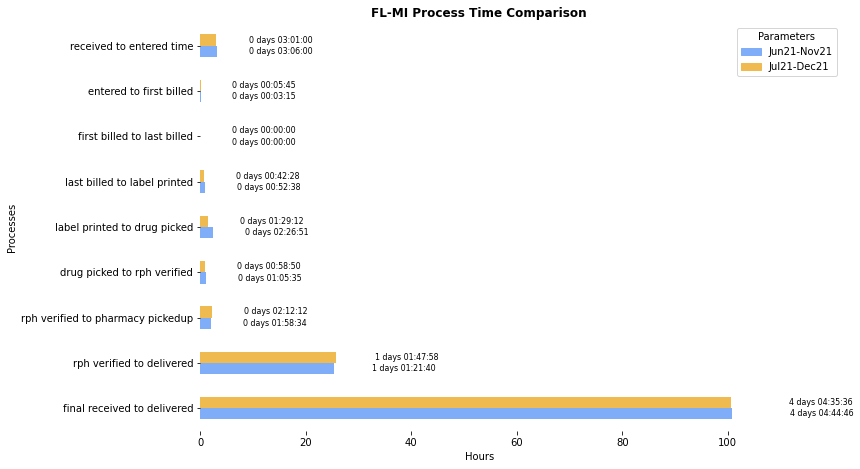

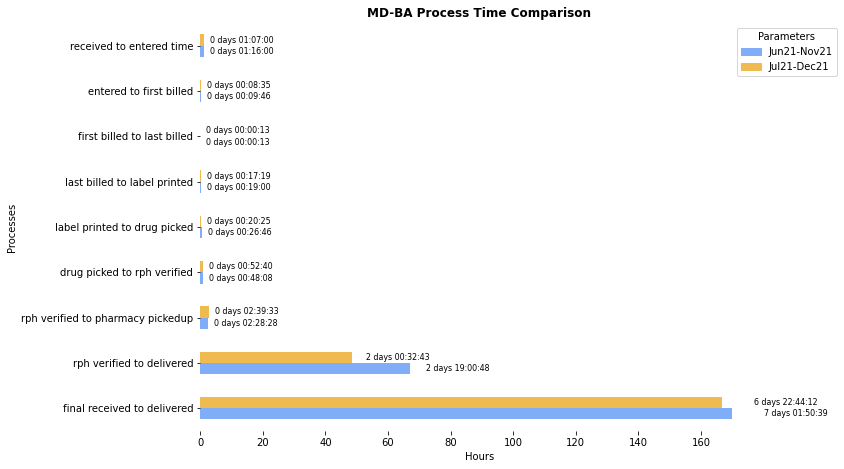

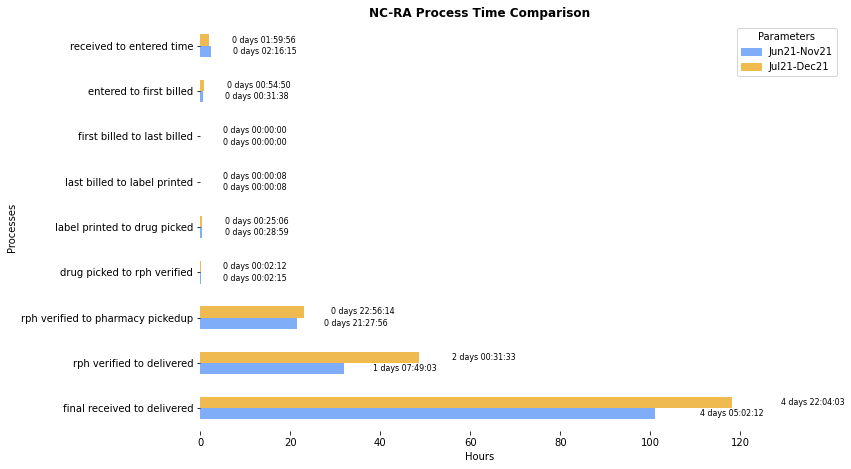

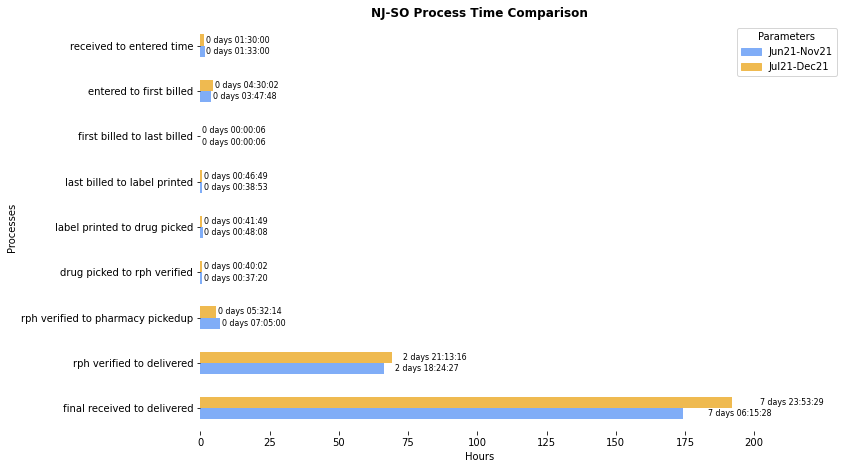

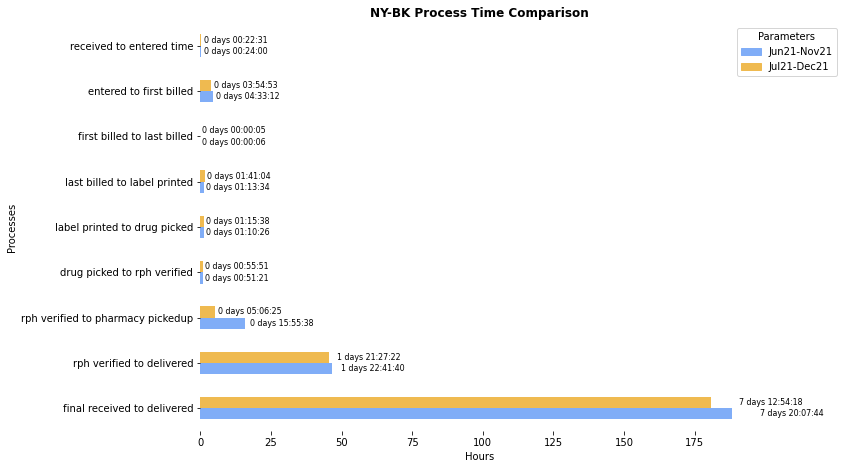

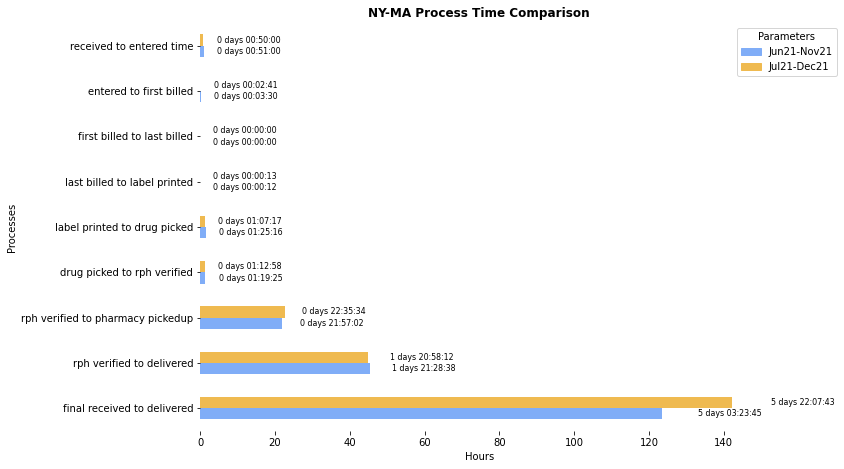

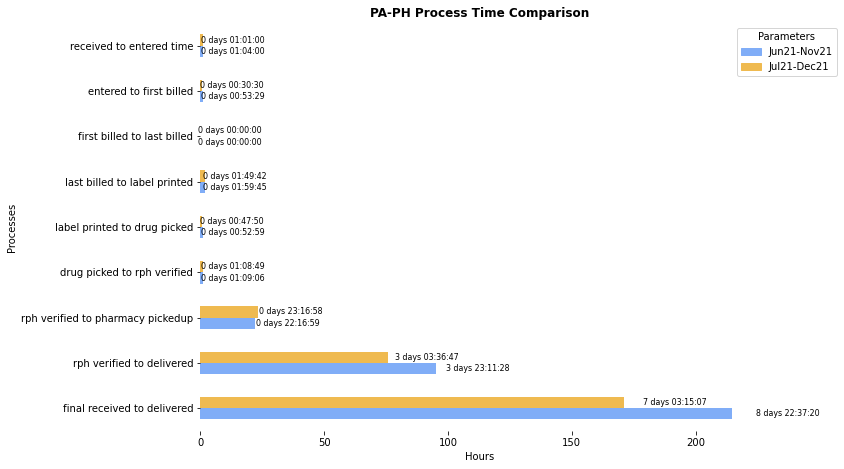

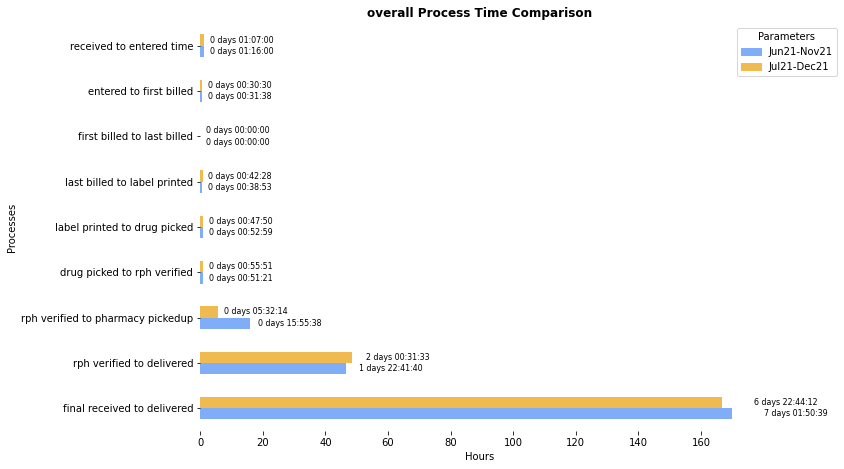

In [42]:
### # Scenario - 1 Location wise bar plots comparison
for l in pharmacy_loc_list:
    try:
        s1_output_df_median_period_1_loc = s1_output_df_median_period_1[s1_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s1_output_df_median_period_1_loc

        ###
        s1_output_df_median_period_2_loc = s1_output_df_median_period_2[s1_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s1_output_df_median_period_2_loc

        ###
        scenario_1_loc = s1_output_df_median_period_1_loc.append([s1_output_df_median_period_2_loc], ignore_index = True)

        ###
        scenario_1_loc_final = scenario_1_loc.copy()

        ###
        scenario_1_loc_final['time_period'] = [period_1, period_2]
        scenario_1_loc_final
        ###
        scenario_1_loc_final.columns.tolist()
        ###
        scenario_1_loc_final = scenario_1_loc_final[['time_period','pharmacy_loc', 
         'median_time_received_to_entered_time_count', 'median_time_received_to_entered_time', 'median_time_received_to_entered_time_hr',
         'median_time_entered_to_first_billed_count', 'median_time_entered_to_first_billed',  'median_time_entered_to_first_billed_hr',
         'median_time_first_billed_to_last_billed_count', 'median_time_first_billed_to_last_billed', 'median_time_first_billed_to_last_billed_hr',
         'median_time_last_billed_to_label_printed_count', 'median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
         'median_time_label_printed_to_drug_picked_count', 'median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
         'median_time_drug_picked_to_rph_verified_count', 'median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
         'median_time_rph_verified_to_pharmacy_pickedup_count', 'median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
         'median_time_rph_verified_to_delivered_count', 'median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
         'median_time_final_received_to_delivered_count', 'median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
        scenario_1_loc_final
        ###
        scenario_1_loc_final_df = scenario_1_loc_final.copy()
        ###
        scenario_1_loc_final_df_plot = scenario_1_loc_final[['time_period',
        'median_time_final_received_to_delivered',
        'median_time_rph_verified_to_delivered',
        'median_time_rph_verified_to_pharmacy_pickedup',
        'median_time_drug_picked_to_rph_verified',
        'median_time_label_printed_to_drug_picked',
        'median_time_last_billed_to_label_printed',                  
        'median_time_first_billed_to_last_billed',
        'median_time_entered_to_first_billed',
        'median_time_received_to_entered_time']]

        scenario_1_loc_final_df_plot.set_index('time_period', inplace = True)

        ###
        my_string  = scenario_1_loc_final_df_plot[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_1_loc_final_df_plot.columns = new_column_names
        ###
        scenario_1_loc_final_df_plot = scenario_1_loc_final_df_plot.T
        scenario_1_loc_final_df_plot
        
        for i in scenario_1_loc_final_df_plot.columns:
            scenario_1_loc_final_df_plot[i] = scenario_1_loc_final_df_plot[i].dt.round('s')
        
        ###
        data_hour = scenario_1_loc_final_df_plot.copy()
        ###
        for i in data_hour:
            data_hour[i] = round(data_hour[i].dt.total_seconds()/3600,2)

        data_hour = data_hour.fillna(0)
        data_hour
        ##
        list1 = scenario_1_loc_final_df_plot[period_2].tolist()
        list2 = scenario_1_loc_final_df_plot[period_1].tolist()
        list_final = list2 + list1

        ##
        def autolabel3(rects):
            for rect,g in zip(rects,list_final):
                width = rect.get_width()
                plt.text(1.05*rect.get_width()+12, rect.get_y()+0.5*rect.get_height(),
                         f'{str(g)}',
                         ha='center', va='center',fontsize=7.9)
        ###
        ax = data_hour.plot(kind='barh',rot=360,figsize=(10,7.5),color=color_code,width=bar_width)

        rects = ax.patches

        autolabel3(rects)

        plt.title(str(l)+' Process Time Comparison',fontsize = font_size_title,fontweight=font_weight ,fontname = font_name)         
        plt.ylabel('Processes')
        plt.xlabel('Hours')

        orange_patch = mpatches.Patch(color = orange_color, label = period_2)
        blue_patch = mpatches.Patch(color = blue_color, label = period_1)
        # yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
        legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.savefig(output_distribution_sce_1+str(l)+' Scen_1_bar_overall.png', bbox_inches='tight', dpi=300,pad_inches = 0)
#         plt.show()
    except:
        pass

In [43]:
# heatmap

In [44]:
# heatmap
scenario_1_ny_bk_final_df_heatmap = scenario_1_ny_bk_final_df.copy()
scenario_1_ny_bk_final_df_heatmap = scenario_1_ny_bk_final_df_heatmap[['time_period', 
'median_time_received_to_entered_time',
'median_time_entered_to_first_billed',
'median_time_first_billed_to_last_billed',
'median_time_last_billed_to_label_printed',
'median_time_label_printed_to_drug_picked',
'median_time_drug_picked_to_rph_verified',
'median_time_rph_verified_to_pharmacy_pickedup',
'median_time_rph_verified_to_delivered',
'median_time_final_received_to_delivered']]
scenario_1_ny_bk_final_df_heatmap.set_index('time_period', inplace = True)

my_string  = scenario_1_ny_bk_final_df_heatmap[1:].columns.str[12:]
new_column_names = []
for i in my_string:
    nn = i.replace("_", " ")
    new_column_names.append(nn)

scenario_1_ny_bk_final_df_heatmap.columns = new_column_names
# scenario_1_ny_bk_final_df_heatmap
# scenario_1_ny_bk_final_df_heatmap.set_index('time_period', inplace = True)
scenario_1_ny_bk_final_df_heatmap = scenario_1_ny_bk_final_df_heatmap.T
for i in scenario_1_ny_bk_final_df_heatmap.columns:
    scenario_1_ny_bk_final_df_heatmap[i] = scenario_1_ny_bk_final_df_heatmap[i].dt.round('s')
scenario_1_ny_bk_final_df_heatmap

time_period,Jun21-Nov21,Jul21-Dec21
received to entered time,0 days 00:24:00,0 days 00:22:31
entered to first billed,0 days 04:33:12,0 days 03:54:53
first billed to last billed,0 days 00:00:06,0 days 00:00:05
last billed to label printed,0 days 01:13:34,0 days 01:41:04
label printed to drug picked,0 days 01:10:26,0 days 01:15:38
drug picked to rph verified,0 days 00:51:21,0 days 00:55:51
rph verified to pharmacy pickedup,0 days 15:55:38,0 days 05:06:25
rph verified to delivered,1 days 22:41:40,1 days 21:27:22
final received to delivered,7 days 20:07:44,7 days 12:54:18


In [45]:
# trial

scenario_1_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_1_ny_bk_final_df_heatmap[[period_1,period_2]].max(axis=1)
scenario_1_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_1_ny_bk_final_df_heatmap[[period_1, period_2]].min(axis=1)
scenario_1_ny_bk_final_df_heatmap['abs Change w.r.t last period'] = scenario_1_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_1_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2]
scenario_1_ny_bk_final_df_heatmap['% Change w.r.t last period'] = round((scenario_1_ny_bk_final_df_heatmap[period_2] - scenario_1_ny_bk_final_df_heatmap[period_1])/scenario_1_ny_bk_final_df_heatmap[period_1]*100,2)

scenario_1_ny_bk_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)
scenario_1_ny_bk_final_df_heatmap


time_period,Jun21-Nov21,Jul21-Dec21,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:24:00,0 days 00:22:31,0 days 00:01:29,-6.18
entered to first billed,0 days 04:33:12,0 days 03:54:53,0 days 00:38:19,-14.03
first billed to last billed,0 days 00:00:06,0 days 00:00:05,0 days 00:00:01,-16.67
last billed to label printed,0 days 01:13:34,0 days 01:41:04,0 days 00:27:30,37.38
label printed to drug picked,0 days 01:10:26,0 days 01:15:38,0 days 00:05:12,7.38
drug picked to rph verified,0 days 00:51:21,0 days 00:55:51,0 days 00:04:30,8.76
rph verified to pharmacy pickedup,0 days 15:55:38,0 days 05:06:25,0 days 10:49:13,-67.94
rph verified to delivered,1 days 22:41:40,1 days 21:27:22,0 days 01:14:18,-2.65
final received to delivered,7 days 20:07:44,7 days 12:54:18,0 days 07:13:26,-3.84


In [46]:
scenario_1_ny_bk_final_df_heatmap = scenario_1_ny_bk_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]
scenario_1_ny_bk_final_df_heatmap

time_period,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:01:29,-6.18
entered to first billed,0 days 00:38:19,-14.03
first billed to last billed,0 days 00:00:01,-16.67
last billed to label printed,0 days 00:27:30,37.38
label printed to drug picked,0 days 00:05:12,7.38
drug picked to rph verified,0 days 00:04:30,8.76
rph verified to pharmacy pickedup,0 days 10:49:13,-67.94
rph verified to delivered,0 days 01:14:18,-2.65
final received to delivered,0 days 07:13:26,-3.84


In [47]:
def format_arrow_text(value):
    if value < 0:
        indicator = '<span style="color:green;">⮟</span> ' 
    elif value > 0:
        indicator = '<span style="color:red;">⮝</span> ' 
    else:
        indicator = ''
    return f'{indicator} {abs(value)}%' #'{:.2f}'
    
style_df = scenario_1_ny_bk_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'black','border-width':'thin','border-style':'solid'}).format(format_arrow_text, subset=['% Change w.r.t last period']).set_table_styles([{
    'selector': 'th', 'props': [('border', '1px black solid !important')]}]).set_caption('Processing Time Comparison for period '+period_1 +' to '+ period_2)
# .set_table_styles([{'selector' : '', 'props' : [('border', '2px solid black')]}])
style_df

time_period,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:01:29,⮟ 6.18%
entered to first billed,0 days 00:38:19,⮟ 14.03%
first billed to last billed,0 days 00:00:01,⮟ 16.67%
last billed to label printed,0 days 00:27:30,⮝ 37.38%
label printed to drug picked,0 days 00:05:12,⮝ 7.38%
drug picked to rph verified,0 days 00:04:30,⮝ 8.76%
rph verified to pharmacy pickedup,0 days 10:49:13,⮟ 67.94%
rph verified to delivered,0 days 01:14:18,⮟ 2.65%
final received to delivered,0 days 07:13:26,⮟ 3.84%


In [48]:
# pip install html2image

In [49]:
output_distribution_sce_1

'C:/Users/vidhi.mittal/Documents/Automation/MBR_3/OPS_MBR_Github/ops_mbr/RX/automation/Scenario_1/images/'

In [50]:
from html2image import Html2Image
html_1= style_df.render()
# hti = Html2Image()
hti = Html2Image(output_path=source_file_path)
# hti.screenshot(html_str=html_1, save_as='red_page_overall.png',size=(500, 500))

# Scenario - 1 Location wise heatmap

In [51]:
###
for l in pharmacy_loc_list:
    try:
        s1_output_df_median_period_1_loc = s1_output_df_median_period_1[s1_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s1_output_df_median_period_1_loc

        ###
        s1_output_df_median_period_2_loc = s1_output_df_median_period_2[s1_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s1_output_df_median_period_2_loc

        ###

        ###
        scenario_1_loc = s1_output_df_median_period_1_loc.append([s1_output_df_median_period_2_loc], ignore_index = True)
        scenario_1_loc

        scenario_1_loc_final = scenario_1_loc.copy()

        ###
        scenario_1_loc_final['time_period'] = [period_1, period_2]
        scenario_1_loc_final

        # heatmap
        scenario_1_loc_final_df_heatmap = scenario_1_loc_final.copy()
        scenario_1_loc_final_df_heatmap = scenario_1_loc_final_df_heatmap[['time_period', 
        'median_time_received_to_entered_time',
        'median_time_entered_to_first_billed',
        'median_time_first_billed_to_last_billed',
        'median_time_last_billed_to_label_printed',
        'median_time_label_printed_to_drug_picked',
        'median_time_drug_picked_to_rph_verified',
        'median_time_rph_verified_to_pharmacy_pickedup',
        'median_time_rph_verified_to_delivered',
        'median_time_final_received_to_delivered']]
        scenario_1_loc_final_df_heatmap.set_index('time_period', inplace = True)

        my_string  = scenario_1_loc_final_df_heatmap[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_1_loc_final_df_heatmap.columns = new_column_names

        scenario_1_loc_final_df_heatmap = scenario_1_loc_final_df_heatmap.T
        
        for i in scenario_1_loc_final_df_heatmap.columns:
            scenario_1_loc_final_df_heatmap[i] = scenario_1_loc_final_df_heatmap[i].dt.round('s')

        ###
        scenario_1_loc_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_1_loc_final_df_heatmap[[period_1,period_2]].max(axis=1)
        scenario_1_loc_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_1_loc_final_df_heatmap[[period_1, period_2]].min(axis=1)
        scenario_1_loc_final_df_heatmap['abs Change w.r.t last period'] = scenario_1_loc_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_1_loc_final_df_heatmap['min_'+period_1+'_'+period_2]
        scenario_1_loc_final_df_heatmap['% Change w.r.t last period'] = round((scenario_1_loc_final_df_heatmap[period_2] - scenario_1_loc_final_df_heatmap[period_1])/scenario_1_loc_final_df_heatmap[period_1]*100,2)

#         scenario_1_loc_final_df_heatmap['max_Jan21_Jun21'] = scenario_1_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].max(axis=1)
#         scenario_1_loc_final_df_heatmap['min_Jan21_Jun21'] = scenario_1_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].min(axis=1)
#         scenario_1_loc_final_df_heatmap['abs Change w.r.t last months'] = scenario_1_loc_final_df_heatmap['max_Jan21_Jun21'] - scenario_1_loc_final_df_heatmap['min_Jan21_Jun21']
#         scenario_1_loc_final_df_heatmap['% Change w.r.t last month'] = round((scenario_1_loc_final_df_heatmap['Jun21'] - scenario_1_loc_final_df_heatmap['Jan21_Jun21'])/scenario_1_loc_final_df_heatmap['Jan21_Jun21']*100,2)
        scenario_1_loc_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)

        # ###
        scenario_1_loc_final_df_heatmap = scenario_1_loc_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]
        ###
        subset_value = (['% Change w.r.t last period'])

        # df_style = scenario_1_loc_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
           
        ###
        # dfi.export(df_style, output_distribution_sce_1+str(l)+' scen_1_abs_per_change_comparison.png')
        # df_style
        style_df = scenario_1_loc_final_df_heatmap.style.set_properties(**body_design).format(format_arrow_text, subset=['% Change w.r.t last period']).set_table_styles([{
        'selector': 'th', 'props': [('border', '1px black solid !important')]}]).set_caption('Processing Time Comparison for period' +period_1 +'to' + period_2 + '('+str(l) +')')
        style_df.set_table_styles([border_design])
        
        html_1= style_df.render()
        hti = Html2Image(output_path=output_distribution_sce_1)
        hti.screenshot(html_str=html_1, save_as=str(l)+' scen_1_abs_per_change_comparison_overall.png',size=(500, 500))
                                                                                        
    except:
        pass

# --------------- Scenario-2 Analysis ---------------

# scenario-2 jan to june

In [52]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count_2 = []
list_median_time_received_to_entered_time_2 = []

list_median_time_entered_to_first_billed_count_2 = []
list_median_time_entered_to_first_billed_2 = []

list_median_time_first_billed_to_last_billed_count_2 = []
list_median_time_first_billed_to_last_billed_2 = []

list_median_time_entered_to_last_billed_count_2 = []
list_median_time_entered_to_last_billed_2 = []

list_median_time_entered_to_label_printed_count_2 = []
list_median_time_entered_to_label_printed_2 = []

list_median_time_last_billed_to_label_printed_count_2 = []
list_median_time_last_billed_to_label_printed_2 = []

list_median_time_label_printed_to_drug_picked_count_2 = []
list_median_time_label_printed_to_drug_picked_2 = []

list_median_time_drug_picked_to_rph_verified_count_2 = []
list_median_time_drug_picked_to_rph_verified_2 = []

list_median_time_rph_verified_to_pharmacy_pickedup_count_2 = []
list_median_time_rph_verified_to_pharmacy_pickedup_2 = []

list_median_time_rph_verified_to_batch_creation_count_2 = []
list_median_time_rph_verified_to_batch_creation_2 = []

list_median_time_batch_creation_to_delivered_count_2 = []
list_median_time_batch_creation_to_delivered_2 = []

list_median_time_rph_verified_to_delivered_count_2 = []
list_median_time_rph_verified_to_delivered_2 = []

list_median_time_ibd_processing_start_to_end_count_2 = []
list_median_time_ibd_processing_start_to_end_2 = []

list_median_time_ibd_processing_end_to_first_billed_count_2 = []
list_median_time_ibd_processing_end_to_first_billed_2 = []

list_median_time_rph_verified_to_delivery_pickedup_count_2 = []
list_median_time_rph_verified_to_delivery_pickedup_2 = []

list_median_time_delivery_pickedup_to_delivered_count_2 = []
list_median_time_delivery_pickedup_to_delivered_2 = []

list_median_time_final_received_to_delivered_count_2 = []
list_median_time_final_received_to_delivered_2 = []

list_median_time_time_to_identify_pa_is_required_count_2 = []
list_median_time_time_to_identify_pa_is_required_2 = []

list_median_time_waiting_time_for_ibd_processing_count_2 = []
list_median_time_waiting_time_for_ibd_processing_2 = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_2 = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_2 = []

list_median_time_ibd_processing_end_to_label_printed_count_2 = []
list_median_time_ibd_processing_end_to_label_printed_2 = []

list_median_time_rx_entered_to_callins_processing_start_count_2 = []
list_median_time_rx_entered_to_callins_processing_start_2 = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count_2 = []
list_median_time_time_taken_by_IBD_team_to_process_rx_2 = []

list_median_time_time_taken_for_call_for_insurance_process_count_2 = []
list_median_time_time_taken_for_call_for_insurance_process_2 = []


pharmacy_loc_2 = []
month_key_2 = []

for i in np.unique(sce_2_df_period_1.pharmacy_loc):
    loc = i
    pharmacy_loc_2.append(i)
    xc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count_2.append(xc_2)
    x_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_2.append(x_2)
    
    yc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count_2.append(yc_2)
    y_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_2.append(y_2)
    
    zc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count_2.append(zc_2)
    z_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_2.append(z_2)
    
    ac_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count_2.append(ac_2)
    a_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_2.append(a_2)
    
    bc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count_2.append(bc_2)
    b_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_2.append(b_2)
    
    rc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count_2.append(rc_2)
    r_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_2.append(r_2)
    
    ec_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count_2.append(ec_2)
    e_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_2.append(e_2)
    
    fc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count_2.append(fc_2)
    f_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_2.append(f_2)
    
    gc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count_2.append(gc_2)
    g_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_2.append(g_2)
    
    hc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count_2.append(hc_2)
    h_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_2.append(h_2)
    
    jc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count_2.append(jc_2)
    j_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_2.append(j_2)
    
    lc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count_2.append(lc_2)
    l_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_2.append(l_2)
    
    mc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count_2.append(mc_2)
    m_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_2.append(m_2)
    
    nc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count_2.append(nc_2)
    n_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_2.append(n_2)
    
    oc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count_2.append(oc_2)
    o_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_2.append(o_2)
    
    pc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count_2.append(pc_2)
    p_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_2.append(p_2)
    
    qc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count_2.append(qc_2)
    q_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_2.append(q_2)
    
    tc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count_2.append(tc_2)
    t_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_2.append(t_2)
    
    uc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count_2.append(uc_2)
    u_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_2.append(u_2)
    
    vc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_2.append(vc_2)
    v_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_2.append(v_2)
    
    wc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count_2.append(wc_2)
    w_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_2.append(w_2)
    
    cc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count_2.append(cc_2)
    c_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_2.append(c_2)
    
    ffc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count_2.append(ffc_2)
    ff_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_2.append(ff_2)
    
    ccc_2 = get_count(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count_2.append(ccc_2)
    cc_2 = get_median_timedelta(sce_2_df_period_1[sce_2_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_2.append(cc_2)


    
    
s2_output_df_median_period_1 = pd.DataFrame()
s2_output_df_median_period_1['pharmacy_loc'] = pharmacy_loc_2
s2_output_df_median_period_1['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count_2
s2_output_df_median_period_1['median_time_received_to_entered_time_count'] = round(s2_output_df_median_period_1['median_time_received_to_entered_time_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time_2
s2_output_df_median_period_1['median_time_received_to_entered_time_hr'] = round(s2_output_df_median_period_1['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_1['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count_2
s2_output_df_median_period_1['median_time_entered_to_first_billed_count'] = round(s2_output_df_median_period_1['median_time_entered_to_first_billed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed_2
s2_output_df_median_period_1['median_time_entered_to_first_billed_hr'] = round(s2_output_df_median_period_1['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count_2
s2_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = round(s2_output_df_median_period_1['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed_2
s2_output_df_median_period_1['median_time_first_billed_to_last_billed_hr'] = round(s2_output_df_median_period_1['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_1['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count_2
s2_output_df_median_period_1['median_time_entered_to_last_billed_count'] = round(s2_output_df_median_period_1['median_time_entered_to_last_billed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed_2
s2_output_df_median_period_1['median_time_entered_to_last_billed_hr'] = round(s2_output_df_median_period_1['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_1['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count_2
s2_output_df_median_period_1['median_time_entered_to_label_printed_count'] = round(s2_output_df_median_period_1['median_time_entered_to_label_printed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed_2
s2_output_df_median_period_1['median_time_entered_to_label_printed_hr'] = round(s2_output_df_median_period_1['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s2_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count_2
s2_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = round(s2_output_df_median_period_1['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed_2
s2_output_df_median_period_1['median_time_last_billed_to_label_printed_hr'] = round(s2_output_df_median_period_1['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count_2
s2_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = round(s2_output_df_median_period_1['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked_2
s2_output_df_median_period_1['median_time_label_printed_to_drug_picked_hr'] = round(s2_output_df_median_period_1['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count_2
s2_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = round(s2_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified_2
s2_output_df_median_period_1['median_time_drug_picked_to_rph_verified_hr'] = round(s2_output_df_median_period_1['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count_2
s2_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup_2
s2_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count_2
s2_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation_2
s2_output_df_median_period_1['median_time_rph_verified_to_batch_creation_hr'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count_2
s2_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = round(s2_output_df_median_period_1['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered_2
s2_output_df_median_period_1['median_time_batch_creation_to_delivered_hr'] = round(s2_output_df_median_period_1['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count_2
s2_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered_2
s2_output_df_median_period_1['median_time_rph_verified_to_delivered_hr'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count_2
s2_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = round(s2_output_df_median_period_1['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end_2
s2_output_df_median_period_1['median_time_ibd_processing_start_to_end'] = s2_output_df_median_period_1['median_time_ibd_processing_start_to_end'].replace(np.nan,pd.to_timedelta(0))
s2_output_df_median_period_1['median_time_ibd_processing_start_to_end_hr'] = round(s2_output_df_median_period_1['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count_2
s2_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = round(s2_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed_2
s2_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_hr'] = round(s2_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count_2
s2_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup_2
s2_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s2_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count_2
s2_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = round(s2_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered_2
s2_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_hr'] = round(s2_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count_2
s2_output_df_median_period_1['median_time_final_received_to_delivered_count'] = round(s2_output_df_median_period_1['median_time_final_received_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered_2
s2_output_df_median_period_1['median_time_final_received_to_delivered_hr'] = round(s2_output_df_median_period_1['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count_2
s2_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = round(s2_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required_2
s2_output_df_median_period_1['median_time_time_to_identify_pa_is_required_hr'] = round(s2_output_df_median_period_1['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count_2
s2_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = round(s2_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing_2
s2_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_hr'] = round(s2_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_2
s2_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s2_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_2
s2_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s2_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count_2
s2_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = round(s2_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed_2
s2_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_hr'] = round(s2_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count_2
s2_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = round(s2_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start_2
#s2_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_hr'] = round(s2_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count_2
s2_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s2_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s2_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx_2
s2_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s2_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s2_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count_2
# s2_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = round(s2_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s2_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process_2
#s2_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s2_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [53]:
s2_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,193,0 days 02:09:30,2.16,129,6 days 01:58:07,145.97,130,0 days 00:00:00,0.00,130,7 days 02:30:35.500000,170.51,116,7 days 23:22:41,191.38,100,0 days 00:05:07.500000,0.09,80,0 days 02:03:25,2.06,99,0 days 00:43:36,0.73,3,0 days 12:14:35,12.24,80,0 days 22:06:28,22.11,71,0 days 02:34:34,2.58,71,1 days 01:09:21,25.16,0,0 days,0.0,112,5 days 00:06:39.500000,120.11,67,0 days 13:26:58,13.45,66,0 days 13:59:58,14.00,72,11 days 00:41:12,264.69,308,0 days 01:59:06,1.98,71,10 days 02:45:06,242.75,0,NaT,NaN,25,2 days 00:38:28.500000,48.64,0,None,75,4 days 22:03:56,118.07,1864,0 days
1,MD-BA,260,0 days 01:34:00,1.57,228,7 days 09:11:19,177.19,230,0 days 20:29:07,20.49,230,18 days 20:10:50,452.18,199,13 days 21:28:55,333.48,136,0 days 00:10:55.500000,0.18,128,0 day

In [54]:
s2_output_df_median_period_1 = s2_output_df_median_period_1.append(s2_output_df_median_period_1.median(axis=0), ignore_index = True)
s2_output_df_median_period_1['pharmacy_loc'] = s2_output_df_median_period_1['pharmacy_loc'].fillna('overall')
s2_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,193.0,0 days 02:09:30,2.16,129.0,6 days 01:58:07,145.97,130.0,0 days 00:00:00,0.00,130.0,7 days 02:30:35.500000,170.51,116.0,7 days 23:22:41,191.38,100.0,0 days 00:05:07.500000,0.09,80.0,0 days 02:03:25,2.06,99.0,0 days 00:43:36,0.73,3.0,0 days 12:14:35,12.24,80.0,0 days 22:06:28,22.11,71.0,0 days 02:34:34,2.58,71.0,1 days 01:09:21,25.16,0.0,0 days,0.0,112.0,5 days 00:06:39.500000,120.11,67.0,0 days 13:26:58,13.45,66.0,0 days 13:59:58,14.00,72.0,11 days 00:41:12,264.69,308.0,0 days 01:59:06,1.98,71.0,10 days 02:45:06,242.75,0.0,NaT,NaN,25.0,2 days 00:38:28.500000,48.64,0.0,None,75.0,4 days 22:03:56,118.07,1864.0,0 days
1,MD-BA,260.0,0 days 01:34:00,1.57,228.0,7 days 09:11:19,177.19,230.0,0 days 20:29:07,20.49,230.0,18 days 20:10:50,452.18,199.0,13 days

In [55]:
s2_output_df_median_period_1_ny_bk = s2_output_df_median_period_1[s2_output_df_median_period_1['pharmacy_loc'] == 'NY-BK']#.reset_index()
s2_output_df_median_period_1_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
4,NY-BK,928.0,0 days 00:39:00,0.65,667.0,5 days 16:22:45.500000,136.38,671.0,0 days 00:18:34,0.31,670.0,13 days 21:24:06,333.4,594.0,13 days 15:20:37,327.34,496.0,0 days 00:42:30,0.71,420.0,0 days 01:06:53,1.11,490.0,0 days 00:42:08.500000,0.7,26.0,0 days 22:39:17.500000,22.65,382.0,2 days 11:08:12,59.14,301.0,0 days 03:17:00,3.28,331.0,2 days 19:36:43,67.61,0.0,0 days,0.0,476.0,2 days 02:30:58,50.52,400.0,3 days 09:23:50,81.4,211.0,0 days 13:16:37,13.28,332.0,15 days 19:46:13,379.77,1153.0,0 days 00:35:41,0.59,540.0,6 days 16:07:40,160.13,74.0,0 days 21:52:30,21.88,281.0,2 days 01:21:07.500000,49.35,0.0,None,561.0,3 days 01:24:14,73.4,7022.0,0 days


# # scenario-2 feb to july

In [56]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count_2 = []
list_median_time_received_to_entered_time_2 = []

list_median_time_entered_to_first_billed_count_2 = []
list_median_time_entered_to_first_billed_2 = []

list_median_time_first_billed_to_last_billed_count_2 = []
list_median_time_first_billed_to_last_billed_2 = []

list_median_time_entered_to_last_billed_count_2 = []
list_median_time_entered_to_last_billed_2 = []

list_median_time_entered_to_label_printed_count_2 = []
list_median_time_entered_to_label_printed_2 = []

list_median_time_last_billed_to_label_printed_count_2 = []
list_median_time_last_billed_to_label_printed_2 = []

list_median_time_label_printed_to_drug_picked_count_2 = []
list_median_time_label_printed_to_drug_picked_2 = []

list_median_time_drug_picked_to_rph_verified_count_2 = []
list_median_time_drug_picked_to_rph_verified_2 = []

list_median_time_rph_verified_to_pharmacy_pickedup_count_2 = []
list_median_time_rph_verified_to_pharmacy_pickedup_2 = []

list_median_time_rph_verified_to_batch_creation_count_2 = []
list_median_time_rph_verified_to_batch_creation_2 = []

list_median_time_batch_creation_to_delivered_count_2 = []
list_median_time_batch_creation_to_delivered_2 = []

list_median_time_rph_verified_to_delivered_count_2 = []
list_median_time_rph_verified_to_delivered_2 = []

list_median_time_ibd_processing_start_to_end_count_2 = []
list_median_time_ibd_processing_start_to_end_2 = []

list_median_time_ibd_processing_end_to_first_billed_count_2 = []
list_median_time_ibd_processing_end_to_first_billed_2 = []

list_median_time_rph_verified_to_delivery_pickedup_count_2 = []
list_median_time_rph_verified_to_delivery_pickedup_2 = []

list_median_time_delivery_pickedup_to_delivered_count_2 = []
list_median_time_delivery_pickedup_to_delivered_2 = []

list_median_time_final_received_to_delivered_count_2 = []
list_median_time_final_received_to_delivered_2 = []

list_median_time_time_to_identify_pa_is_required_count_2 = []
list_median_time_time_to_identify_pa_is_required_2 = []

list_median_time_waiting_time_for_ibd_processing_count_2 = []
list_median_time_waiting_time_for_ibd_processing_2 = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_2 = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_2 = []

list_median_time_ibd_processing_end_to_label_printed_count_2 = []
list_median_time_ibd_processing_end_to_label_printed_2 = []

list_median_time_rx_entered_to_callins_processing_start_count_2 = []
list_median_time_rx_entered_to_callins_processing_start_2 = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count_2 = []
list_median_time_time_taken_by_IBD_team_to_process_rx_2 = []

list_median_time_time_taken_for_call_for_insurance_process_count_2 = []
list_median_time_time_taken_for_call_for_insurance_process_2 = []


pharmacy_loc_2 = []
month_key_2 = []

for i in np.unique(sce_2_df_period_2.pharmacy_loc):
    loc = i
    pharmacy_loc_2.append(i)
    xc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count_2.append(xc_2)
    x_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_2.append(x_2)
    
    yc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count_2.append(yc_2)
    y_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_2.append(y_2)
    
    zc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count_2.append(zc_2)
    z_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_2.append(z_2)
    
    ac_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count_2.append(ac_2)
    a_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_2.append(a_2)
    
    bc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count_2.append(bc_2)
    b_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_2.append(b_2)
    
    rc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count_2.append(rc_2)
    r_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_2.append(r_2)
    
    ec_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count_2.append(ec_2)
    e_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_2.append(e_2)
    
    fc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count_2.append(fc_2)
    f_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_2.append(f_2)
    
    gc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count_2.append(gc_2)
    g_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_2.append(g_2)
    
    hc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count_2.append(hc_2)
    h_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_2.append(h_2)
    
    jc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count_2.append(jc_2)
    j_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_2.append(j_2)
    
    lc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count_2.append(lc_2)
    l_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_2.append(l_2)
    
    mc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count_2.append(mc_2)
    m_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_2.append(m_2)
    
    nc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count_2.append(nc_2)
    n_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_2.append(n_2)
    
    oc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count_2.append(oc_2)
    o_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_2.append(o_2)
    
    pc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count_2.append(pc_2)
    p_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_2.append(p_2)
    
    qc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count_2.append(qc_2)
    q_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_2.append(q_2)
    
    tc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count_2.append(tc_2)
    t_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_2.append(t_2)
    
    uc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count_2.append(uc_2)
    u_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_2.append(u_2)
    
    vc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_2.append(vc_2)
    v_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_2.append(v_2)
    
    wc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count_2.append(wc_2)
    w_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_2.append(w_2)
    
    cc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count_2.append(cc_2)
    c_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_2.append(c_2)
    
    ffc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count_2.append(ffc_2)
    ff_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_2.append(ff_2)
    
    ccc_2 = get_count(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count_2.append(ccc_2)
    cc_2 = get_median_timedelta(sce_2_df_period_2[sce_2_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_2.append(cc_2)


    
    
s2_output_df_median_period_2 = pd.DataFrame()
s2_output_df_median_period_2['pharmacy_loc'] = pharmacy_loc_2
s2_output_df_median_period_2['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count_2
s2_output_df_median_period_2['median_time_received_to_entered_time_count'] = round(s2_output_df_median_period_2['median_time_received_to_entered_time_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time_2
s2_output_df_median_period_2['median_time_received_to_entered_time_hr'] = round(s2_output_df_median_period_2['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_2['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count_2
s2_output_df_median_period_2['median_time_entered_to_first_billed_count'] = round(s2_output_df_median_period_2['median_time_entered_to_first_billed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed_2
s2_output_df_median_period_2['median_time_entered_to_first_billed_hr'] = round(s2_output_df_median_period_2['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count_2
s2_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = round(s2_output_df_median_period_2['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed_2
s2_output_df_median_period_2['median_time_first_billed_to_last_billed_hr'] = round(s2_output_df_median_period_2['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_2['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count_2
s2_output_df_median_period_2['median_time_entered_to_last_billed_count'] = round(s2_output_df_median_period_2['median_time_entered_to_last_billed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed_2
s2_output_df_median_period_2['median_time_entered_to_last_billed_hr'] = round(s2_output_df_median_period_2['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s2_output_df_median_period_2['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count_2
s2_output_df_median_period_2['median_time_entered_to_label_printed_count'] = round(s2_output_df_median_period_2['median_time_entered_to_label_printed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed_2
s2_output_df_median_period_2['median_time_entered_to_label_printed_hr'] = round(s2_output_df_median_period_2['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s2_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count_2
s2_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = round(s2_output_df_median_period_2['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed_2
s2_output_df_median_period_2['median_time_last_billed_to_label_printed_hr'] = round(s2_output_df_median_period_2['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count_2
s2_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = round(s2_output_df_median_period_2['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked_2
s2_output_df_median_period_2['median_time_label_printed_to_drug_picked_hr'] = round(s2_output_df_median_period_2['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count_2
s2_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = round(s2_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified_2
s2_output_df_median_period_2['median_time_drug_picked_to_rph_verified_hr'] = round(s2_output_df_median_period_2['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count_2
s2_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup_2
s2_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count_2
s2_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation_2
s2_output_df_median_period_2['median_time_rph_verified_to_batch_creation_hr'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count_2
s2_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = round(s2_output_df_median_period_2['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered_2
s2_output_df_median_period_2['median_time_batch_creation_to_delivered_hr'] = round(s2_output_df_median_period_2['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count_2
s2_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered_2
s2_output_df_median_period_2['median_time_rph_verified_to_delivered_hr'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count_2
s2_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = round(s2_output_df_median_period_2['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end_2
s2_output_df_median_period_2['median_time_ibd_processing_start_to_end'] = s2_output_df_median_period_2['median_time_ibd_processing_start_to_end'].replace(np.nan,pd.to_timedelta(0))
s2_output_df_median_period_2['median_time_ibd_processing_start_to_end_hr'] = round(s2_output_df_median_period_2['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count_2
s2_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = round(s2_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed_2
s2_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_hr'] = round(s2_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count_2
s2_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup_2
s2_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s2_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count_2
s2_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = round(s2_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered_2
s2_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_hr'] = round(s2_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count_2
s2_output_df_median_period_2['median_time_final_received_to_delivered_count'] = round(s2_output_df_median_period_2['median_time_final_received_to_delivered_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered_2
s2_output_df_median_period_2['median_time_final_received_to_delivered_hr'] = round(s2_output_df_median_period_2['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count_2
s2_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = round(s2_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required_2
s2_output_df_median_period_2['median_time_time_to_identify_pa_is_required_hr'] = round(s2_output_df_median_period_2['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count_2
s2_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = round(s2_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing_2
s2_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_hr'] = round(s2_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_2
s2_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s2_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_2
s2_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s2_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count_2
s2_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = round(s2_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed_2
s2_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_hr'] = round(s2_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count_2
s2_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = round(s2_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start_2
# s2_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_hr'] = round(s2_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count_2
s2_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s2_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s2_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx_2
s2_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s2_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s2_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count_2
# s2_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = round(s2_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s2_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process_2
#s2_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s2_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [57]:
s2_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,164,0 days 02:40:00,2.67,109,7 days 19:11:19.500000,187.19,110,0 days 00:00:00,0.00,110,9 days 17:21:27.500000,233.36,96,9 days 19:51:34,235.86,82,0 days 00:08:09,0.14,67,0 days 00:44:03,0.73,82,0 days 00:35:24,0.59,3,0 days 05:41:17,5.69,66,0 days 22:12:41,22.21,66,0 days 02:41:30,2.69,66,1 days 01:32:23.500000,25.54,0,0 days,0.0,92,6 days 00:20:06,144.34,54,0 days 13:58:54,13.98,62,0 days 14:24:34,14.41,66,12 days 04:45:25,292.76,255,0 days 02:27:02,2.45,57,16 days 23:48:24,407.81,0,NaT,NaN,20,2 days 01:20:53,49.35,0,None,60,7 days 02:51:20,170.86,1543,0 days
1,MD-BA,274,0 days 01:20:00,1.33,217,7 days 23:43:27,191.72,220,0 days 19:59:25,19.99,219,20 days 19:54:39,499.91,189,15 days 03:03:48,363.06,134,0 days 00:10:56,0.18,118,0 days 00:22:49,0.38,14

In [58]:
s2_output_df_median_period_2 = s2_output_df_median_period_2.append(s2_output_df_median_period_2.median(axis=0), ignore_index = True)
s2_output_df_median_period_2['pharmacy_loc'] = s2_output_df_median_period_2['pharmacy_loc'].fillna('overall')
s2_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,FL-MI,164.0,0 days 02:40:00,2.67,109.0,7 days 19:11:19.500000,187.19,110.0,0 days 00:00:00,0.00,110.0,9 days 17:21:27.500000,233.36,96.0,9 days 19:51:34,235.86,82.0,0 days 00:08:09,0.14,67.0,0 days 00:44:03,0.73,82.0,0 days 00:35:24,0.59,3.0,0 days 05:41:17,5.69,66.0,0 days 22:12:41,22.21,66.0,0 days 02:41:30,2.69,66.0,1 days 01:32:23.500000,25.54,0.0,0 days,0.0,92.0,6 days 00:20:06,144.34,54.0,0 days 13:58:54,13.98,62.0,0 days 14:24:34,14.41,66.0,12 days 04:45:25,292.76,255.0,0 days 02:27:02,2.45,57.0,16 days 23:48:24,407.81,0.0,NaT,NaN,20.0,2 days 01:20:53,49.35,0.0,None,60.0,7 days 02:51:20,170.86,1543.0,0 days
1,MD-BA,274.0,0 days 01:20:00,1.33,217.0,7 days 23:43:27,191.72,220.0,0 days 19:59:25,19.99,219.0,20 days 19:54:39,499.91,189.0,15 days 03:03:48,3

In [59]:
s2_output_df_median_period_2_ny_bk = s2_output_df_median_period_2[s2_output_df_median_period_2['pharmacy_loc'] == 'NY-BK']#.reset_index()
s2_output_df_median_period_2_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
4,NY-BK,1035.0,0 days 00:37:00,0.62,683.0,6 days 02:01:40,146.03,690.0,0 days 02:46:27,2.77,688.0,16 days 16:44:00,400.73,602.0,15 days 21:52:39.500000,381.88,485.0,0 days 01:00:25.500000,1.01,421.0,0 days 01:20:07.500000,1.34,495.0,0 days 00:45:36.500000,0.76,26.0,0 days 22:39:39,22.66,370.0,2 days 10:41:13,58.69,372.0,0 days 03:36:30,3.61,411.0,2 days 17:11:35,65.19,0.0,0 days,0.0,498.0,2 days 23:18:55.500000,71.32,381.0,3 days 08:22:38,80.38,261.0,0 days 13:48:06,13.8,428.0,18 days 22:12:02,454.2,1284.0,0 days 00:34:30,0.57,587.0,7 days 23:11:33.500000,191.19,83.0,0 days 23:17:07,23.29,277.0,3 days 14:22:35,86.38,0.0,None,608.0,4 days 00:30:49,96.51,7847.0,0 days


# # scenario-2 june only

In [60]:
scenario_2_ny_bk = s2_output_df_median_period_1_ny_bk.append([s2_output_df_median_period_2_ny_bk], ignore_index = True)
scenario_2_ny_bk


,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,NY-BK,928.0,0 days 00:39:00,0.65,667.0,5 days 16:22:45.500000,136.38,671.0,0 days 00:18:34,0.31,670.0,13 days 21:24:06,333.40,594.0,13 days 15:20:37,327.34,496.0,0 days 00:42:30,0.71,420.0,0 days 01:06:53,1.11,490.0,0 days 00:42:08.500000,0.70,26.0,0 days 22:39:17.500000,22.65,382.0,2 days 11:08:12,59.14,301.0,0 days 03:17:00,3.28,331.0,2 days 19:36:43,67.61,0.0,0 days,0.0,476.0,2 days 02:30:58,50.52,400.0,3 days 09:23:50,81.40,211.0,0 days 13:16:37,13.28,332.0,15 days 19:46:13,379.77,1153.0,0 days 00:35:41,0.59,540.0,6 days 16:07:40,160.13,74.0,0 days 21:52:30,21.88,281.0,2 days 01:21:07.500000,49.35,0.0,None,561.0,3 days 01:24:14,73.40,7022.0,0 days
1,NY-BK,1035.0,0 days 00:37:00,0.62,683.0,6 days 02:01:40,146.03,690.0,0 days 02:46:27,2.77,688.0,16 days 16

In [61]:
# for i in scenario_2_ny_bk.columns[2::1]:
#     scenario_2_ny_bk[i] = pd.to_timedelta(scenario_2_ny_bk[i]).dt.round('s')
    

In [62]:
scenario_2_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process
0,NY-BK,928.0,0 days 00:39:00,0.65,667.0,5 days 16:22:45.500000,136.38,671.0,0 days 00:18:34,0.31,670.0,13 days 21:24:06,333.40,594.0,13 days 15:20:37,327.34,496.0,0 days 00:42:30,0.71,420.0,0 days 01:06:53,1.11,490.0,0 days 00:42:08.500000,0.70,26.0,0 days 22:39:17.500000,22.65,382.0,2 days 11:08:12,59.14,301.0,0 days 03:17:00,3.28,331.0,2 days 19:36:43,67.61,0.0,0 days,0.0,476.0,2 days 02:30:58,50.52,400.0,3 days 09:23:50,81.40,211.0,0 days 13:16:37,13.28,332.0,15 days 19:46:13,379.77,1153.0,0 days 00:35:41,0.59,540.0,6 days 16:07:40,160.13,74.0,0 days 21:52:30,21.88,281.0,2 days 01:21:07.500000,49.35,0.0,None,561.0,3 days 01:24:14,73.40,7022.0,0 days
1,NY-BK,1035.0,0 days 00:37:00,0.62,683.0,6 days 02:01:40,146.03,690.0,0 days 02:46:27,2.77,688.0,16 days 16

In [63]:
scenario_2_ny_bk_final = scenario_2_ny_bk.copy()

In [64]:
scenario_2_ny_bk_final['time_period'] = [period_1, period_2]
scenario_2_ny_bk_final

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,time_period
0,NY-BK,928.0,0 days 00:39:00,0.65,667.0,5 days 16:22:45.500000,136.38,671.0,0 days 00:18:34,0.31,670.0,13 days 21:24:06,333.40,594.0,13 days 15:20:37,327.34,496.0,0 days 00:42:30,0.71,420.0,0 days 01:06:53,1.11,490.0,0 days 00:42:08.500000,0.70,26.0,0 days 22:39:17.500000,22.65,382.0,2 days 11:08:12,59.14,301.0,0 days 03:17:00,3.28,331.0,2 days 19:36:43,67.61,0.0,0 days,0.0,476.0,2 days 02:30:58,50.52,400.0,3 days 09:23:50,81.40,211.0,0 days 13:16:37,13.28,332.0,15 days 19:46:13,379.77,1153.0,0 days 00:35:41,0.59,540.0,6 days 16:07:40,160.13,74.0,0 days 21:52:30,21.88,281.0,2 days 01:21:07.500000,49.35,0.0,None,561.0,3 days 01:24:14,73.40,7022.0,0 days,Jun21-Nov21
1,NY-BK,1035.0,0 days 00:37:00,0.62,683.0,6 days 02:01:40,146.03,690.0,0 days 02:46:

In [65]:
scenario_2_ny_bk_final = scenario_2_ny_bk_final[['time_period','pharmacy_loc', 
'median_time_received_to_entered_time_count','median_time_received_to_entered_time', 'median_time_received_to_entered_time_hr',
'median_time_time_to_identify_pa_is_required_count','median_time_time_to_identify_pa_is_required', 'median_time_time_to_identify_pa_is_required_hr',
'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count','median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team', 'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr',
'median_time_time_taken_by_IBD_team_to_process_rx_count','median_time_time_taken_by_IBD_team_to_process_rx', 'median_time_time_taken_by_IBD_team_to_process_rx_hr',
'median_time_ibd_processing_end_to_first_billed_count','median_time_ibd_processing_end_to_first_billed', 'median_time_ibd_processing_end_to_first_billed_hr',
'median_time_first_billed_to_last_billed_count','median_time_first_billed_to_last_billed','median_time_first_billed_to_last_billed_hr',
'median_time_last_billed_to_label_printed_count','median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
'median_time_label_printed_to_drug_picked_count','median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
'median_time_drug_picked_to_rph_verified_count','median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
'median_time_rph_verified_to_pharmacy_pickedup_count', 'median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
'median_time_rph_verified_to_delivered_count','median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
'median_time_final_received_to_delivered_count','median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
scenario_2_ny_bk_final

,time_period,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr
0,Jun21-Nov21,NY-BK,928.0,0 days 00:39:00,0.65,1153.0,0 days 00:35:41,0.59,74.0,0 days 21:52:30,21.88,561.0,3 days 01:24:14,73.40,476.0,2 days 02:30:58,50.52,671.0,0 days 00:18:34,0.31,496.0,0 days 00:42:30,0.71,420.0,0 days 01:06:53,1.11,490.0,0 days 00:42:08.500000,0.70,26.0,0 days 22:39:17.500000,22.65,331.0,2 days 19:36:43,67.61,332.0,15 days 19:46:13,379.77
1,Jul21-Dec21,NY-BK,1035.0,0 days 00:37:00,0.62,1284.0,0 days 00:34:30,0.57,83.0,0 days 23:17:07,23.29,608.0,4 days 00:30:49,96.51,498.0,2 days 23:18:55.500000,71.32,690.0,0 days 02:46:27,2.77,485.0,0 days 01:00:25.500000,1.01,421.0,0 days 01:20:07.500000,1.34,495.0,0 days 00:45:36.500000,0.76,26.0,0 days 22:39:39,22.66,411.0,2 days 17:11:35,65.19,428.0,18 days 22:12:02,454.20


In [66]:
scenario_2_ny_bk_final_df = scenario_2_ny_bk_final.copy()

In [67]:
scenario_2_ny_bk_final_df_plot = scenario_2_ny_bk_final_df[['time_period',
'median_time_final_received_to_delivered',
'median_time_rph_verified_to_delivered',
'median_time_rph_verified_to_pharmacy_pickedup',
'median_time_drug_picked_to_rph_verified',
'median_time_label_printed_to_drug_picked',
'median_time_last_billed_to_label_printed',
'median_time_first_billed_to_last_billed',
'median_time_ibd_processing_end_to_first_billed',
'median_time_time_taken_by_IBD_team_to_process_rx',
'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',
'median_time_time_to_identify_pa_is_required',
'median_time_received_to_entered_time']]

scenario_2_ny_bk_final_df_plot.set_index('time_period', inplace = True)
scenario_2_ny_bk_final_df_plot

,median_time_final_received_to_delivered,median_time_rph_verified_to_delivered,median_time_rph_verified_to_pharmacy_pickedup,median_time_drug_picked_to_rph_verified,median_time_label_printed_to_drug_picked,median_time_last_billed_to_label_printed,median_time_first_billed_to_last_billed,median_time_ibd_processing_end_to_first_billed,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_to_identify_pa_is_required,median_time_received_to_entered_time
time_period,,,,,,,,,,,,
Jun21-Nov21,15 days 19:46:13,2 days 19:36:43,0 days 22:39:17.500000,0 days 00:42:08.500000,0 days 01:06:53,0 days 00:42:30,0 days 00:18:34,2 days 02:30:58,3 days 01:24:14,0 days 21:52:30,0 days 00:35:41,0 days 00:39:00
Jul21-Dec21,18 days 22:12:02,2 days 17:11:35,0 days 22:39:39,0 days 00:45:36.500000,0 days 01:20:07.500000,0 days 01:00:25.500000,0 days 02:46:27,2 days 23:18:55.500000,4 days 00:30:49,0 days 23:17:07,0 days 00:34:30,0 days 00:37:00


In [68]:
my_string = scenario_2_ny_bk_final_df_plot.columns.str[12:]

new_column_names = []

for i in my_string:
    nn = i.replace('_', ' ')
    new_column_names.append(nn)
    
scenario_2_ny_bk_final_df_plot.columns = new_column_names

In [69]:
scenario_2_ny_bk_final_df_plot = scenario_2_ny_bk_final_df_plot.T
scenario_2_ny_bk_final_df_plot.replace(pd.NaT, pd.Timedelta(0), inplace = True)

for i in scenario_2_ny_bk_final_df_plot.columns:
    scenario_2_ny_bk_final_df_plot[i] = scenario_2_ny_bk_final_df_plot[i].dt.round('s')

scenario_2_ny_bk_final_df_plot

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,15 days 19:46:13,18 days 22:12:02
rph verified to delivered,2 days 19:36:43,2 days 17:11:35
rph verified to pharmacy pickedup,0 days 22:39:18,0 days 22:39:39
drug picked to rph verified,0 days 00:42:08,0 days 00:45:36
label printed to drug picked,0 days 01:06:53,0 days 01:20:08
last billed to label printed,0 days 00:42:30,0 days 01:00:26
first billed to last billed,0 days 00:18:34,0 days 02:46:27
ibd processing end to first billed,2 days 02:30:58,2 days 23:18:56
time taken by IBD team to process rx,3 days 01:24:14,4 days 00:30:49
time taken by rx to be picked up by IBD team,0 days 21:52:30,0 days 23:17:07


In [70]:
scen_2_data_hour = scenario_2_ny_bk_final_df_plot.copy()

for i in scen_2_data_hour:
    scen_2_data_hour[i] = round(scen_2_data_hour[i].dt.total_seconds()/3600,2)
    
scen_2_data_hour = scen_2_data_hour.fillna(0)
scen_2_data_hour

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,379.77,454.20
rph verified to delivered,67.61,65.19
rph verified to pharmacy pickedup,22.66,22.66
drug picked to rph verified,0.70,0.76
label printed to drug picked,1.11,1.34
last billed to label printed,0.71,1.01
first billed to last billed,0.31,2.77
ibd processing end to first billed,50.52,71.32
time taken by IBD team to process rx,73.40,96.51
time taken by rx to be picked up by IBD team,21.88,23.29


In [71]:
list1 = scenario_2_ny_bk_final_df_plot[period_2].tolist()
list2 = scenario_2_ny_bk_final_df_plot[period_1].tolist()
scen_2_list_final = list2 + list1
scen_2_list_final

[Timedelta('15 days 19:46:13'),
 Timedelta('2 days 19:36:43'),
 Timedelta('0 days 22:39:18'),
 Timedelta('0 days 00:42:08'),
 Timedelta('0 days 01:06:53'),
 Timedelta('0 days 00:42:30'),
 Timedelta('0 days 00:18:34'),
 Timedelta('2 days 02:30:58'),
 Timedelta('3 days 01:24:14'),
 Timedelta('0 days 21:52:30'),
 Timedelta('0 days 00:35:41'),
 Timedelta('0 days 00:39:00'),
 Timedelta('18 days 22:12:02'),
 Timedelta('2 days 17:11:35'),
 Timedelta('0 days 22:39:39'),
 Timedelta('0 days 00:45:36'),
 Timedelta('0 days 01:20:08'),
 Timedelta('0 days 01:00:26'),
 Timedelta('0 days 02:46:27'),
 Timedelta('2 days 23:18:56'),
 Timedelta('4 days 00:30:49'),
 Timedelta('0 days 23:17:07'),
 Timedelta('0 days 00:34:30'),
 Timedelta('0 days 00:37:00')]

In [72]:
def autolabel3(rects):
    for rect,g in zip(rects,scen_2_list_final):
        width = rect.get_width()
        plt.text(1.05*rect.get_width()+15, rect.get_y()+0.5*rect.get_height(),
                 f'{str(g)}',
                 ha='center', va='center',fontsize=7.5)


In [73]:
# ax = scen_2_data_hour.plot(kind='barh',rot=360,figsize=(10,7.8),color=['orange','dodgerblue', 'yellow'])

# rects = ax.patches

# autolabel3(rects)

# plt.title('Process Time Comparison', fontsize = 16,fontname = 'Arial')          
# plt.ylabel('Processes', fontsize = 16,fontname = 'Arial')
# plt.xlabel('Hours', fontsize = 16,fontname = 'Arial')

# orange_patch = mpatches.Patch(color = 'orange', label = period_1)
# blue_patch = mpatches.Patch(color = 'dodgerblue', label = period_2)
# # yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
# legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # plt.savefig(output_image_path+'Scen_2_ny_bk.png', bbox_inches='tight', dpi=300,pad_inches = 0)
# plt.show()

# Scenario - 2 Location wise bar plots comparison

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


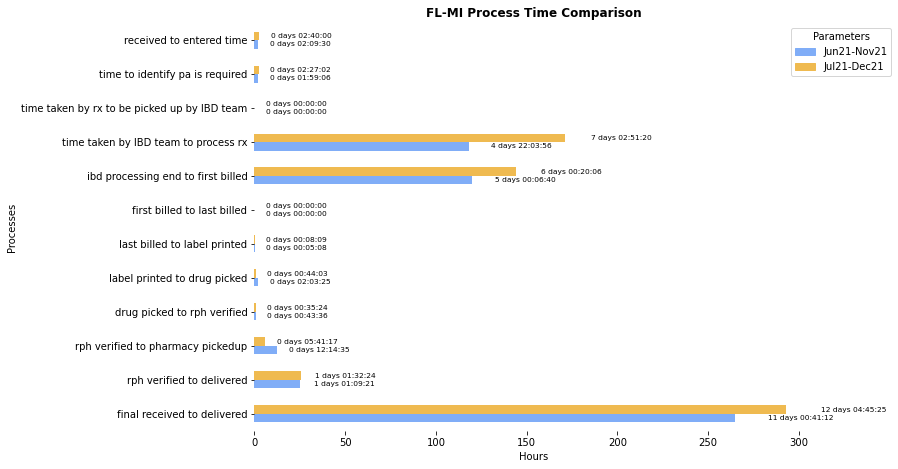

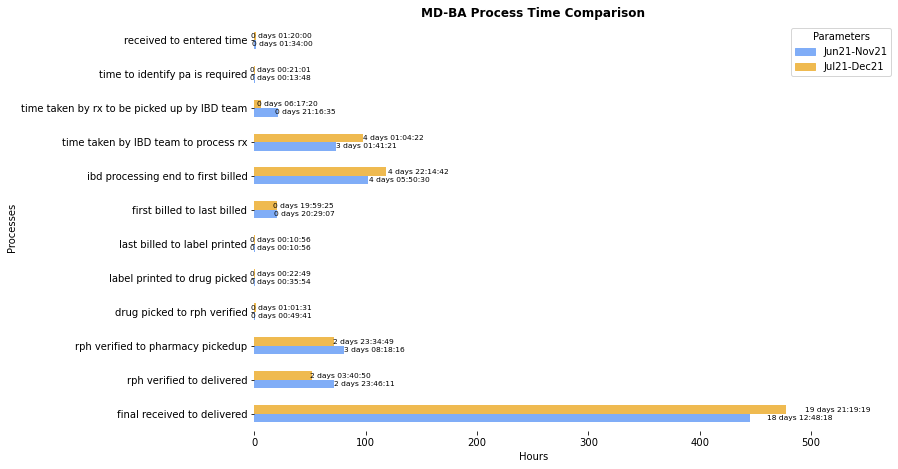

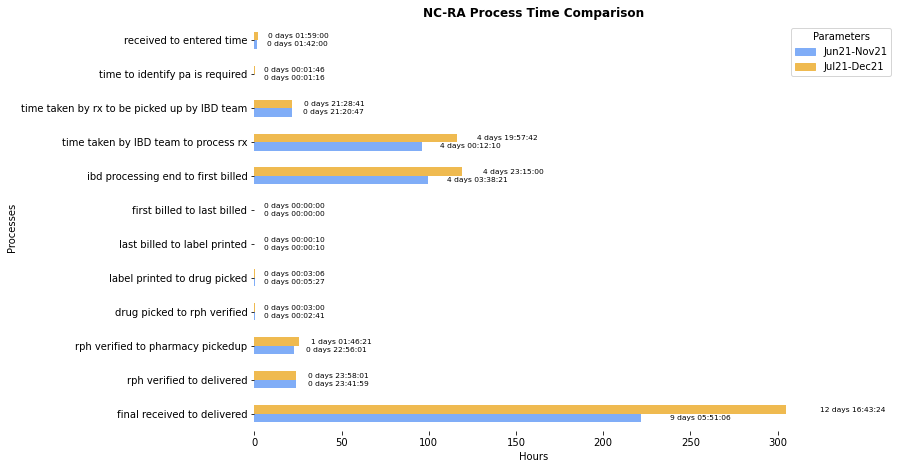

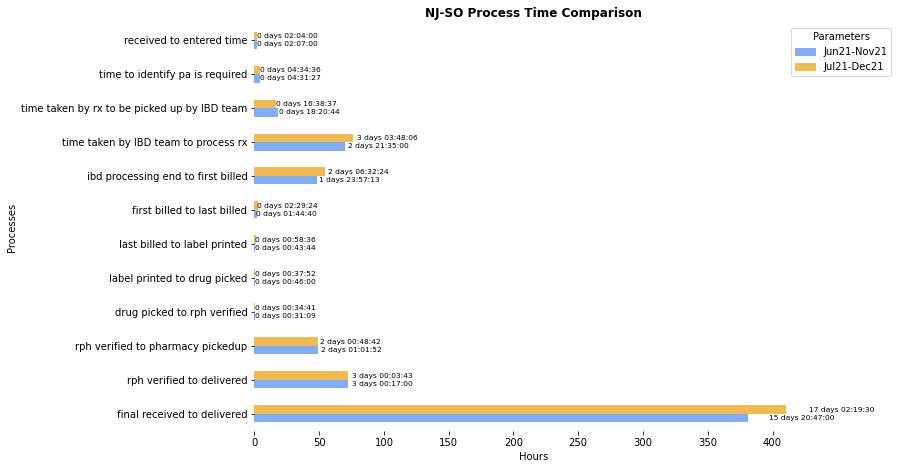

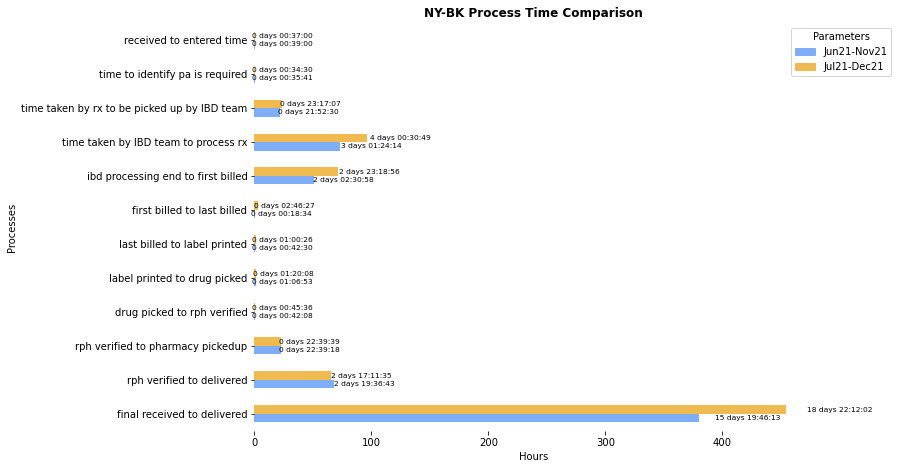

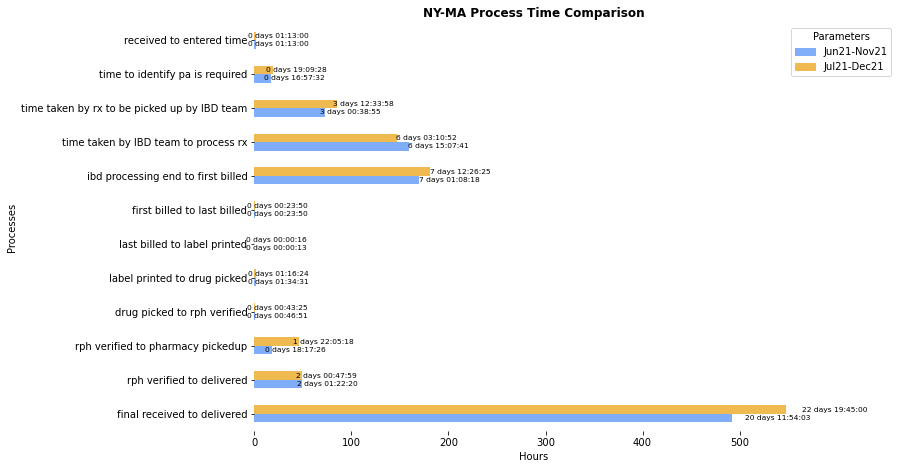

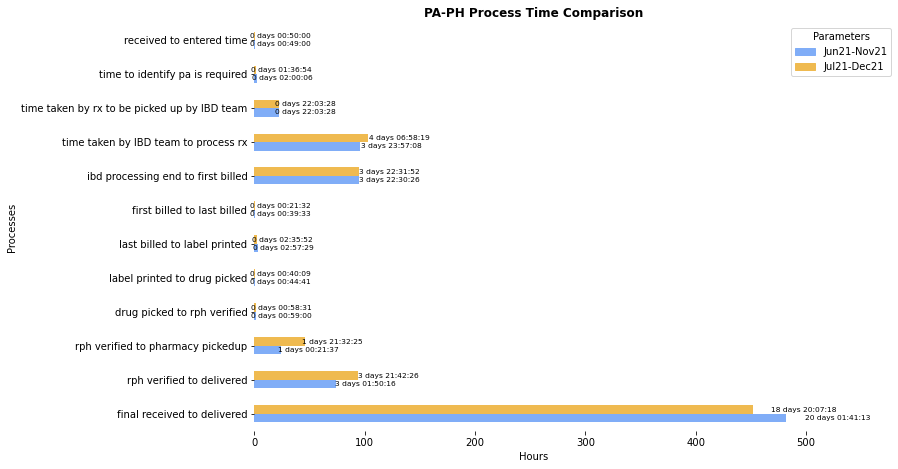

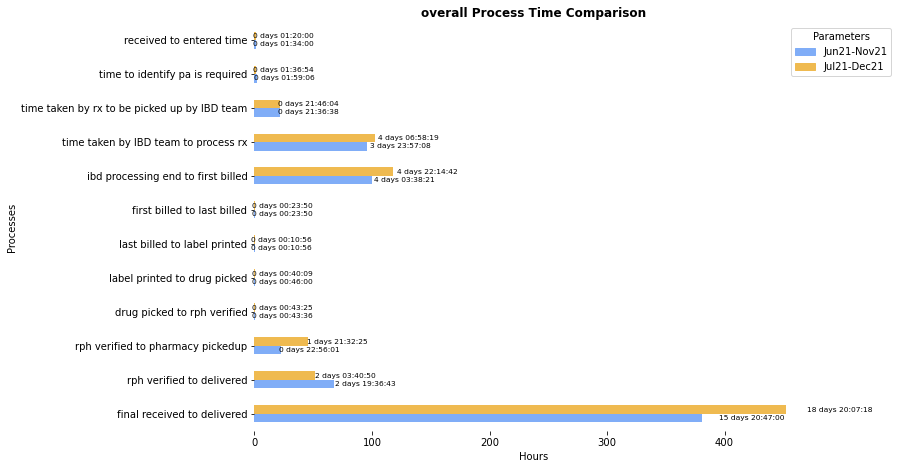

In [74]:
### 2 Location wise bar plots comparison
for l in pharmacy_loc_list:
    try:
        s2_output_df_median_period_1_loc = s2_output_df_median_period_1[s2_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s2_output_df_median_period_1_loc

        ###
        s2_output_df_median_period_2_loc = s2_output_df_median_period_2[s2_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s2_output_df_median_period_2_loc

        ### 

        ###
        scenario_2_loc = s2_output_df_median_period_1_loc.append([s2_output_df_median_period_2_loc], ignore_index = True)

        ###
        scenario_2_loc_final = scenario_2_loc.copy()

        ###
        scenario_2_loc_final['time_period'] = [period_1, period_2]

        ###
        scenario_2_loc_final.columns.tolist()
        ###
        scenario_2_loc_final = scenario_2_loc_final[['time_period','pharmacy_loc', 
        'median_time_received_to_entered_time_count','median_time_received_to_entered_time', 'median_time_received_to_entered_time_hr',
        'median_time_time_to_identify_pa_is_required_count','median_time_time_to_identify_pa_is_required', 'median_time_time_to_identify_pa_is_required_hr',
        'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count','median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team', 'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr',
        'median_time_time_taken_by_IBD_team_to_process_rx_count','median_time_time_taken_by_IBD_team_to_process_rx', 'median_time_time_taken_by_IBD_team_to_process_rx_hr',
        'median_time_ibd_processing_end_to_first_billed_count','median_time_ibd_processing_end_to_first_billed', 'median_time_ibd_processing_end_to_first_billed_hr',
        'median_time_first_billed_to_last_billed_count','median_time_first_billed_to_last_billed','median_time_first_billed_to_last_billed_hr',
        'median_time_last_billed_to_label_printed_count','median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
        'median_time_label_printed_to_drug_picked_count','median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
        'median_time_drug_picked_to_rph_verified_count','median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
        'median_time_rph_verified_to_pharmacy_pickedup_count', 'median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
        'median_time_rph_verified_to_delivered_count','median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
        'median_time_final_received_to_delivered_count','median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
        scenario_2_loc_final
        ###
        scenario_2_loc_final_df = scenario_2_loc_final.copy()
        ###
        scenario_2_loc_final_df_plot = scenario_2_loc_final[['time_period',
        'median_time_final_received_to_delivered',
        'median_time_rph_verified_to_delivered',
        'median_time_rph_verified_to_pharmacy_pickedup',
        'median_time_drug_picked_to_rph_verified',
        'median_time_label_printed_to_drug_picked',
        'median_time_last_billed_to_label_printed',
        'median_time_first_billed_to_last_billed',
        'median_time_ibd_processing_end_to_first_billed',
        'median_time_time_taken_by_IBD_team_to_process_rx',
        'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',
        'median_time_time_to_identify_pa_is_required',
        'median_time_received_to_entered_time']]

        scenario_2_loc_final_df_plot.set_index('time_period', inplace = True)
        scenario_2_loc_final_df_plot

        ###
        my_string  = scenario_2_loc_final_df_plot[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_2_loc_final_df_plot.columns = new_column_names
        ###
        scenario_2_loc_final_df_plot = scenario_2_loc_final_df_plot.T
        scenario_2_loc_final_df_plot.replace(pd.NaT, pd.Timedelta(0), inplace = True)
        for i in scenario_2_loc_final_df_plot.columns:
            scenario_2_loc_final_df_plot[i] = scenario_2_loc_final_df_plot[i].dt.round('s')
        
        
        ###
        data_hour = scenario_2_loc_final_df_plot.copy()
        ###
        for i in data_hour:
            data_hour[i] = round(data_hour[i].dt.total_seconds()/3600,2)

        data_hour = data_hour.fillna(0)
        data_hour
        ##
        list1 = scenario_2_loc_final_df_plot[period_2].tolist()
        list2 = scenario_2_loc_final_df_plot[period_1].tolist()
        list_final = list2 + list1
        list_final
        ##
        def autolabel3(rects):
            for rect,g in zip(rects,list_final):
                width = rect.get_width()
                plt.text(1.05*rect.get_width()+23, rect.get_y()+0.5*rect.get_height(),
                         f'{str(g)}',
                         ha='center', va='center',fontsize=7.5)
        ###
        ax = data_hour.plot(kind='barh',rot=360,figsize=(10,7.5),color=color_code,width=bar_width)

        rects = ax.patches

        autolabel3(rects)

        plt.title(str(l)+' Process Time Comparison',fontsize = font_size_title,fontweight=font_weight ,fontname = font_name)        
        plt.ylabel('Processes')
        plt.xlabel('Hours')

        orange_patch = mpatches.Patch(color = orange_color, label = period_2)
        blue_patch = mpatches.Patch(color = blue_color, label = period_1)
        # yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
        legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.savefig(output_distribution_sce_2+str(l)+' Scen_2_bar_overall.png', bbox_inches='tight', dpi=300,pad_inches = 0)
#         plt.show()
    except:
        pass

In [75]:
# heatmap
scenario_2_ny_bk_final_df_heatmap = scenario_2_ny_bk_final_df.copy()
scenario_2_ny_bk_final_df_heatmap.replace(pd.NaT, pd.Timedelta(0), inplace = True)
scenario_2_ny_bk_final_df_heatmap = scenario_2_ny_bk_final_df_heatmap[['time_period', 
'median_time_received_to_entered_time',
'median_time_time_to_identify_pa_is_required',
'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',
'median_time_time_taken_by_IBD_team_to_process_rx',
'median_time_ibd_processing_end_to_first_billed',
'median_time_first_billed_to_last_billed',
'median_time_last_billed_to_label_printed',
'median_time_label_printed_to_drug_picked',
'median_time_drug_picked_to_rph_verified',
'median_time_rph_verified_to_pharmacy_pickedup',
'median_time_rph_verified_to_delivered',
'median_time_final_received_to_delivered']]
scenario_2_ny_bk_final_df_heatmap.set_index('time_period', inplace = True)

my_string  = scenario_2_ny_bk_final_df_heatmap[1:].columns.str[12:]
new_column_names = []
for i in my_string:
    nn = i.replace("_", " ")
    new_column_names.append(nn)

scenario_2_ny_bk_final_df_heatmap.columns = new_column_names
# scenario_1_ny_bk_final_df_heatmap
# scenario_1_ny_bk_final_df_heatmap.set_index('time_period', inplace = True)
scenario_2_ny_bk_final_df_heatmap = scenario_2_ny_bk_final_df_heatmap.T

for i in scenario_2_ny_bk_final_df_heatmap.columns:
    scenario_2_ny_bk_final_df_heatmap[i] = scenario_2_ny_bk_final_df_heatmap[i].dt.round('s')

scenario_2_ny_bk_final_df_heatmap


time_period,Jun21-Nov21,Jul21-Dec21
received to entered time,0 days 00:39:00,0 days 00:37:00
time to identify pa is required,0 days 00:35:41,0 days 00:34:30
time taken by rx to be picked up by IBD team,0 days 21:52:30,0 days 23:17:07
time taken by IBD team to process rx,3 days 01:24:14,4 days 00:30:49
ibd processing end to first billed,2 days 02:30:58,2 days 23:18:56
first billed to last billed,0 days 00:18:34,0 days 02:46:27
last billed to label printed,0 days 00:42:30,0 days 01:00:26
label printed to drug picked,0 days 01:06:53,0 days 01:20:08
drug picked to rph verified,0 days 00:42:08,0 days 00:45:36
rph verified to pharmacy pickedup,0 days 22:39:18,0 days 22:39:39


In [76]:
scenario_2_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_2_ny_bk_final_df_heatmap[[period_1,period_2]].max(axis=1)
scenario_2_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_2_ny_bk_final_df_heatmap[[period_1, period_2]].min(axis=1)
scenario_2_ny_bk_final_df_heatmap['abs Change w.r.t last period'] = scenario_2_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_2_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2]

scenario_2_ny_bk_final_df_heatmap['% Change w.r.t last period'] = round((scenario_2_ny_bk_final_df_heatmap[period_2] - scenario_2_ny_bk_final_df_heatmap[period_1])/scenario_2_ny_bk_final_df_heatmap[period_1]*100,2)

scenario_2_ny_bk_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)
scenario_2_ny_bk_final_df_heatmap


time_period,Jun21-Nov21,Jul21-Dec21,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:39:00,0 days 00:37:00,0 days 00:02:00,-5.13
time to identify pa is required,0 days 00:35:41,0 days 00:34:30,0 days 00:01:11,-3.32
time taken by rx to be picked up by IBD team,0 days 21:52:30,0 days 23:17:07,0 days 01:24:37,6.45
time taken by IBD team to process rx,3 days 01:24:14,4 days 00:30:49,0 days 23:06:35,31.48
ibd processing end to first billed,2 days 02:30:58,2 days 23:18:56,0 days 20:47:58,41.17
first billed to last billed,0 days 00:18:34,0 days 02:46:27,0 days 02:27:53,796.50
last billed to label printed,0 days 00:42:30,0 days 01:00:26,0 days 00:17:56,42.20
label printed to drug picked,0 days 01:06:53,0 days 01:20:08,0 days 00:13:15,19.81
drug picked to rph verified,0 days 00:42:08,0 days 00:45:36,0 days 00:03:28,8.23
rph verified to pharmacy pickedup,0 days 22:39:18,0 days 22:39:39,0 days 00:00:21,0.03


In [77]:
scenario_2_ny_bk_final_df_heatmap = scenario_2_ny_bk_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]
scenario_2_ny_bk_final_df_heatmap


time_period,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:02:00,-5.13
time to identify pa is required,0 days 00:01:11,-3.32
time taken by rx to be picked up by IBD team,0 days 01:24:37,6.45
time taken by IBD team to process rx,0 days 23:06:35,31.48
ibd processing end to first billed,0 days 20:47:58,41.17
first billed to last billed,0 days 02:27:53,796.50
last billed to label printed,0 days 00:17:56,42.20
label printed to drug picked,0 days 00:13:15,19.81
drug picked to rph verified,0 days 00:03:28,8.23
rph verified to pharmacy pickedup,0 days 00:00:21,0.03


In [78]:
def format_arrow_text(value):
    if value < 0:
        indicator = '<span style="color:green;">⮟</span> ' 
    elif value > 0:
        indicator = '<span style="color:red;">⮝</span> ' 
    else:
        indicator = ''
    return f'{indicator} {abs(value)}%' #'{:.2f}'

In [79]:
subset_value = (['% Change w.r.t last period'])
# df_style2 = scenario_2_ny_bk_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
# # format({'total_amt_usd_pct_diff': "{:.2%}"})
# # dfi.export(df_style2, output_image_path+'scen_2_abs_per_change_comparison.png')
# df_style2

style_df = scenario_2_ny_bk_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'black','border-width':'thin','border-style':'solid'}).format(format_arrow_text, subset=subset_value)#.set_table_styles([{
#    'selector': 'th', 'props': [('border', '1px black solid !important')]}]).set_caption('Processing Time Comparison for period Jan21-June21 to Feb21-July21')

style_df

time_period,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:02:00,⮟ 5.13%
time to identify pa is required,0 days 00:01:11,⮟ 3.32%
time taken by rx to be picked up by IBD team,0 days 01:24:37,⮝ 6.45%
time taken by IBD team to process rx,0 days 23:06:35,⮝ 31.48%
ibd processing end to first billed,0 days 20:47:58,⮝ 41.17%
first billed to last billed,0 days 02:27:53,⮝ 796.5%
last billed to label printed,0 days 00:17:56,⮝ 42.2%
label printed to drug picked,0 days 00:13:15,⮝ 19.81%
drug picked to rph verified,0 days 00:03:28,⮝ 8.23%
rph verified to pharmacy pickedup,0 days 00:00:21,⮝ 0.03%


# Scenario - 2 Location wise heatmap

In [80]:
###  Scenario - 2 Location wise heatmap
for l in pharmacy_loc_list:
#     print(l)
    try:
        s2_output_df_median_period_1_loc = s2_output_df_median_period_1[s2_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s2_output_df_median_period_1_loc

        ###
        s2_output_df_median_period_2_loc = s2_output_df_median_period_2[s2_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s2_output_df_median_period_2_loc

        ###

        ###
        scenario_2_loc = s2_output_df_median_period_1_loc.append([s2_output_df_median_period_2_loc], ignore_index = True)
        scenario_2_loc

        scenario_2_loc_final = scenario_2_loc.copy()

        ###
        scenario_2_loc_final['time_period'] = [period_1, period_2]
        scenario_2_loc_final

        # heatmap
        scenario_2_loc_final_df_heatmap = scenario_2_loc_final.copy()
        scenario_2_loc_final_df_heatmap.replace(pd.NaT, pd.Timedelta(0), inplace = True)
        scenario_2_loc_final_df_heatmap = scenario_2_loc_final_df_heatmap[['time_period', 
        'median_time_received_to_entered_time',
        'median_time_time_to_identify_pa_is_required',
        'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',
        'median_time_time_taken_by_IBD_team_to_process_rx',
        'median_time_ibd_processing_end_to_first_billed',
        'median_time_first_billed_to_last_billed',
        'median_time_last_billed_to_label_printed',
        'median_time_label_printed_to_drug_picked',
        'median_time_drug_picked_to_rph_verified',
        'median_time_rph_verified_to_pharmacy_pickedup',
        'median_time_rph_verified_to_delivered',
        'median_time_final_received_to_delivered']]
        scenario_2_loc_final_df_heatmap.set_index('time_period', inplace = True)
#         print(l)
        my_string  = scenario_2_loc_final_df_heatmap[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_2_loc_final_df_heatmap.columns = new_column_names

        scenario_2_loc_final_df_heatmap = scenario_2_loc_final_df_heatmap.T
        
        for i in scenario_2_loc_final_df_heatmap.columns:
            scenario_2_loc_final_df_heatmap[i] = scenario_2_loc_final_df_heatmap[i].dt.round('s')

        ###
        scenario_2_loc_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_2_loc_final_df_heatmap[[period_1,period_2]].max(axis=1)
        scenario_2_loc_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_2_loc_final_df_heatmap[[period_1, period_2]].min(axis=1)
        scenario_2_loc_final_df_heatmap['abs Change w.r.t last period'] = scenario_2_loc_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_2_loc_final_df_heatmap['min_'+period_1+'_'+period_2]
        scenario_2_loc_final_df_heatmap['% Change w.r.t last period'] = round((scenario_2_loc_final_df_heatmap[period_2] - scenario_2_loc_final_df_heatmap[period_1])/scenario_2_loc_final_df_heatmap[period_1]*100,2)

#         scenario_2_loc_final_df_heatmap['max_Jan21_Jun21'] = scenario_2_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].max(axis=1)
#         scenario_2_loc_final_df_heatmap['min_Jan21_Jun21'] = scenario_2_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].min(axis=1)
#         scenario_2_loc_final_df_heatmap['abs Change w.r.t last months'] = scenario_2_loc_final_df_heatmap['max_Jan21_Jun21'] - scenario_2_loc_final_df_heatmap['min_Jan21_Jun21']
#         scenario_2_loc_final_df_heatmap['% Change w.r.t last month'] = round((scenario_2_loc_final_df_heatmap['Jun21'] - scenario_2_loc_final_df_heatmap['Jan21_Jun21'])/scenario_2_loc_final_df_heatmap['Jan21_Jun21']*100,2)
        scenario_2_loc_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)
#         print(l)
        # ###
        scenario_2_loc_final_df_heatmap = scenario_2_loc_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]
        scenario_2_loc_final_df_heatmap
        ###
#         subset_value = (['% Change w.r.t last period'])
#         df_style = scenario_2_loc_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
        
        ###
#         dfi.export(df_style, output_distribution_sce_2+str(l)+' scen_2_abs_per_change_comparison.png')
#         df_style
        style_df = scenario_2_loc_final_df_heatmap.style.set_properties(**body_design).format(format_arrow_text, subset=['% Change w.r.t last period']).set_table_styles([{
        'selector': 'th', 'props': [('border', '1px black solid !important')]}]).set_caption('Processing Time Comparison for period' +period_1 +'to' + period_2 + '('+str(l) +')')
        style_df.set_table_styles([border_design])
        html_1= style_df.render()
        hti = Html2Image(output_path=output_distribution_sce_2)
        hti.screenshot(html_str=html_1, save_as=str(l)+' scen_2_abs_per_change_comparison_overall.png',size=(500, 500))

    except:
        print(l)
        pass

# --------------- Scenario-3 Analysis ---------------

# scenario-3 jan to june

In [81]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count_3 = []
list_median_time_received_to_entered_time_3 = []

list_median_time_entered_to_first_billed_count_3 = []
list_median_time_entered_to_first_billed_3 = []

list_median_time_first_billed_to_last_billed_count_3 = []
list_median_time_first_billed_to_last_billed_3 = []

list_median_time_entered_to_last_billed_count_3 = []
list_median_time_entered_to_last_billed_3 = []

list_median_time_entered_to_label_printed_count_3 = []
list_median_time_entered_to_label_printed_3 = []

list_median_time_last_billed_to_label_printed_count_3 = []
list_median_time_last_billed_to_label_printed_3 = []

list_median_time_label_printed_to_drug_picked_count_3 = []
list_median_time_label_printed_to_drug_picked_3 = []

list_median_time_drug_picked_to_rph_verified_count_3 = []
list_median_time_drug_picked_to_rph_verified_3 = []

list_median_time_rph_verified_to_pharmacy_pickedup_count_3 = []
list_median_time_rph_verified_to_pharmacy_pickedup_3 = []

list_median_time_rph_verified_to_batch_creation_count_3 = []
list_median_time_rph_verified_to_batch_creation_3 = []

list_median_time_batch_creation_to_delivered_count_3 = []
list_median_time_batch_creation_to_delivered_3 = []

list_median_time_rph_verified_to_delivered_count_3 = []
list_median_time_rph_verified_to_delivered_3 = []

list_median_time_ibd_processing_start_to_end_count_3 = []
list_median_time_ibd_processing_start_to_end_3 = []

list_median_time_ibd_processing_end_to_first_billed_count_3 = []
list_median_time_ibd_processing_end_to_first_billed_3 = []

list_median_time_rph_verified_to_delivery_pickedup_count_3 = []
list_median_time_rph_verified_to_delivery_pickedup_3 = []

list_median_time_delivery_pickedup_to_delivered_count_3 = []
list_median_time_delivery_pickedup_to_delivered_3 = []

list_median_time_final_received_to_delivered_count_3 = []
list_median_time_final_received_to_delivered_3 = []

list_median_time_time_to_identify_pa_is_required_count_3 = []
list_median_time_time_to_identify_pa_is_required_3 = []

list_median_time_waiting_time_for_ibd_processing_count_3 = []
list_median_time_waiting_time_for_ibd_processing_3 = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_3 = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_3 = []

list_median_time_ibd_processing_end_to_label_printed_count_3 = []
list_median_time_ibd_processing_end_to_label_printed_3 = []

list_median_time_rx_entered_to_callins_processing_start_count_3 = []
list_median_time_rx_entered_to_callins_processing_start_3 = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count_3 = []
list_median_time_time_taken_by_IBD_team_to_process_rx_3 = []

list_median_time_time_taken_for_call_for_insurance_process_count_3 = []
list_median_time_time_taken_for_call_for_insurance_process_3 = []


pharmacy_loc_3 = []
month_key_3 = []

for i in np.unique(sce_3_df_period_1.pharmacy_loc):
    loc = i
    pharmacy_loc_3.append(i)
    xc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count_3.append(xc_3)
    x_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_3.append(x_3)
    
    yc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count_3.append(yc_3)
    y_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_3.append(y_3)
    
    zc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count_3.append(zc_3)
    z_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_3.append(z_3)
    
    ac_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count_3.append(ac_3)
    a_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_3.append(a_3)
    
    bc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count_3.append(bc_3)
    b_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_3.append(b_3)
    
    rc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count_3.append(rc_3)
    r_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_3.append(r_3)
    
    ec_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count_3.append(ec_3)
    e_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_3.append(e_3)
    
    fc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count_3.append(fc_3)
    f_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_3.append(f_3)
    
    gc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count_3.append(gc_3)
    g_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_3.append(g_3)
    
    hc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count_3.append(hc_3)
    h_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_3.append(h_3)
    
    jc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count_3.append(jc_3)
    j_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_3.append(j_3)
    
    lc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count_3.append(lc_3)
    l_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_3.append(l_3)
    
    mc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count_3.append(mc_3)
    m_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_3.append(m_3)
    
    nc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count_3.append(nc_3)
    n_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_3.append(n_3)
    
    oc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count_3.append(oc_3)
    o_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_3.append(o_3)
    
    pc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count_3.append(pc_3)
    p_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_3.append(p_3)
    
    qc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count_3.append(qc_3)
    q_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_3.append(q_3)
    
    tc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count_3.append(tc_3)
    t_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_3.append(t_3)
    
    uc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count_3.append(uc_3)
    u_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_3.append(u_3)
    
    vc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_3.append(vc_3)
    v_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_3.append(v_3)
    
    wc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count_3.append(wc_3)
    w_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_3.append(w_3)
    
    cc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count_3.append(cc_3)
    c_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_3.append(c_3)
    
    ffc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count_3.append(ffc_3)
    ff_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_3.append(ff_3)
    
    ccc_3 = get_count(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count_3.append(ccc_3)
    cc_3 = get_median_timedelta(sce_3_df_period_1[sce_3_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_3.append(cc_3)


    
    
s3_output_df_median_period_1 = pd.DataFrame()
s3_output_df_median_period_1['pharmacy_loc'] = pharmacy_loc_3
s3_output_df_median_period_1['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count_3
s3_output_df_median_period_1['median_time_received_to_entered_time_count'] = round(s3_output_df_median_period_1['median_time_received_to_entered_time_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time_3
s3_output_df_median_period_1['median_time_received_to_entered_time_hr'] = round(s3_output_df_median_period_1['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_1['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count_3
s3_output_df_median_period_1['median_time_entered_to_first_billed_count'] = round(s3_output_df_median_period_1['median_time_entered_to_first_billed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed_3
s3_output_df_median_period_1['median_time_entered_to_first_billed_hr'] = round(s3_output_df_median_period_1['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count_3
s3_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = round(s3_output_df_median_period_1['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed_3
s3_output_df_median_period_1['median_time_first_billed_to_last_billed_hr'] = round(s3_output_df_median_period_1['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_1['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count_3
s3_output_df_median_period_1['median_time_entered_to_last_billed_count'] = round(s3_output_df_median_period_1['median_time_entered_to_last_billed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed_3
s3_output_df_median_period_1['median_time_entered_to_last_billed_hr'] = round(s3_output_df_median_period_1['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_1['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count_3
s3_output_df_median_period_1['median_time_entered_to_label_printed_count'] = round(s3_output_df_median_period_1['median_time_entered_to_label_printed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed_3
s3_output_df_median_period_1['median_time_entered_to_label_printed_hr'] = round(s3_output_df_median_period_1['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s3_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count_3
s3_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = round(s3_output_df_median_period_1['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed_3
s3_output_df_median_period_1['median_time_last_billed_to_label_printed_hr'] = round(s3_output_df_median_period_1['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count_3
s3_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = round(s3_output_df_median_period_1['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked_3
s3_output_df_median_period_1['median_time_label_printed_to_drug_picked_hr'] = round(s3_output_df_median_period_1['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count_3
s3_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = round(s3_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified_3
s3_output_df_median_period_1['median_time_drug_picked_to_rph_verified_hr'] = round(s3_output_df_median_period_1['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count_3
s3_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup_3
s3_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count_3
s3_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation_3
s3_output_df_median_period_1['median_time_rph_verified_to_batch_creation_hr'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count_3
s3_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = round(s3_output_df_median_period_1['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered_3
s3_output_df_median_period_1['median_time_batch_creation_to_delivered_hr'] = round(s3_output_df_median_period_1['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count_3
s3_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered_3
s3_output_df_median_period_1['median_time_rph_verified_to_delivered_hr'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count_3
s3_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = round(s3_output_df_median_period_1['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end_3
s3_output_df_median_period_1['median_time_ibd_processing_start_to_end'] = s3_output_df_median_period_1['median_time_ibd_processing_start_to_end'].replace(np.nan,pd.to_timedelta(0))
s3_output_df_median_period_1['median_time_ibd_processing_start_to_end_hr'] = round(s3_output_df_median_period_1['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count_3
s3_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = round(s3_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed_3
s3_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_hr'] = round(s3_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count_3
s3_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup_3
s3_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s3_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count_3
s3_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = round(s3_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered_3
s3_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_hr'] = round(s3_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count_3
s3_output_df_median_period_1['median_time_final_received_to_delivered_count'] = round(s3_output_df_median_period_1['median_time_final_received_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered_3
s3_output_df_median_period_1['median_time_final_received_to_delivered_hr'] = round(s3_output_df_median_period_1['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count_3
s3_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = round(s3_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required_3
s3_output_df_median_period_1['median_time_time_to_identify_pa_is_required_hr'] = round(s3_output_df_median_period_1['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count_3
s3_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = round(s3_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing_3
s3_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_hr'] = round(s3_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_3
s3_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s3_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_3
s3_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s3_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count_3
s3_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = round(s3_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed_3
s3_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_hr'] = round(s3_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count_3
s3_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = round(s3_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start_3
s3_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_hr'] = round(s3_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count_3
s3_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s3_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s3_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx_3
s3_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s3_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s3_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count_3
s3_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = round(s3_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s3_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process_3
s3_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s3_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [82]:
s3_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,19,0 days 01:55:00,1.92,14,10 days 10:25:23.500000,250.42,14,0 days 00:00:00,0.00,14,11 days 20:58:24,284.97,12,12 days 06:27:11,294.45,10,0 days 00:02:13,0.04,8,0 days 01:37:00,1.62,9,0 days 00:45:48,0.76,0,0 days 02:23:06.500000,2.39,6,1 days 02:07:42.500000,26.13,6,0 days 02:22:06.500000,2.37,6,1 days 06:30:58.500000,30.52,0,0 days,0.0,12,6 days 01:46:11.500000,145.77,6,1 days 10:18:49.500000,34.31,5,0 days 13:42:37,13.71,6,15 days 10:44:26.500000,370.74,32,2 days 04:28:18,52.47,8,10 days 23:20:17,263.34,0,NaT,NaN,3,1 days 10:30:45,34.51,32,0 days 04:49:02,4.82,8,4 days 21:11:06,117.18,32,0 days 22:49:41,22.83
1,MD-BA,24,0 days 01:30:00,1.5

In [83]:
s3_output_df_median_period_1 = s3_output_df_median_period_1.append(s3_output_df_median_period_1.median(axis=0), ignore_index = True)
s3_output_df_median_period_1['pharmacy_loc'] = s3_output_df_median_period_1['pharmacy_loc'].fillna('overall')
s3_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,19.0,0 days 01:55:00,1.92,14.0,10 days 10:25:23.500000,250.42,14.0,0 days 00:00:00,0.00,14.0,11 days 20:58:24,284.97,12.0,12 days 06:27:11,294.45,10.0,0 days 00:02:13,0.04,8.0,0 days 01:37:00,1.62,9.0,0 days 00:45:48,0.76,0.0,0 days 02:23:06.500000,2.39,6.0,1 days 02:07:42.500000,26.13,6.0,0 days 02:22:06.500000,2.37,6.0,1 days 06:30:58.500000,30.52,0.0,0 days,0.0,12.0,6 days 01:46:11.500000,145.77,6.0,1 days 10:18:49.500000,34.31,5.0,0 days 13:42:37,13.71,6.0,15 days 10:44:26.500000,370.74,32.0,2 days 04:28:18,52.47,8.0,10 days 23:20:17,263.34,0.0,NaT,NaN,3.0,1 days 10:30:45,34.51,32.0,0 days 04:49:02,4.82,8.0,4 days 21:11:06,117.18,32.0,0 da

In [84]:
s3_output_df_median_period_1_ny_bk = s3_output_df_median_period_1[s3_output_df_median_period_1['pharmacy_loc'] == 'NY-BK']#.reset_index()
s3_output_df_median_period_1_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
4,NY-BK,151.0,0 days 00:39:00,0.65,118.0,6 days 23:06:33,167.11,119.0,0 days 00:34:02,0.57,119.0,15 days 21:28:20,381.47,105.0,14 days 19:06:10,355.1,85.0,0 days 00:34:51,0.58,71.0,0 days 01:08:44.500000,1.15,81.0,0 days 00:50:22,0.84,5.0,0 days 02:11:48,2.2,58.0,2 days 20:11:03,68.18,48.0,0 days 03:09:11,3.15,55.0,2 days 22:09:22,70.16,0.0,0 days,0.0,86.0,2 days 18:50:15,66.84,60.0,4 days 05:26:41,101.44,36.0,0 days 13:08:05,13.13,55.0,18 days 17:25:23.500000,449.42,189.0,1 days 19:45:44,43.76,74.0,8 days 01:51:07.500000,193.85,12.0,0 days 22:29:11,22.49,38.0,3 days 12:58:19,84.97,182.0,0 days 00:24:26,0.41,76.0,3 days 18:54:07,90.9,192.0,1 days 02:4

# scenario-3 period_2

In [85]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count_3 = []
list_median_time_received_to_entered_time_3 = []

list_median_time_entered_to_first_billed_count_3 = []
list_median_time_entered_to_first_billed_3 = []

list_median_time_first_billed_to_last_billed_count_3 = []
list_median_time_first_billed_to_last_billed_3 = []

list_median_time_entered_to_last_billed_count_3 = []
list_median_time_entered_to_last_billed_3 = []

list_median_time_entered_to_label_printed_count_3 = []
list_median_time_entered_to_label_printed_3 = []

list_median_time_last_billed_to_label_printed_count_3 = []
list_median_time_last_billed_to_label_printed_3 = []

list_median_time_label_printed_to_drug_picked_count_3 = []
list_median_time_label_printed_to_drug_picked_3 = []

list_median_time_drug_picked_to_rph_verified_count_3 = []
list_median_time_drug_picked_to_rph_verified_3 = []

list_median_time_rph_verified_to_pharmacy_pickedup_count_3 = []
list_median_time_rph_verified_to_pharmacy_pickedup_3 = []

list_median_time_rph_verified_to_batch_creation_count_3 = []
list_median_time_rph_verified_to_batch_creation_3 = []

list_median_time_batch_creation_to_delivered_count_3 = []
list_median_time_batch_creation_to_delivered_3 = []

list_median_time_rph_verified_to_delivered_count_3 = []
list_median_time_rph_verified_to_delivered_3 = []

list_median_time_ibd_processing_start_to_end_count_3 = []
list_median_time_ibd_processing_start_to_end_3 = []

list_median_time_ibd_processing_end_to_first_billed_count_3 = []
list_median_time_ibd_processing_end_to_first_billed_3 = []

list_median_time_rph_verified_to_delivery_pickedup_count_3 = []
list_median_time_rph_verified_to_delivery_pickedup_3 = []

list_median_time_delivery_pickedup_to_delivered_count_3 = []
list_median_time_delivery_pickedup_to_delivered_3 = []

list_median_time_final_received_to_delivered_count_3 = []
list_median_time_final_received_to_delivered_3 = []

list_median_time_time_to_identify_pa_is_required_count_3 = []
list_median_time_time_to_identify_pa_is_required_3 = []

list_median_time_waiting_time_for_ibd_processing_count_3 = []
list_median_time_waiting_time_for_ibd_processing_3 = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_3 = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_3 = []

list_median_time_ibd_processing_end_to_label_printed_count_3 = []
list_median_time_ibd_processing_end_to_label_printed_3 = []

list_median_time_rx_entered_to_callins_processing_start_count_3 = []
list_median_time_rx_entered_to_callins_processing_start_3 = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count_3 = []
list_median_time_time_taken_by_IBD_team_to_process_rx_3 = []

list_median_time_time_taken_for_call_for_insurance_process_count_3 = []
list_median_time_time_taken_for_call_for_insurance_process_3 = []


pharmacy_loc_3 = []
month_key_3 = []

for i in np.unique(sce_3_df_period_2.pharmacy_loc):
    loc = i
    pharmacy_loc_3.append(i)
    xc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count_3.append(xc_3)
    x_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_3.append(x_3)
    
    yc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count_3.append(yc_3)
    y_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_3.append(y_3)
    
    zc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count_3.append(zc_3)
    z_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_3.append(z_3)
    
    ac_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count_3.append(ac_3)
    a_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_3.append(a_3)
    
    bc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count_3.append(bc_3)
    b_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_3.append(b_3)
    
    rc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count_3.append(rc_3)
    r_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_3.append(r_3)
    
    ec_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count_3.append(ec_3)
    e_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_3.append(e_3)
    
    fc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count_3.append(fc_3)
    f_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_3.append(f_3)
    
    gc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count_3.append(gc_3)
    g_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_3.append(g_3)
    
    hc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count_3.append(hc_3)
    h_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_3.append(h_3)
    
    jc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count_3.append(jc_3)
    j_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_3.append(j_3)
    
    lc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count_3.append(lc_3)
    l_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_3.append(l_3)
    
    mc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count_3.append(mc_3)
    m_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_3.append(m_3)
    
    nc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count_3.append(nc_3)
    n_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_3.append(n_3)
    
    oc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count_3.append(oc_3)
    o_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_3.append(o_3)
    
    pc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count_3.append(pc_3)
    p_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_3.append(p_3)
    
    qc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count_3.append(qc_3)
    q_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_3.append(q_3)
    
    tc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count_3.append(tc_3)
    t_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_3.append(t_3)
    
    uc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count_3.append(uc_3)
    u_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_3.append(u_3)
    
    vc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_3.append(vc_3)
    v_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_3.append(v_3)
    
    wc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count_3.append(wc_3)
    w_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_3.append(w_3)
    
    cc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count_3.append(cc_3)
    c_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_3.append(c_3)
    
    ffc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count_3.append(ffc_3)
    ff_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_3.append(ff_3)
    
    ccc_3 = get_count(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count_3.append(ccc_3)
    cc_3 = get_median_timedelta(sce_3_df_period_2[sce_3_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_3.append(cc_3)


    
    
s3_output_df_median_period_2 = pd.DataFrame()
s3_output_df_median_period_2['pharmacy_loc'] = pharmacy_loc_3
s3_output_df_median_period_2['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count_3
s3_output_df_median_period_2['median_time_received_to_entered_time_count'] = round(s3_output_df_median_period_2['median_time_received_to_entered_time_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time_3
s3_output_df_median_period_2['median_time_received_to_entered_time_hr'] = round(s3_output_df_median_period_2['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_2['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count_3
s3_output_df_median_period_2['median_time_entered_to_first_billed_count'] = round(s3_output_df_median_period_2['median_time_entered_to_first_billed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed_3
s3_output_df_median_period_2['median_time_entered_to_first_billed_hr'] = round(s3_output_df_median_period_2['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count_3
s3_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = round(s3_output_df_median_period_2['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed_3
s3_output_df_median_period_2['median_time_first_billed_to_last_billed_hr'] = round(s3_output_df_median_period_2['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_2['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count_3
s3_output_df_median_period_2['median_time_entered_to_last_billed_count'] = round(s3_output_df_median_period_2['median_time_entered_to_last_billed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed_3
s3_output_df_median_period_2['median_time_entered_to_last_billed_hr'] = round(s3_output_df_median_period_2['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s3_output_df_median_period_2['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count_3
s3_output_df_median_period_2['median_time_entered_to_label_printed_count'] = round(s3_output_df_median_period_2['median_time_entered_to_label_printed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed_3
s3_output_df_median_period_2['median_time_entered_to_label_printed_hr'] = round(s3_output_df_median_period_2['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s3_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count_3
s3_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = round(s3_output_df_median_period_2['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed_3
s3_output_df_median_period_2['median_time_last_billed_to_label_printed_hr'] = round(s3_output_df_median_period_2['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count_3
s3_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = round(s3_output_df_median_period_2['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked_3
s3_output_df_median_period_2['median_time_label_printed_to_drug_picked_hr'] = round(s3_output_df_median_period_2['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count_3
s3_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = round(s3_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified_3
s3_output_df_median_period_2['median_time_drug_picked_to_rph_verified_hr'] = round(s3_output_df_median_period_2['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count_3
s3_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup_3
s3_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count_3
s3_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation_3
s3_output_df_median_period_2['median_time_rph_verified_to_batch_creation_hr'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count_3
s3_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = round(s3_output_df_median_period_2['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered_3
s3_output_df_median_period_2['median_time_batch_creation_to_delivered_hr'] = round(s3_output_df_median_period_2['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count_3
s3_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered_3
s3_output_df_median_period_2['median_time_rph_verified_to_delivered_hr'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count_3
s3_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = round(s3_output_df_median_period_2['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end_3
s3_output_df_median_period_2['median_time_ibd_processing_start_to_end'] = s3_output_df_median_period_2['median_time_ibd_processing_start_to_end'].replace(np.nan,pd.to_timedelta(0))
s3_output_df_median_period_2['median_time_ibd_processing_start_to_end_hr'] = round(s3_output_df_median_period_2['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count_3
s3_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = round(s3_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed_3
s3_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_hr'] = round(s3_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count_3
s3_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup_3
s3_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s3_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count_3
s3_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = round(s3_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered_3
s3_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_hr'] = round(s3_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count_3
s3_output_df_median_period_2['median_time_final_received_to_delivered_count'] = round(s3_output_df_median_period_2['median_time_final_received_to_delivered_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered_3
s3_output_df_median_period_2['median_time_final_received_to_delivered_hr'] = round(s3_output_df_median_period_2['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count_3
s3_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = round(s3_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required_3
s3_output_df_median_period_2['median_time_time_to_identify_pa_is_required_hr'] = round(s3_output_df_median_period_2['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count_3
s3_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = round(s3_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing_3
s3_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_hr'] = round(s3_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_3
s3_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s3_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_3
s3_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s3_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count_3
s3_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = round(s3_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed_3
s3_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_hr'] = round(s3_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count_3
s3_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = round(s3_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start_3
s3_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_hr'] = round(s3_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count_3
s3_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s3_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s3_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx_3
s3_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s3_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s3_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count_3
s3_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = round(s3_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s3_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process_3
s3_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s3_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [86]:
s3_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,15,0 days 02:37:30,2.62,9,11 days 13:20:55,277.35,9,0 days 00:00:00,0.00,9,13 days 05:11:01,317.18,8,15 days 01:46:59,361.78,7,0 days 00:06:12.500000,0.10,5,0 days 00:54:57.500000,0.92,6,0 days 00:18:54,0.32,0,0 days 02:23:06.500000,2.39,4,1 days 20:29:36,44.49,4,0 days 02:17:00,2.28,4,1 days 21:50:02,45.83,0,0 days,0.0,8,6 days 23:03:32.500000,167.06,4,1 days 10:23:32,34.39,4,0 days 13:42:37,13.71,4,16 days 21:40:04,405.67,22,2 days 01:16:18,49.27,6,22 days 14:05:12,542.09,0,NaT,NaN,2,1 days 22:07:30,46.12,22,0 days 06:20:38,6.34,5,10 days 10:51:00.500000,250.85,22,1 days 10:06:52.500000,34.11
1,MD-BA,26,0 days 01:21:30,1.36,19,14 days 21:22:

In [87]:
s3_output_df_median_period_2 = s3_output_df_median_period_2.append(s3_output_df_median_period_2.median(axis=0), ignore_index = True)
s3_output_df_median_period_2['pharmacy_loc'] = s3_output_df_median_period_2['pharmacy_loc'].fillna('overall')
s3_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,15.0,0 days 02:37:30,2.62,9.0,11 days 13:20:55,277.35,9.0,0 days 00:00:00,0.00,9.0,13 days 05:11:01,317.18,8.0,15 days 01:46:59,361.78,7.0,0 days 00:06:12.500000,0.10,5.0,0 days 00:54:57.500000,0.92,6.0,0 days 00:18:54,0.32,0.0,0 days 02:23:06.500000,2.39,4.0,1 days 20:29:36,44.49,4.0,0 days 02:17:00,2.28,4.0,1 days 21:50:02,45.83,0.0,0 days,0.0,8.0,6 days 23:03:32.500000,167.06,4.0,1 days 10:23:32,34.39,4.0,0 days 13:42:37,13.71,4.0,16 days 21:40:04,405.67,22.0,2 days 01:16:18,49.27,6.0,22 days 14:05:12,542.09,0.0,NaT,NaN,2.0,1 days 22:07:30,46.12,22.0,0 days 06:20:38,6.34,5.0,10 days 10:51:00.500000,250.85,22.0,1 days 10:06:52.500000,34.11
1

In [88]:
s3_output_df_median_period_2_ny_bk = s3_output_df_median_period_2[s3_output_df_median_period_2['pharmacy_loc'] == 'NY-BK']#.reset_index()
s3_output_df_median_period_2_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
4,NY-BK,168.0,0 days 00:39:00,0.65,120.0,8 days 00:25:44.500000,192.43,121.0,0 days 05:36:07,5.6,121.0,20 days 14:22:51.500000,494.38,103.0,18 days 02:46:00.500000,434.77,82.0,0 days 00:47:50,0.8,69.0,0 days 01:24:44,1.41,78.0,0 days 01:00:25.500000,1.01,5.0,0 days 01:46:44,1.78,54.0,2 days 16:43:04,64.72,54.0,0 days 03:29:57.500000,3.5,64.0,2 days 21:37:27,69.62,0.0,0 days,0.0,88.0,3 days 16:01:24,88.02,57.0,4 days 03:49:40,99.83,40.0,0 days 13:22:18,13.37,66.0,23 days 02:27:04.500000,554.45,210.0,1 days 18:28:34,42.48,84.0,10 days 23:45:12,263.75,13.0,1 days 00:03:32,24.06,36.0,6 days 16:19:06,160.32,202.0,0 days 00:29:12,0.49,85.0,4 days 05:01:12,1

In [89]:
scenario_3_ny_bk = s3_output_df_median_period_1_ny_bk.append([s3_output_df_median_period_2_ny_bk], ignore_index = True)
scenario_3_ny_bk


,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,NY-BK,151.0,0 days 00:39:00,0.65,118.0,6 days 23:06:33,167.11,119.0,0 days 00:34:02,0.57,119.0,15 days 21:28:20,381.47,105.0,14 days 19:06:10,355.10,85.0,0 days 00:34:51,0.58,71.0,0 days 01:08:44.500000,1.15,81.0,0 days 00:50:22,0.84,5.0,0 days 02:11:48,2.20,58.0,2 days 20:11:03,68.18,48.0,0 days 03:09:11,3.15,55.0,2 days 22:09:22,70.16,0.0,0 days,0.0,86.0,2 days 18:50:15,66.84,60.0,4 days 05:26:41,101.44,36.0,0 days 13:08:05,13.13,55.0,18 days 17:25:23.500000,449.42,189.0,1 days 19:45:44,43.76,74.0,8 days 01:51:07.500000,193.85,12.0,0 days 22:29:11,22.49,38.0,3 days 12:58:19,84.97,182.0,0 days 00:24:26,0.41,76.0,3 days 18:54:07,90.90,192.0,1 days 0

In [90]:
# for i in scenario_3_ny_bk.columns[1:]:
#     scenario_3_ny_bk[i] = pd.to_timedelta(scenario_3_ny_bk[i]).dt.round('s')
    

In [91]:
scenario_3_ny_bk_final = scenario_3_ny_bk.copy()

In [92]:
scenario_3_ny_bk_final['time_period'] = [period_1, period_2]
scenario_3_ny_bk_final

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_start_to_end_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_time_to_identify_pa_is_required_hr,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_waiting_time_for_ibd_processing_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_ibd_processing_end_to_label_printed_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr,time_period
0,NY-BK,151.0,0 days 00:39:00,0.65,118.0,6 days 23:06:33,167.11,119.0,0 days 00:34:02,0.57,119.0,15 days 21:28:20,381.47,105.0,14 days 19:06:10,355.10,85.0,0 days 00:34:51,0.58,71.0,0 days 01:08:44.500000,1.15,81.0,0 days 00:50:22,0.84,5.0,0 days 02:11:48,2.20,58.0,2 days 20:11:03,68.18,48.0,0 days 03:09:11,3.15,55.0,2 days 22:09:22,70.16,0.0,0 days,0.0,86.0,2 days 18:50:15,66.84,60.0,4 days 05:26:41,101.44,36.0,0 days 13:08:05,13.13,55.0,18 days 17:25:23.500000,449.42,189.0,1 days 19:45:44,43.76,74.0,8 days 01:51:07.500000,193.85,12.0,0 days 22:29:11,22.49,38.0,3 days 12:58:19,84.97,182.0,0 days 00:24:26,0.41,76.0,3 days 18:54:07,90.90,19

In [93]:
scenario_3_ny_bk_final = scenario_3_ny_bk_final[['time_period','pharmacy_loc',
'median_time_received_to_entered_time_count','median_time_received_to_entered_time', 'median_time_received_to_entered_time_hr',
'median_time_rx_entered_to_callins_processing_start_count','median_time_rx_entered_to_callins_processing_start', 'median_time_rx_entered_to_callins_processing_start_hr',
'median_time_time_taken_for_call_for_insurance_process_count','median_time_time_taken_for_call_for_insurance_process', 'median_time_time_taken_for_call_for_insurance_process_hr',
'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count','median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team', 'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr',
'median_time_time_taken_by_IBD_team_to_process_rx_count','median_time_time_taken_by_IBD_team_to_process_rx', 'median_time_time_taken_by_IBD_team_to_process_rx_hr',
'median_time_ibd_processing_end_to_first_billed_count','median_time_ibd_processing_end_to_first_billed', 'median_time_ibd_processing_end_to_first_billed_hr',
'median_time_first_billed_to_last_billed_count','median_time_first_billed_to_last_billed', 'median_time_first_billed_to_last_billed_hr',
'median_time_last_billed_to_label_printed_count','median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
'median_time_label_printed_to_drug_picked_count','median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
'median_time_drug_picked_to_rph_verified_count','median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
'median_time_rph_verified_to_pharmacy_pickedup_count','median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
'median_time_rph_verified_to_delivered_count','median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
'median_time_final_received_to_delivered_count','median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
scenario_3_ny_bk_final

,time_period,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_IBD_team_to_process_rx_hr,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_ibd_processing_end_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr
0,Jun21-Nov21,NY-BK,151.0,0 days 00:39:00,0.65,182.0,0 days 00:24:26,0.41,192.0,1 days 02:42:32,26.71,12.0,0 days 22:29:11,22.49,76.0,3 days 18:54:07,90.90,86.0,2 days 18:50:15,66.84,119.0,0 days 00:34:02,0.57,85.0,0 days 00:34:51,0.58,71.0,0 days 01:08:44.500000,1.15,81.0,0 days 00:50:22,0.84,5.0,0 days 02:11:48,2.20,55.0,2 days 22:09:22,70.16,55.0,18 days 17:25:23.500000,449.42
1,Jul21-Dec21,NY-BK,168.0,0 days 00:39:00,0.65,202.0,0 days 00:29:12,0.49,212.0,1 days 01:53:43,25.90,13.0,1 days 00:03:32,24.06,85.0,4 days 05:01:12,101.02,88.0,3 days 16:01:24,88.02,121.0,0 days 05:36:07,5.60,82.0,0 days 00:47:50,0.80,69.0,0 days 01:24:44,1.41,78.0,0 days 01:00:25.500000,1.01,5.0,0 days 01:46:44,1.78,64.0,2 days 21:37:27,69.62,66.0,23 days 02:27:04.500000,554.45


In [94]:
scenario_3_ny_bk_final_df = scenario_3_ny_bk_final.copy()

In [95]:
scenario_3_ny_bk_final_df_plot = scenario_3_ny_bk_final_df[['time_period',
'median_time_final_received_to_delivered',
'median_time_rph_verified_to_delivered',
'median_time_rph_verified_to_pharmacy_pickedup',                                                          
'median_time_drug_picked_to_rph_verified',                                                   
'median_time_label_printed_to_drug_picked',
'median_time_last_billed_to_label_printed',                                                        
'median_time_first_billed_to_last_billed',                                                     
'median_time_ibd_processing_end_to_first_billed',
'median_time_time_taken_by_IBD_team_to_process_rx',                                                            
'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',                                                           
'median_time_time_taken_for_call_for_insurance_process',                                                          
'median_time_rx_entered_to_callins_processing_start',                                                          
'median_time_received_to_entered_time']]

scenario_3_ny_bk_final_df_plot.set_index('time_period', inplace = True)

for i in scenario_3_ny_bk_final_df_plot.columns:
    scenario_3_ny_bk_final_df_plot[i] = scenario_3_ny_bk_final_df_plot[i].dt.round('s')

scenario_3_ny_bk_final_df_plot

,median_time_final_received_to_delivered,median_time_rph_verified_to_delivered,median_time_rph_verified_to_pharmacy_pickedup,median_time_drug_picked_to_rph_verified,median_time_label_printed_to_drug_picked,median_time_last_billed_to_label_printed,median_time_first_billed_to_last_billed,median_time_ibd_processing_end_to_first_billed,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_time_taken_for_call_for_insurance_process,median_time_rx_entered_to_callins_processing_start,median_time_received_to_entered_time
time_period,,,,,,,,,,,,,
Jun21-Nov21,18 days 17:25:24,2 days 22:09:22,0 days 02:11:48,0 days 00:50:22,0 days 01:08:44,0 days 00:34:51,0 days 00:34:02,2 days 18:50:15,3 days 18:54:07,0 days 22:29:11,1 days 02:42:32,0 days 00:24:26,0 days 00:39:00
Jul21-Dec21,23 days 02:27:04,2 days 21:37:27,0 days 01:46:44,0 days 01:00:26,0 days 01:24:44,0 days 00:47:50,0 days 05:36:07,3 days 16:01:24,4 days 05:01:12,1 days 00:03:32,1 days 01:53:43,0 days 00:29:12,0 days 00:39:00


In [96]:
my_string = scenario_3_ny_bk_final_df_plot.columns.str[12:]

new_column_names = []

for i in my_string:
    nn = i.replace('_', ' ')
    new_column_names.append(nn)
    
scenario_3_ny_bk_final_df_plot.columns = new_column_names


In [97]:
scenario_3_ny_bk_final_df_plot = scenario_3_ny_bk_final_df_plot.T
scenario_3_ny_bk_final_df_plot.replace(pd.NaT, pd.Timedelta(0), inplace = True)
scenario_3_ny_bk_final_df_plot


time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,18 days 17:25:24,23 days 02:27:04
rph verified to delivered,2 days 22:09:22,2 days 21:37:27
rph verified to pharmacy pickedup,0 days 02:11:48,0 days 01:46:44
drug picked to rph verified,0 days 00:50:22,0 days 01:00:26
label printed to drug picked,0 days 01:08:44,0 days 01:24:44
last billed to label printed,0 days 00:34:51,0 days 00:47:50
first billed to last billed,0 days 00:34:02,0 days 05:36:07
ibd processing end to first billed,2 days 18:50:15,3 days 16:01:24
time taken by IBD team to process rx,3 days 18:54:07,4 days 05:01:12
time taken by rx to be picked up by IBD team,0 days 22:29:11,1 days 00:03:32


In [98]:
scen_3_data_hour = scenario_3_ny_bk_final_df_plot.copy()

for i in scen_3_data_hour:
    scen_3_data_hour[i] = round(scen_3_data_hour[i].dt.total_seconds()/3600,2)
    
scen_3_data_hour = scen_3_data_hour.fillna(0)
scen_3_data_hour

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,449.42,554.45
rph verified to delivered,70.16,69.62
rph verified to pharmacy pickedup,2.20,1.78
drug picked to rph verified,0.84,1.01
label printed to drug picked,1.15,1.41
last billed to label printed,0.58,0.80
first billed to last billed,0.57,5.60
ibd processing end to first billed,66.84,88.02
time taken by IBD team to process rx,90.90,101.02
time taken by rx to be picked up by IBD team,22.49,24.06


In [99]:
list1 = scenario_3_ny_bk_final_df_plot[period_2].tolist()
list2 = scenario_3_ny_bk_final_df_plot[period_1].tolist()
scen_3_list_final = list2 + list1
scen_3_list_final

[Timedelta('18 days 17:25:24'),
 Timedelta('2 days 22:09:22'),
 Timedelta('0 days 02:11:48'),
 Timedelta('0 days 00:50:22'),
 Timedelta('0 days 01:08:44'),
 Timedelta('0 days 00:34:51'),
 Timedelta('0 days 00:34:02'),
 Timedelta('2 days 18:50:15'),
 Timedelta('3 days 18:54:07'),
 Timedelta('0 days 22:29:11'),
 Timedelta('1 days 02:42:32'),
 Timedelta('0 days 00:24:26'),
 Timedelta('0 days 00:39:00'),
 Timedelta('23 days 02:27:04'),
 Timedelta('2 days 21:37:27'),
 Timedelta('0 days 01:46:44'),
 Timedelta('0 days 01:00:26'),
 Timedelta('0 days 01:24:44'),
 Timedelta('0 days 00:47:50'),
 Timedelta('0 days 05:36:07'),
 Timedelta('3 days 16:01:24'),
 Timedelta('4 days 05:01:12'),
 Timedelta('1 days 00:03:32'),
 Timedelta('1 days 01:53:43'),
 Timedelta('0 days 00:29:12'),
 Timedelta('0 days 00:39:00')]

In [100]:
def autolabel3(rects):
    for rect,g in zip(rects,scen_3_list_final):
        width = rect.get_width()
        plt.text(1.05*rect.get_width()+21, rect.get_y()+0.5*rect.get_height(),
                 f'{str(g)}',
                 ha='center', va='center',fontsize=7.3)


In [101]:
# ax = scen_3_data_hour.plot(kind='barh',rot=360,figsize=(10,7.9),color=['orange','dodgerblue', 'yellow'])

# rects = ax.patches

# autolabel3(rects)

# plt.title('Process Time Comparison', fontsize = 16,fontname = 'Arial')          
# plt.ylabel('Processes', fontsize = 16,fontname = 'Arial')
# plt.xlabel('Hours', fontsize = 16,fontname = 'Arial')

# orange_patch = mpatches.Patch(color = 'orange', label = period_1)
# blue_patch = mpatches.Patch(color = 'dodgerblue', label = period_2)
# yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
# legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # plt.savefig(output_image_path+'Scen_3_ny_bk.png', bbox_inches='tight', dpi=300,pad_inches = 0)
# plt.show()

In [102]:
# # VALIDATION
# fc_3 = get_count(sce_3_df_jan_jun[sce_3_df_jan_jun['pharmacy_loc']=='NY-BK'],'received_to_entered_time')
# # list_median_time_drug_picked_to_rph_verified_count_3.append(fc_3)
# print(fc_3)
# f_3 = get_median_timedelta(sce_3_df_jan_jun[sce_3_df_jan_jun['pharmacy_loc']=='NY-BK'],'received_to_entered_time')
# # list_median_time_drug_picked_to_rph_verified_3.append(f_3)
# print(f_3)

In [103]:
# # VALIDATION
# pc_3 = get_count(sce_3_df_dec_may[sce_3_df_dec_may['pharmacy_loc']=='NY-MA'],'received_to_entered_time')
# # list_median_time_delivery_pickedup_to_delivered_count_3.append(pc_3)
# print(pc_3)
# p_3 = get_median_timedelta(sce_3_df_dec_may[sce_3_df_dec_may['pharmacy_loc']=='NY-MA'],'received_to_entered_time')
# # list_median_time_delivery_pickedup_to_delivered_3.append(p_3)
# print(p_3)

# Scenario - 3 Location wise bar plots comparison

findfont: Font family ['Nunito'] not found. Falling back to DejaVu Sans.


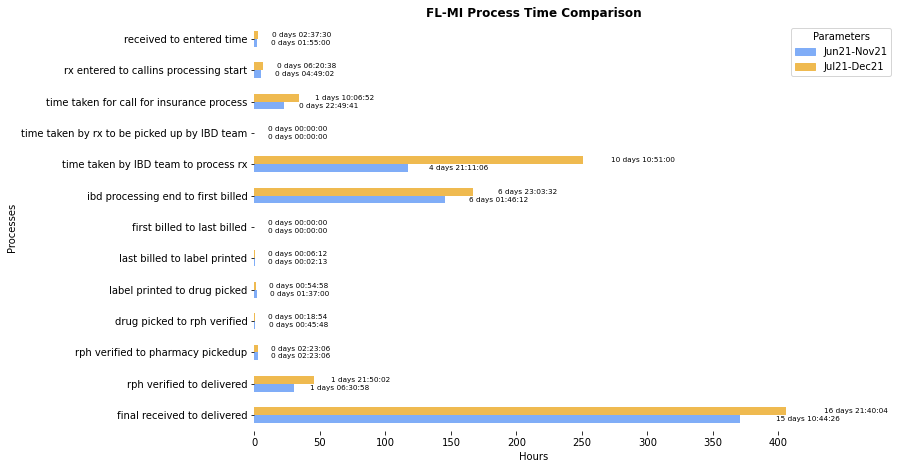

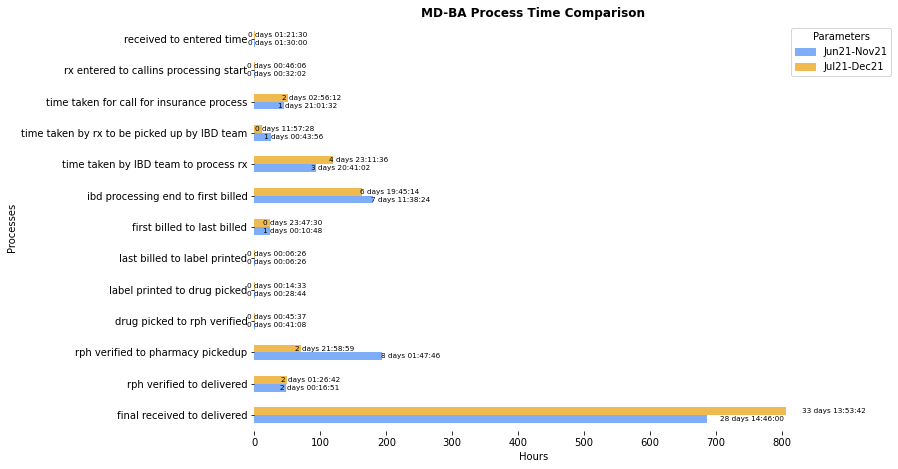

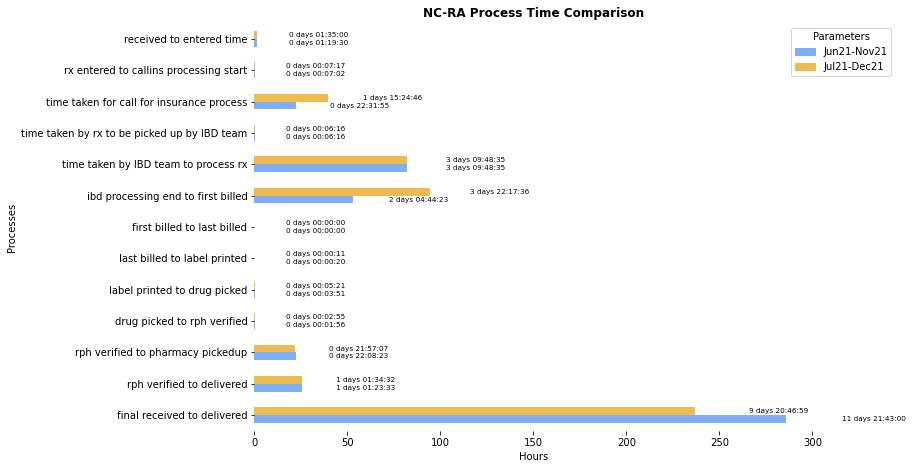

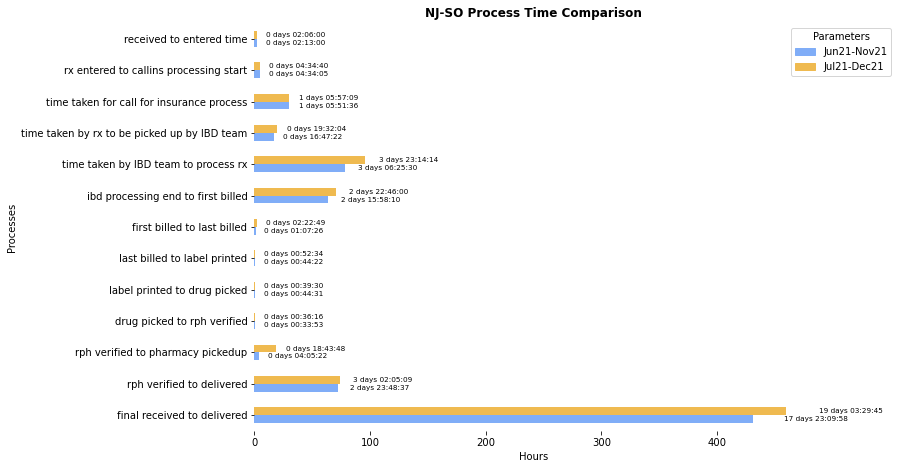

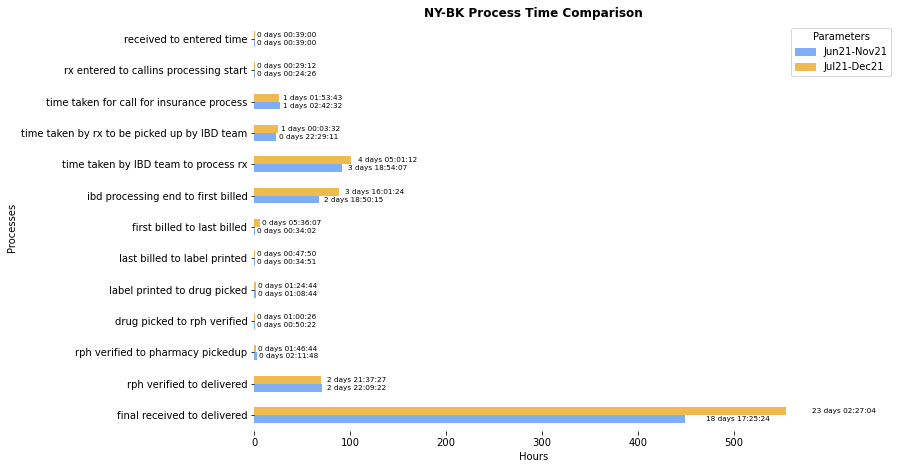

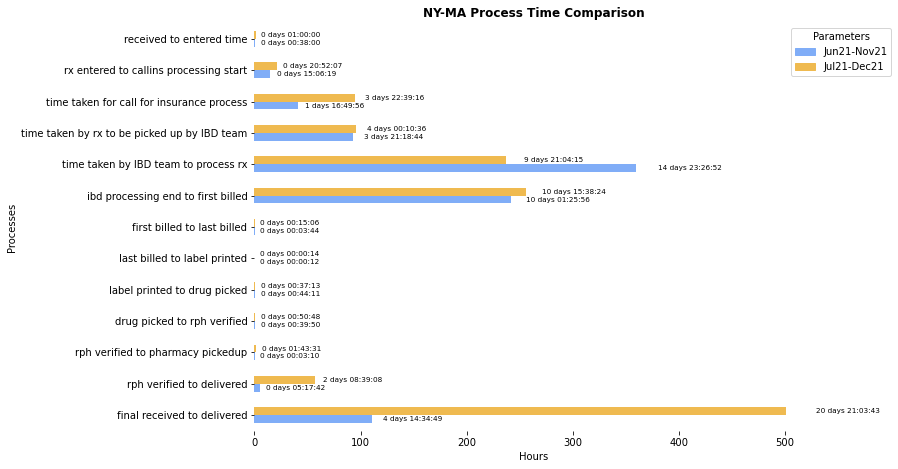

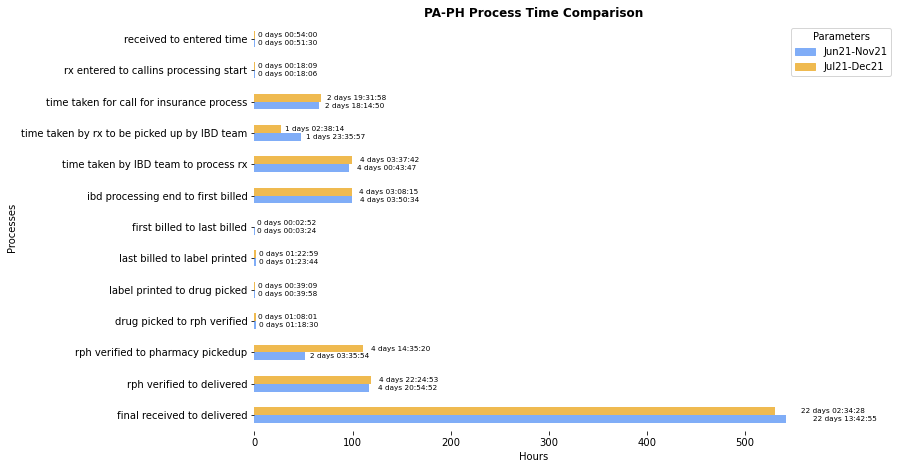

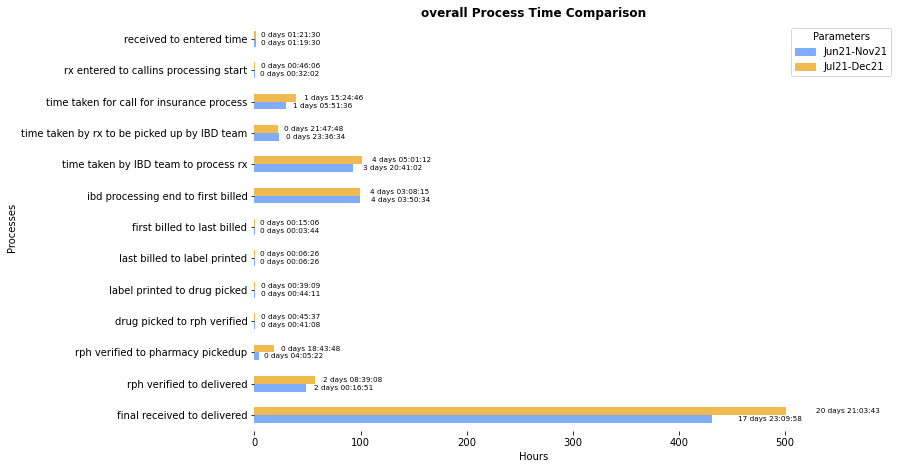

In [104]:
### Scenario - 3 Location wise bar plots comparison
for l in pharmacy_loc_list:
    try:
        s3_output_df_median_period_1_loc = s3_output_df_median_period_1[s3_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s3_output_df_median_period_1_loc['time_period'] = [period_1]

        ###
        s3_output_df_median_period_2_loc = s3_output_df_median_period_2[s3_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s3_output_df_median_period_2_loc['time_period'] = [period_2]

        ###

        ###
        scenario_3_loc = s3_output_df_median_period_1_loc.append([s3_output_df_median_period_2_loc], ignore_index = True)
        scenario_3_loc
        ###
        scenario_3_loc_final = scenario_3_loc.copy()

        ###
        # scenario_3_loc_final['time_period'] = ['Dec20_May21', 'Jan21_Jun21', 'Jun21']

        ###
        scenario_3_loc_final.columns.tolist()
        ###
        scenario_3_loc_final = scenario_3_loc_final[['time_period','pharmacy_loc',
        'median_time_received_to_entered_time_count','median_time_received_to_entered_time', 'median_time_received_to_entered_time_hr',
        'median_time_rx_entered_to_callins_processing_start_count','median_time_rx_entered_to_callins_processing_start', 'median_time_rx_entered_to_callins_processing_start_hr',
        'median_time_time_taken_for_call_for_insurance_process_count','median_time_time_taken_for_call_for_insurance_process', 'median_time_time_taken_for_call_for_insurance_process_hr',
        'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count','median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team', 'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr',
        'median_time_time_taken_by_IBD_team_to_process_rx_count','median_time_time_taken_by_IBD_team_to_process_rx', 'median_time_time_taken_by_IBD_team_to_process_rx_hr',
        'median_time_ibd_processing_end_to_first_billed_count','median_time_ibd_processing_end_to_first_billed', 'median_time_ibd_processing_end_to_first_billed_hr',
        'median_time_first_billed_to_last_billed_count','median_time_first_billed_to_last_billed', 'median_time_first_billed_to_last_billed_hr',
        'median_time_last_billed_to_label_printed_count','median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
        'median_time_label_printed_to_drug_picked_count','median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
        'median_time_drug_picked_to_rph_verified_count','median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
        'median_time_rph_verified_to_pharmacy_pickedup_count','median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
        'median_time_rph_verified_to_delivered_count','median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
        'median_time_final_received_to_delivered_count','median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
        scenario_3_loc_final
        ###
        scenario_3_loc_final_df = scenario_3_loc_final.copy()
        ###
        scenario_3_loc_final_df_plot = scenario_3_loc_final[['time_period',
        'median_time_final_received_to_delivered',
        'median_time_rph_verified_to_delivered',
        'median_time_rph_verified_to_pharmacy_pickedup',                                                          
        'median_time_drug_picked_to_rph_verified',                                                   
        'median_time_label_printed_to_drug_picked',
        'median_time_last_billed_to_label_printed',                                                        
        'median_time_first_billed_to_last_billed',                                                     
        'median_time_ibd_processing_end_to_first_billed',
        'median_time_time_taken_by_IBD_team_to_process_rx',                                                            
        'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',                                                           
        'median_time_time_taken_for_call_for_insurance_process',                                                          
        'median_time_rx_entered_to_callins_processing_start',                                                          
        'median_time_received_to_entered_time']]

        scenario_3_loc_final_df_plot.set_index('time_period', inplace = True)
        scenario_3_loc_final_df_plot

        ###
        my_string  = scenario_3_loc_final_df_plot[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_3_loc_final_df_plot.columns = new_column_names
        ###
        scenario_3_loc_final_df_plot = scenario_3_loc_final_df_plot.T
        scenario_3_loc_final_df_plot.replace(pd.NaT, pd.Timedelta(0), inplace = True)
        
        for i in scenario_3_loc_final_df_plot.columns:
            scenario_3_loc_final_df_plot[i] = scenario_3_loc_final_df_plot[i].dt.round('s')
        
        scenario_3_loc_final_df_plot
        ###
        data_hour = scenario_3_loc_final_df_plot.copy()
        ###
        for i in data_hour:
            data_hour[i] = round(data_hour[i].dt.total_seconds()/3600,2)

        data_hour = data_hour.fillna(0)
        data_hour
        ##

        list1 = scenario_3_loc_final_df_plot[period_2].tolist()
        list2 = scenario_3_loc_final_df_plot[period_1].tolist()
        list_final = list2 + list1
        list_final
        ##
        def autolabel3(rects):
            for rect,g in zip(rects,list_final):
                width = rect.get_width()
                plt.text(1.05*rect.get_width()+33, rect.get_y()+0.5*rect.get_height(),
                         f'{str(g)}',
                         ha='center', va='center',fontsize=7.3)
        ###
        ax = data_hour.plot(kind='barh',rot=360,figsize=(10,7.5),color=color_code,width=bar_width)

        rects = ax.patches

        autolabel3(rects)

        plt.title(str(l)+' Process Time Comparison',fontsize = font_size_title,fontweight=font_weight ,fontname = font_name)       
        plt.ylabel('Processes')
        plt.xlabel('Hours')

        orange_patch = mpatches.Patch(color = orange_color, label = period_2)
        blue_patch = mpatches.Patch(color = blue_color, label = period_1)
        # yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
        legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.savefig(output_distribution_sce_3+str(l)+' Scen_3_bar_overall.png', bbox_inches='tight', dpi=300,pad_inches = 0)
#         plt.show()
    except:
        pass



In [105]:
# heatmap
scenario_3_ny_bk_final_df_heatmap = scenario_3_ny_bk_final.copy()
scenario_3_ny_bk_final_df_heatmap.replace(pd.NaT, pd.Timedelta(0), inplace = True)
scenario_3_ny_bk_final_df_heatmap = scenario_3_ny_bk_final_df_heatmap[['time_period', 
'median_time_received_to_entered_time',
'median_time_rx_entered_to_callins_processing_start',
'median_time_time_taken_for_call_for_insurance_process',
'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',
'median_time_time_taken_by_IBD_team_to_process_rx',
'median_time_ibd_processing_end_to_first_billed',
'median_time_first_billed_to_last_billed',
'median_time_last_billed_to_label_printed',
'median_time_label_printed_to_drug_picked',
'median_time_drug_picked_to_rph_verified',
'median_time_rph_verified_to_pharmacy_pickedup',
'median_time_rph_verified_to_delivered',
'median_time_final_received_to_delivered']]
scenario_3_ny_bk_final_df_heatmap.set_index('time_period', inplace = True)

my_string  = scenario_3_ny_bk_final_df_heatmap[1:].columns.str[12:]
new_column_names = []
for i in my_string:
    nn = i.replace("_", " ")
    new_column_names.append(nn)

scenario_3_ny_bk_final_df_heatmap.columns = new_column_names

scenario_3_ny_bk_final_df_heatmap = scenario_3_ny_bk_final_df_heatmap.T

for i in scenario_3_ny_bk_final_df_heatmap.columns:
    scenario_3_ny_bk_final_df_heatmap[i] = scenario_3_ny_bk_final_df_heatmap[i].dt.round('s')

scenario_3_ny_bk_final_df_heatmap


time_period,Jun21-Nov21,Jul21-Dec21
received to entered time,0 days 00:39:00,0 days 00:39:00
rx entered to callins processing start,0 days 00:24:26,0 days 00:29:12
time taken for call for insurance process,1 days 02:42:32,1 days 01:53:43
time taken by rx to be picked up by IBD team,0 days 22:29:11,1 days 00:03:32
time taken by IBD team to process rx,3 days 18:54:07,4 days 05:01:12
ibd processing end to first billed,2 days 18:50:15,3 days 16:01:24
first billed to last billed,0 days 00:34:02,0 days 05:36:07
last billed to label printed,0 days 00:34:51,0 days 00:47:50
label printed to drug picked,0 days 01:08:44,0 days 01:24:44
drug picked to rph verified,0 days 00:50:22,0 days 01:00:26


In [106]:
scenario_3_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_3_ny_bk_final_df_heatmap[[period_1,period_2]].max(axis=1)
scenario_3_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_3_ny_bk_final_df_heatmap[[period_1, period_2]].min(axis=1)
scenario_3_ny_bk_final_df_heatmap['abs Change w.r.t last period'] = scenario_3_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_3_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2]
scenario_3_ny_bk_final_df_heatmap['% Change w.r.t last period'] = round((scenario_3_ny_bk_final_df_heatmap[period_2] - scenario_3_ny_bk_final_df_heatmap[period_1])/scenario_3_ny_bk_final_df_heatmap[period_1]*100,2)

scenario_3_ny_bk_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)
scenario_3_ny_bk_final_df_heatmap

time_period,Jun21-Nov21,Jul21-Dec21,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:39:00,0 days 00:39:00,0 days 00:00:00,0.00
rx entered to callins processing start,0 days 00:24:26,0 days 00:29:12,0 days 00:04:46,19.51
time taken for call for insurance process,1 days 02:42:32,1 days 01:53:43,0 days 00:48:49,-3.05
time taken by rx to be picked up by IBD team,0 days 22:29:11,1 days 00:03:32,0 days 01:34:21,6.99
time taken by IBD team to process rx,3 days 18:54:07,4 days 05:01:12,0 days 10:07:05,11.13
ibd processing end to first billed,2 days 18:50:15,3 days 16:01:24,0 days 21:11:09,31.70
first billed to last billed,0 days 00:34:02,0 days 05:36:07,0 days 05:02:05,887.61
last billed to label printed,0 days 00:34:51,0 days 00:47:50,0 days 00:12:59,37.25
label printed to drug picked,0 days 01:08:44,0 days 01:24:44,0 days 00:16:00,23.28
drug picked to rph verified,0 days 00:50:22,0 days 01:00:26,0 days 00:10:04,19.99


In [107]:
scenario_3_ny_bk_final_df_heatmap = scenario_3_ny_bk_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]

subset_value = (['% Change w.r.t last period'])
df_style3 = scenario_3_ny_bk_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
# format({'total_amt_usd_pct_diff': "{:.2%}"})
# dfi.export(df_style3, output_image_path+'scen_3_abs_per_change_comparison.png')
df_style3

time_period,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:00:00,0.00
rx entered to callins processing start,0 days 00:04:46,19.51
time taken for call for insurance process,0 days 00:48:49,-3.05
time taken by rx to be picked up by IBD team,0 days 01:34:21,6.99
time taken by IBD team to process rx,0 days 10:07:05,11.13
ibd processing end to first billed,0 days 21:11:09,31.70
first billed to last billed,0 days 05:02:05,887.61
last billed to label printed,0 days 00:12:59,37.25
label printed to drug picked,0 days 00:16:00,23.28
drug picked to rph verified,0 days 00:10:04,19.99


# Scenario - 3 Location wise heatmap

In [108]:
###  Scenario - 3 Location wise heatmap
for l in pharmacy_loc_list:
    try:
        s3_output_df_median_period_1_loc = s3_output_df_median_period_1[s3_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s3_output_df_median_period_1_loc['time_period'] = [period_1]

        ###
        s3_output_df_median_period_2_loc = s3_output_df_median_period_2[s3_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s3_output_df_median_period_2_loc['time_period'] = [period_2]

        ###

        ###
        scenario_3_loc = s3_output_df_median_period_1_loc.append([s3_output_df_median_period_2_loc], ignore_index = True)
        scenario_3_loc

        scenario_3_loc_final = scenario_3_loc.copy()

        ###
#         scenario_3_loc_final['time_period'] = ['Dec20_May21', 'Jan21_Jun21', 'Jun21']
#         scenario_3_loc_final

        # heatmap
        scenario_3_loc_final_df_heatmap = scenario_3_loc_final.copy()
        scenario_3_loc_final_df_heatmap.replace(pd.NaT, pd.Timedelta(0), inplace = True)
        scenario_3_loc_final_df_heatmap = scenario_3_loc_final_df_heatmap[['time_period', 
        'median_time_received_to_entered_time',
        'median_time_rx_entered_to_callins_processing_start',
        'median_time_time_taken_for_call_for_insurance_process',
        'median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team',
        'median_time_time_taken_by_IBD_team_to_process_rx',
        'median_time_ibd_processing_end_to_first_billed',
        'median_time_first_billed_to_last_billed',
        'median_time_last_billed_to_label_printed',
        'median_time_label_printed_to_drug_picked',
        'median_time_drug_picked_to_rph_verified',
        'median_time_rph_verified_to_pharmacy_pickedup',
        'median_time_rph_verified_to_delivered',
        'median_time_final_received_to_delivered']]
        scenario_3_loc_final_df_heatmap.set_index('time_period', inplace = True)

        my_string  = scenario_3_loc_final_df_heatmap[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_3_loc_final_df_heatmap.columns = new_column_names

        scenario_3_loc_final_df_heatmap = scenario_3_loc_final_df_heatmap.T
        
        for i in scenario_3_loc_final_df_heatmap.columns:
            scenario_3_loc_final_df_heatmap[i] = scenario_3_loc_final_df_heatmap[i].dt.round('s')

        ###
        scenario_3_loc_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_3_loc_final_df_heatmap[[period_1,period_2]].max(axis=1)
        scenario_3_loc_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_3_loc_final_df_heatmap[[period_1, period_2]].min(axis=1)
        scenario_3_loc_final_df_heatmap['abs Change w.r.t last period'] = scenario_3_loc_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_3_loc_final_df_heatmap['min_'+period_1+'_'+period_2]
        scenario_3_loc_final_df_heatmap['% Change w.r.t last period'] = round((scenario_3_loc_final_df_heatmap[period_2] - scenario_3_loc_final_df_heatmap[period_1])/scenario_3_loc_final_df_heatmap[period_1]*100,2)

#         scenario_3_loc_final_df_heatmap['max_Jan21_Jun21'] = scenario_3_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].max(axis=1)
#         scenario_3_loc_final_df_heatmap['min_Jan21_Jun21'] = scenario_3_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].min(axis=1)
#         scenario_3_loc_final_df_heatmap['abs Change w.r.t last months'] = scenario_3_loc_final_df_heatmap['max_Jan21_Jun21'] - scenario_3_loc_final_df_heatmap['min_Jan21_Jun21']
#         scenario_3_loc_final_df_heatmap['% Change w.r.t last month'] = round((scenario_3_loc_final_df_heatmap['Jun21'] - scenario_3_loc_final_df_heatmap['Jan21_Jun21'])/scenario_3_loc_final_df_heatmap['Jan21_Jun21']*100,2)
        scenario_3_loc_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)

        # ###
        scenario_3_loc_final_df_heatmap = scenario_3_loc_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]
        scenario_3_loc_final_df_heatmap
        ###
#         subset_value = (['% Change w.r.t last period'])
#         df_style = scenario_3_loc_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
        
        ###
#         dfi.export(df_style, output_distribution_sce_3+str(l)+' scen_3_abs_per_change_comparison.png')
#         df_style
        style_df = scenario_3_loc_final_df_heatmap.style.set_properties(**body_design).format(format_arrow_text, subset=['% Change w.r.t last period']).set_table_styles([{
        'selector': 'th', 'props': [('border', '1px black solid !important')]}]).set_caption('Processing Time Comparison for period' +period_1 +'to' + period_2 + '('+str(l) +')')
        style_df.set_table_styles([border_design])
        html_3= style_df.render()
        hti = Html2Image(output_path=output_distribution_sce_3)
        hti.screenshot(html_str=html_3, save_as=str(l)+' scen_3_abs_per_change_comparison_overall.png',size=(500, 500))
    except:
        pass

# --------------- Scenario-4 Analysis ---------------

# scenario-4 period_1

In [109]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count_4 = []
list_median_time_received_to_entered_time_4 = []

list_median_time_entered_to_first_billed_count_4 = []
list_median_time_entered_to_first_billed_4 = []

list_median_time_first_billed_to_last_billed_count_4 = []
list_median_time_first_billed_to_last_billed_4 = []

list_median_time_entered_to_last_billed_count_4 = []
list_median_time_entered_to_last_billed_4 = []

list_median_time_entered_to_label_printed_count_4 = []
list_median_time_entered_to_label_printed_4 = []

list_median_time_last_billed_to_label_printed_count_4 = []
list_median_time_last_billed_to_label_printed_4 = []

list_median_time_label_printed_to_drug_picked_count_4 = []
list_median_time_label_printed_to_drug_picked_4 = []

list_median_time_drug_picked_to_rph_verified_count_4 = []
list_median_time_drug_picked_to_rph_verified_4 = []

list_median_time_rph_verified_to_pharmacy_pickedup_count_4 = []
list_median_time_rph_verified_to_pharmacy_pickedup_4 = []

list_median_time_rph_verified_to_batch_creation_count_4 = []
list_median_time_rph_verified_to_batch_creation_4 = []

list_median_time_batch_creation_to_delivered_count_4 = []
list_median_time_batch_creation_to_delivered_4 = []

list_median_time_rph_verified_to_delivered_count_4 = []
list_median_time_rph_verified_to_delivered_4 = []

list_median_time_ibd_processing_start_to_end_count_4 = []
list_median_time_ibd_processing_start_to_end_4 = []

list_median_time_ibd_processing_end_to_first_billed_count_4 = []
list_median_time_ibd_processing_end_to_first_billed_4 = []

list_median_time_rph_verified_to_delivery_pickedup_count_4 = []
list_median_time_rph_verified_to_delivery_pickedup_4 = []

list_median_time_delivery_pickedup_to_delivered_count_4 = []
list_median_time_delivery_pickedup_to_delivered_4 = []

list_median_time_final_received_to_delivered_count_4 = []
list_median_time_final_received_to_delivered_4 = []

list_median_time_time_to_identify_pa_is_required_count_4 = []
list_median_time_time_to_identify_pa_is_required_4 = []

list_median_time_waiting_time_for_ibd_processing_count_4 = []
list_median_time_waiting_time_for_ibd_processing_4 = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_4 = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_4 = []

list_median_time_ibd_processing_end_to_label_printed_count_4 = []
list_median_time_ibd_processing_end_to_label_printed_4 = []

list_median_time_rx_entered_to_callins_processing_start_count_4 = []
list_median_time_rx_entered_to_callins_processing_start_4 = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count_4 = []
list_median_time_time_taken_by_IBD_team_to_process_rx_4 = []

list_median_time_time_taken_for_call_for_insurance_process_count_4 = []
list_median_time_time_taken_for_call_for_insurance_process_4 = []


pharmacy_loc_4 = []
month_key_4 = []

for i in np.unique(sce_4_df_period_1.pharmacy_loc):
    loc = i
    pharmacy_loc_4.append(i)
    xc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count_4.append(xc_4)
    x_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_4.append(x_4)
    
    yc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count_4.append(yc_4)
    y_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_4.append(y_4)
    
    zc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count_4.append(zc_4)
    z_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_4.append(z_4)
    
    ac_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count_4.append(ac_4)
    a_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_4.append(a_4)
    
    bc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count_4.append(bc_4)
    b_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_4.append(b_4)
    
    rc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count_4.append(rc_4)
    r_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_4.append(r_4)
    
    ec_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count_4.append(ec_4)
    e_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_4.append(e_4)
    
    fc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count_4.append(fc_4)
    f_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_4.append(f_4)
    
    gc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count_4.append(gc_4)
    g_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_4.append(g_4)
    
    hc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count_4.append(hc_4)
    h_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_4.append(h_4)
    
    jc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count_4.append(jc_4)
    j_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_4.append(j_4)
    
    lc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count_4.append(lc_4)
    l_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_4.append(l_4)
    
    mc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count_4.append(mc_4)
    m_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_4.append(m_4)
    
    nc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count_4.append(nc_4)
    n_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_4.append(n_4)
    
    oc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count_4.append(oc_4)
    o_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_4.append(o_4)
    
    pc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count_4.append(pc_4)
    p_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_4.append(p_4)
    
    qc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count_4.append(qc_4)
    q_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_4.append(q_4)
    
    tc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count_4.append(tc_4)
    t_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_4.append(t_4)
    
    uc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count_4.append(uc_4)
    u_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_4.append(u_4)
    
    vc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_4.append(vc_4)
    v_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_4.append(v_4)
    
    wc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count_4.append(wc_4)
    w_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_4.append(w_4)
    
    cc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count_4.append(cc_4)
    c_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_4.append(c_4)
    
    ffc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count_4.append(ffc_4)
    ff_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_4.append(ff_4)
    
    ccc_4 = get_count(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count_4.append(ccc_4)
    cc_4 = get_median_timedelta(sce_4_df_period_1[sce_4_df_period_1['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_4.append(cc_4)


    
    
s4_output_df_median_period_1 = pd.DataFrame()
s4_output_df_median_period_1['pharmacy_loc'] = pharmacy_loc_4
s4_output_df_median_period_1['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count_4
s4_output_df_median_period_1['median_time_received_to_entered_time_count'] = round(s4_output_df_median_period_1['median_time_received_to_entered_time_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time_4
s4_output_df_median_period_1['median_time_received_to_entered_time_hr'] = round(s4_output_df_median_period_1['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_1['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count_4
s4_output_df_median_period_1['median_time_entered_to_first_billed_count'] = round(s4_output_df_median_period_1['median_time_entered_to_first_billed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed_4
s4_output_df_median_period_1['median_time_entered_to_first_billed_hr'] = round(s4_output_df_median_period_1['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count_4
s4_output_df_median_period_1['median_time_first_billed_to_last_billed_count'] = round(s4_output_df_median_period_1['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed_4
s4_output_df_median_period_1['median_time_first_billed_to_last_billed_hr'] = round(s4_output_df_median_period_1['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_1['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count_4
s4_output_df_median_period_1['median_time_entered_to_last_billed_count'] = round(s4_output_df_median_period_1['median_time_entered_to_last_billed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed_4
s4_output_df_median_period_1['median_time_entered_to_last_billed_hr'] = round(s4_output_df_median_period_1['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_1['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count_4
s4_output_df_median_period_1['median_time_entered_to_label_printed_count'] = round(s4_output_df_median_period_1['median_time_entered_to_label_printed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed_4
s4_output_df_median_period_1['median_time_entered_to_label_printed_hr'] = round(s4_output_df_median_period_1['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s4_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count_4
s4_output_df_median_period_1['median_time_last_billed_to_label_printed_count'] = round(s4_output_df_median_period_1['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed_4
s4_output_df_median_period_1['median_time_last_billed_to_label_printed_hr'] = round(s4_output_df_median_period_1['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count_4
s4_output_df_median_period_1['median_time_label_printed_to_drug_picked_count'] = round(s4_output_df_median_period_1['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked_4
s4_output_df_median_period_1['median_time_label_printed_to_drug_picked_hr'] = round(s4_output_df_median_period_1['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count_4
s4_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count'] = round(s4_output_df_median_period_1['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified_4
s4_output_df_median_period_1['median_time_drug_picked_to_rph_verified_hr'] = round(s4_output_df_median_period_1['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count_4
s4_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup_4
s4_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count_4
s4_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation_4
s4_output_df_median_period_1['median_time_rph_verified_to_batch_creation_hr'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count_4
s4_output_df_median_period_1['median_time_batch_creation_to_delivered_count'] = round(s4_output_df_median_period_1['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered_4
s4_output_df_median_period_1['median_time_batch_creation_to_delivered_hr'] = round(s4_output_df_median_period_1['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count_4
s4_output_df_median_period_1['median_time_rph_verified_to_delivered_count'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered_4
s4_output_df_median_period_1['median_time_rph_verified_to_delivered_hr'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count_4
s4_output_df_median_period_1['median_time_ibd_processing_start_to_end_count'] = round(s4_output_df_median_period_1['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end_4
# s4_output_df_median_period_1['median_time_ibd_processing_start_to_end_hr'] = round(s4_output_df_median_period_1['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count_4
s4_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count'] = round(s4_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed_4
# s4_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed_hr'] = round(s4_output_df_median_period_1['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count_4
s4_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup_4
s4_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s4_output_df_median_period_1['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count_4
s4_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count'] = round(s4_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered_4
s4_output_df_median_period_1['median_time_delivery_pickedup_to_delivered_hr'] = round(s4_output_df_median_period_1['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count_4
s4_output_df_median_period_1['median_time_final_received_to_delivered_count'] = round(s4_output_df_median_period_1['median_time_final_received_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered_4
s4_output_df_median_period_1['median_time_final_received_to_delivered_hr'] = round(s4_output_df_median_period_1['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count_4
s4_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count'] = round(s4_output_df_median_period_1['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required_4
# s4_output_df_median_period_1['median_time_time_to_identify_pa_is_required_hr'] = round(s4_output_df_median_period_1['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count_4
s4_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count'] = round(s4_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing_4
# s4_output_df_median_period_1['median_time_waiting_time_for_ibd_processing_hr'] = round(s4_output_df_median_period_1['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_4
s4_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s4_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_4
# s4_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s4_output_df_median_period_1['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count_4
s4_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count'] = round(s4_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed_4
# s4_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed_hr'] = round(s4_output_df_median_period_1['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count_4
s4_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count'] = round(s4_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start_4
s4_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start_hr'] = round(s4_output_df_median_period_1['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count_4
s4_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s4_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s4_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx_4
# s4_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s4_output_df_median_period_1['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s4_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count_4
s4_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count'] = round(s4_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s4_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process_4
s4_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s4_output_df_median_period_1['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [110]:
s4_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,37,0 days 02:34:00,2.57,33,3 days 22:42:59,94.72,34,0 days 00:00:00,0.00,34,5 days 22:12:12.500000,142.20,30,7 days 20:56:20,188.94,26,0 days 00:10:49,0.18,22,0 days 02:32:54,2.55,26,0 days 01:19:43,1.33,3,0 days 00:37:38.500000,0.63,19,0 days 23:37:38,23.63,16,0 days 02:06:36,2.11,16,1 days 01:34:22,25.57,0,None,0,None,15,1 days 09:25:07,33.42,14,0 days 13:46:35,13.78,16,7 days 23:44:37,191.74,0,None,0,None,0,None,0,None,64,0 days 01:37:53,1.63,0,None,65,1 days 18:00:58,42.02
1,MD-BA,46,0 days 01:24:00,1.40,36,2 days 18:31:47,66.53,37,0 days 01:30:29,1.51,37,4 days 22:35:32.500000,118.59,30,3 days 23:07:37,95.13,23,0 days 00:14:34.500000,0.24,21,0 days 00:23:46.500000,0.40,23,0 days 00:57:21,0.96,2,0 days 01:43:45,1.73,19,2 days 22:16:23.500000,70.27,18,0 days 02:44:11,2.74,18,3 days 03:08:02,75.13,0,None,0,None,18,4 days 07:58:56,103.98,8,0 days 13:15:51,13.26,18,8 days 13:31:08.500000,205.52,0,None,0,None,0,None,0,None,78,0 days 00:04:15.500000,0.07,0,None,82,3 days 23:55:30,95.92
2,

In [111]:
s4_output_df_median_period_1 = s4_output_df_median_period_1.append(s4_output_df_median_period_1.median(axis=0), ignore_index = True)
s4_output_df_median_period_1['pharmacy_loc'] = s4_output_df_median_period_1['pharmacy_loc'].fillna('overall')
s4_output_df_median_period_1

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,37.0,0 days 02:34:00,2.57,33.0,3 days 22:42:59,94.72,34.0,0 days 00:00:00,0.00,34.0,5 days 22:12:12.500000,142.20,30.0,7 days 20:56:20,188.94,26.0,0 days 00:10:49,0.18,22.0,0 days 02:32:54,2.55,26.0,0 days 01:19:43,1.33,3.0,0 days 00:37:38.500000,0.63,19.0,0 days 23:37:38,23.63,16.0,0 days 02:06:36,2.11,16.0,1 days 01:34:22,25.57,0.0,None,0.0,None,15.0,1 days 09:25:07,33.42,14.0,0 days 13:46:35,13.78,16.0,7 days 23:44:37,191.74,0.0,None,0.0,None,0.0,None,0.0,None,64.0,0 days 01:37:53,1.63,0.0,None,65.0,1 days 18:00:58,42.02
1,MD-BA,46.0,0 days 01:24:00,1.40,36.0,2 days 18:31:47,66.53,37.0,0 days 01:30:29,1.51,37.0,4 days 22:35:32.500000,118.59,30.0,3 days 23:07:37,95.13,23.0,0 days 00:14:34.500000,0.24,21.0,0 days 00:23:46.500000,0.40,23.0,0 days 00:57:21,0.96,2.0,0 days 01:43:45,1.73,19.0,2 days 22:16:23.500000,70.27,18.0,0 days 02:44:11,2.74,18.0,3 days 03:08:02,75.13,0.0,None,0.0,None,18.0,4 days 07:58:56,103.98,8.0,0 days 13:15:51,13.26,18.0,8 days 13:31:08.500000,205.52,0.0,None,0.

In [112]:
s4_output_df_median_period_1_ny_bk = s4_output_df_median_period_1[s4_output_df_median_period_1['pharmacy_loc'] == 'NY-BK']#.reset_index()
s4_output_df_median_period_1_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
4,NY-BK,534.0,0 days 00:30:00,0.5,516.0,1 days 23:24:04,47.4,520.0,0 days 00:27:28,0.46,520.0,5 days 21:42:02,141.7,480.0,5 days 08:16:47,128.28,376.0,0 days 00:49:45,0.83,355.0,0 days 01:16:09,1.27,410.0,0 days 00:50:14.500000,0.84,35.0,0 days 00:22:34,0.38,307.0,1 days 19:06:12,43.1,244.0,0 days 03:05:02,3.08,272.0,1 days 23:12:08.500000,47.2,0.0,None,0.0,None,310.0,3 days 03:22:46,75.38,168.0,0 days 13:33:52,13.56,274.0,9 days 00:07:41.500000,216.13,0.0,None,0.0,None,0.0,None,0.0,None,734.0,0 days 00:21:10.500000,0.35,0.0,None,756.0,1 days 18:56:36,42.94


# scenario-4 period_2

In [113]:
median_columns_list = ['received_to_entered_time','entered_to_first_billed','first_billed_to_last_billed',
'entered_to_last_billed','entered_to_label_printed', 'last_billed_to_label_printed', 'label_printed_to_drug_picked',
'drug_picked_to_rph_verified', 'rph_verified_to_pharmacy_pickedup', 'rph_verified_to_batch_creation',
'batch_creation_to_delivered', 'rph_verified_to_delivered', 'ibd_processing_start_to_end', 'ibd_processing_end_to_first_billed',
'rph_verified_to_delivery_pickedup', 'delivery_pickedup_to_delivered', 'final_received_to_delivered', 
'time_to_identify_pa_is_required',
'waiting_time_for_ibd_processing',
'ibd_processing_end_to_label_printed',
'rx_entered_to_callins_processing_start',
'ibd_processing_end_to_first_billed',
'time_taken_by_rx_to_be_picked_up_by_IBD_team',
'time_taken_by_IBD_team_to_process_rx',
'time_taken_for_call_for_insurance_process']


list_median_time_received_to_entered_time_count_4 = []
list_median_time_received_to_entered_time_4 = []

list_median_time_entered_to_first_billed_count_4 = []
list_median_time_entered_to_first_billed_4 = []

list_median_time_first_billed_to_last_billed_count_4 = []
list_median_time_first_billed_to_last_billed_4 = []

list_median_time_entered_to_last_billed_count_4 = []
list_median_time_entered_to_last_billed_4 = []

list_median_time_entered_to_label_printed_count_4 = []
list_median_time_entered_to_label_printed_4 = []

list_median_time_last_billed_to_label_printed_count_4 = []
list_median_time_last_billed_to_label_printed_4 = []

list_median_time_label_printed_to_drug_picked_count_4 = []
list_median_time_label_printed_to_drug_picked_4 = []

list_median_time_drug_picked_to_rph_verified_count_4 = []
list_median_time_drug_picked_to_rph_verified_4 = []

list_median_time_rph_verified_to_pharmacy_pickedup_count_4 = []
list_median_time_rph_verified_to_pharmacy_pickedup_4 = []

list_median_time_rph_verified_to_batch_creation_count_4 = []
list_median_time_rph_verified_to_batch_creation_4 = []

list_median_time_batch_creation_to_delivered_count_4 = []
list_median_time_batch_creation_to_delivered_4 = []

list_median_time_rph_verified_to_delivered_count_4 = []
list_median_time_rph_verified_to_delivered_4 = []

list_median_time_ibd_processing_start_to_end_count_4 = []
list_median_time_ibd_processing_start_to_end_4 = []

list_median_time_ibd_processing_end_to_first_billed_count_4 = []
list_median_time_ibd_processing_end_to_first_billed_4 = []

list_median_time_rph_verified_to_delivery_pickedup_count_4 = []
list_median_time_rph_verified_to_delivery_pickedup_4 = []

list_median_time_delivery_pickedup_to_delivered_count_4 = []
list_median_time_delivery_pickedup_to_delivered_4 = []

list_median_time_final_received_to_delivered_count_4 = []
list_median_time_final_received_to_delivered_4 = []

list_median_time_time_to_identify_pa_is_required_count_4 = []
list_median_time_time_to_identify_pa_is_required_4 = []

list_median_time_waiting_time_for_ibd_processing_count_4 = []
list_median_time_waiting_time_for_ibd_processing_4 = []

list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_4 = []
list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_4 = []

list_median_time_ibd_processing_end_to_label_printed_count_4 = []
list_median_time_ibd_processing_end_to_label_printed_4 = []

list_median_time_rx_entered_to_callins_processing_start_count_4 = []
list_median_time_rx_entered_to_callins_processing_start_4 = []

list_median_time_time_taken_by_IBD_team_to_process_rx_count_4 = []
list_median_time_time_taken_by_IBD_team_to_process_rx_4 = []

list_median_time_time_taken_for_call_for_insurance_process_count_4 = []
list_median_time_time_taken_for_call_for_insurance_process_4 = []


pharmacy_loc_4 = []
month_key_4 = []

for i in np.unique(sce_4_df_period_2.pharmacy_loc):
    loc = i
    pharmacy_loc_4.append(i)
    xc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_count_4.append(xc_4)
    x_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'received_to_entered_time')
    list_median_time_received_to_entered_time_4.append(x_4)
    
    yc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_count_4.append(yc_4)
    y_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'entered_to_first_billed')
    list_median_time_entered_to_first_billed_4.append(y_4)
    
    zc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_count_4.append(zc_4)
    z_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'first_billed_to_last_billed')
    list_median_time_first_billed_to_last_billed_4.append(z_4)
    
    ac_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_count_4.append(ac_4)
    a_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'entered_to_last_billed')
    list_median_time_entered_to_last_billed_4.append(a_4)
    
    bc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_count_4.append(bc_4)
    b_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'entered_to_label_printed')
    list_median_time_entered_to_label_printed_4.append(b_4)
    
    rc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_count_4.append(rc_4)
    r_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'last_billed_to_label_printed')
    list_median_time_last_billed_to_label_printed_4.append(r_4)
    
    ec_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_count_4.append(ec_4)
    e_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'label_printed_to_drug_picked')
    list_median_time_label_printed_to_drug_picked_4.append(e_4)
    
    fc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_count_4.append(fc_4)
    f_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'drug_picked_to_rph_verified')
    list_median_time_drug_picked_to_rph_verified_4.append(f_4)
    
    gc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_count_4.append(gc_4)
    g_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_pharmacy_pickedup')
    list_median_time_rph_verified_to_pharmacy_pickedup_4.append(g_4)
    
    hc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_count_4.append(hc_4)
    h_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_batch_creation')
    list_median_time_rph_verified_to_batch_creation_4.append(h_4)
    
    jc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_count_4.append(jc_4)
    j_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'batch_creation_to_delivered')
    list_median_time_batch_creation_to_delivered_4.append(j_4)
    
    lc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_count_4.append(lc_4)
    l_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivered')
    list_median_time_rph_verified_to_delivered_4.append(l_4)
    
    mc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_count_4.append(mc_4)
    m_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_start_to_end')
    list_median_time_ibd_processing_start_to_end_4.append(m_4)
    
    nc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_count_4.append(nc_4)
    n_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_first_billed')
    list_median_time_ibd_processing_end_to_first_billed_4.append(n_4)
    
    oc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_count_4.append(oc_4)
    o_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rph_verified_to_delivery_pickedup')
    list_median_time_rph_verified_to_delivery_pickedup_4.append(o_4)
    
    pc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_count_4.append(pc_4)
    p_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'delivery_pickedup_to_delivered')
    list_median_time_delivery_pickedup_to_delivered_4.append(p_4)
    
    qc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_count_4.append(qc_4)
    q_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'final_received_to_delivered')
    list_median_time_final_received_to_delivered_4.append(q_4)
    
    tc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_count_4.append(tc_4)
    t_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_to_identify_pa_is_required')
    list_median_time_time_to_identify_pa_is_required_4.append(t_4)
    
    uc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_count_4.append(uc_4)
    u_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'waiting_time_for_ibd_processing')
    list_median_time_waiting_time_for_ibd_processing_4.append(u_4)
    
    vc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_4.append(vc_4)
    v_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_rx_to_be_picked_up_by_IBD_team')
    list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_4.append(v_4)
    
    wc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_count_4.append(wc_4)
    w_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'ibd_processing_end_to_label_printed')
    list_median_time_ibd_processing_end_to_label_printed_4.append(w_4)
    
    cc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_count_4.append(cc_4)
    c_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'rx_entered_to_callins_processing_start')
    list_median_time_rx_entered_to_callins_processing_start_4.append(c_4)
    
    ffc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_count_4.append(ffc_4)
    ff_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_taken_by_IBD_team_to_process_rx')
    list_median_time_time_taken_by_IBD_team_to_process_rx_4.append(ff_4)
    
    ccc_4 = get_count(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_count_4.append(ccc_4)
    cc_4 = get_median_timedelta(sce_4_df_period_2[sce_4_df_period_2['pharmacy_loc']==str(i)],'time_taken_for_call_for_insurance_process')
    list_median_time_time_taken_for_call_for_insurance_process_4.append(cc_4)


    
    
s4_output_df_median_period_2 = pd.DataFrame()
s4_output_df_median_period_2['pharmacy_loc'] = pharmacy_loc_4
s4_output_df_median_period_2['median_time_received_to_entered_time_count'] = list_median_time_received_to_entered_time_count_4
s4_output_df_median_period_2['median_time_received_to_entered_time_count'] = round(s4_output_df_median_period_2['median_time_received_to_entered_time_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_received_to_entered_time'] = list_median_time_received_to_entered_time_4
s4_output_df_median_period_2['median_time_received_to_entered_time_hr'] = round(s4_output_df_median_period_2['median_time_received_to_entered_time'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_2['median_time_entered_to_first_billed_count'] = list_median_time_entered_to_first_billed_count_4
s4_output_df_median_period_2['median_time_entered_to_first_billed_count'] = round(s4_output_df_median_period_2['median_time_entered_to_first_billed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_entered_to_first_billed'] = list_median_time_entered_to_first_billed_4
s4_output_df_median_period_2['median_time_entered_to_first_billed_hr'] = round(s4_output_df_median_period_2['median_time_entered_to_first_billed'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = list_median_time_first_billed_to_last_billed_count_4
s4_output_df_median_period_2['median_time_first_billed_to_last_billed_count'] = round(s4_output_df_median_period_2['median_time_first_billed_to_last_billed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_first_billed_to_last_billed'] = list_median_time_first_billed_to_last_billed_4
s4_output_df_median_period_2['median_time_first_billed_to_last_billed_hr'] = round(s4_output_df_median_period_2['median_time_first_billed_to_last_billed'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_2['median_time_entered_to_last_billed_count'] = list_median_time_entered_to_last_billed_count_4
s4_output_df_median_period_2['median_time_entered_to_last_billed_count'] = round(s4_output_df_median_period_2['median_time_entered_to_last_billed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_entered_to_last_billed'] = list_median_time_entered_to_last_billed_4
s4_output_df_median_period_2['median_time_entered_to_last_billed_hr'] = round(s4_output_df_median_period_2['median_time_entered_to_last_billed'].dt.total_seconds()/3600,2) 

s4_output_df_median_period_2['median_time_entered_to_label_printed_count'] = list_median_time_entered_to_label_printed_count_4
s4_output_df_median_period_2['median_time_entered_to_label_printed_count'] = round(s4_output_df_median_period_2['median_time_entered_to_label_printed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_entered_to_label_printed'] = list_median_time_entered_to_label_printed_4
s4_output_df_median_period_2['median_time_entered_to_label_printed_hr'] = round(s4_output_df_median_period_2['median_time_entered_to_label_printed'].dt.total_seconds()/3600,2)


s4_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = list_median_time_last_billed_to_label_printed_count_4
s4_output_df_median_period_2['median_time_last_billed_to_label_printed_count'] = round(s4_output_df_median_period_2['median_time_last_billed_to_label_printed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_last_billed_to_label_printed'] = list_median_time_last_billed_to_label_printed_4
s4_output_df_median_period_2['median_time_last_billed_to_label_printed_hr'] = round(s4_output_df_median_period_2['median_time_last_billed_to_label_printed'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = list_median_time_label_printed_to_drug_picked_count_4
s4_output_df_median_period_2['median_time_label_printed_to_drug_picked_count'] = round(s4_output_df_median_period_2['median_time_label_printed_to_drug_picked_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_label_printed_to_drug_picked'] = list_median_time_label_printed_to_drug_picked_4
s4_output_df_median_period_2['median_time_label_printed_to_drug_picked_hr'] = round(s4_output_df_median_period_2['median_time_label_printed_to_drug_picked'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = list_median_time_drug_picked_to_rph_verified_count_4
s4_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count'] = round(s4_output_df_median_period_2['median_time_drug_picked_to_rph_verified_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_drug_picked_to_rph_verified'] = list_median_time_drug_picked_to_rph_verified_4
s4_output_df_median_period_2['median_time_drug_picked_to_rph_verified_hr'] = round(s4_output_df_median_period_2['median_time_drug_picked_to_rph_verified'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = list_median_time_rph_verified_to_pharmacy_pickedup_count_4
s4_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'] = list_median_time_rph_verified_to_pharmacy_pickedup_4
s4_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup_hr'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_pharmacy_pickedup'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = list_median_time_rph_verified_to_batch_creation_count_4
s4_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_batch_creation_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_rph_verified_to_batch_creation'] = list_median_time_rph_verified_to_batch_creation_4
s4_output_df_median_period_2['median_time_rph_verified_to_batch_creation_hr'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_batch_creation'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = list_median_time_batch_creation_to_delivered_count_4
s4_output_df_median_period_2['median_time_batch_creation_to_delivered_count'] = round(s4_output_df_median_period_2['median_time_batch_creation_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_batch_creation_to_delivered'] = list_median_time_batch_creation_to_delivered_4
s4_output_df_median_period_2['median_time_batch_creation_to_delivered_hr'] = round(s4_output_df_median_period_2['median_time_batch_creation_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = list_median_time_rph_verified_to_delivered_count_4
s4_output_df_median_period_2['median_time_rph_verified_to_delivered_count'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_rph_verified_to_delivered'] = list_median_time_rph_verified_to_delivered_4
s4_output_df_median_period_2['median_time_rph_verified_to_delivered_hr'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = list_median_time_ibd_processing_start_to_end_count_4
s4_output_df_median_period_2['median_time_ibd_processing_start_to_end_count'] = round(s4_output_df_median_period_2['median_time_ibd_processing_start_to_end_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_ibd_processing_start_to_end'] = list_median_time_ibd_processing_start_to_end_4
# s4_output_df_median_period_2['median_time_ibd_processing_start_to_end_hr'] = round(s4_output_df_median_period_2['median_time_ibd_processing_start_to_end'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = list_median_time_ibd_processing_end_to_first_billed_count_4
s4_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count'] = round(s4_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'] = list_median_time_ibd_processing_end_to_first_billed_4
# s4_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed_hr'] = round(s4_output_df_median_period_2['median_time_ibd_processing_end_to_first_billed'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = list_median_time_rph_verified_to_delivery_pickedup_count_4
s4_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'] = list_median_time_rph_verified_to_delivery_pickedup_4
s4_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup_hr'] = round(s4_output_df_median_period_2['median_time_rph_verified_to_delivery_pickedup'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = list_median_time_delivery_pickedup_to_delivered_count_4
s4_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count'] = round(s4_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'] = list_median_time_delivery_pickedup_to_delivered_4
s4_output_df_median_period_2['median_time_delivery_pickedup_to_delivered_hr'] = round(s4_output_df_median_period_2['median_time_delivery_pickedup_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_final_received_to_delivered_count'] = list_median_time_final_received_to_delivered_count_4
s4_output_df_median_period_2['median_time_final_received_to_delivered_count'] = round(s4_output_df_median_period_2['median_time_final_received_to_delivered_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_final_received_to_delivered'] = list_median_time_final_received_to_delivered_4
s4_output_df_median_period_2['median_time_final_received_to_delivered_hr'] = round(s4_output_df_median_period_2['median_time_final_received_to_delivered'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = list_median_time_time_to_identify_pa_is_required_count_4
s4_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count'] = round(s4_output_df_median_period_2['median_time_time_to_identify_pa_is_required_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_time_to_identify_pa_is_required'] = list_median_time_time_to_identify_pa_is_required_4
# s4_output_df_median_period_2['median_time_time_to_identify_pa_is_required_hr'] = round(s4_output_df_median_period_2['median_time_time_to_identify_pa_is_required'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = list_median_time_waiting_time_for_ibd_processing_count_4
s4_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count'] = round(s4_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'] = list_median_time_waiting_time_for_ibd_processing_4
# s4_output_df_median_period_2['median_time_waiting_time_for_ibd_processing_hr'] = round(s4_output_df_median_period_2['median_time_waiting_time_for_ibd_processing'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count_4
s4_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count'] = round(s4_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'] = list_median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_4
# s4_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_hr'] = round(s4_output_df_median_period_2['median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = list_median_time_ibd_processing_end_to_label_printed_count_4
s4_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count'] = round(s4_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'] = list_median_time_ibd_processing_end_to_label_printed_4
# s4_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed_hr'] = round(s4_output_df_median_period_2['median_time_ibd_processing_end_to_label_printed'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = list_median_time_rx_entered_to_callins_processing_start_count_4
s4_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count'] = round(s4_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'] = list_median_time_rx_entered_to_callins_processing_start_4
s4_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start_hr'] = round(s4_output_df_median_period_2['median_time_rx_entered_to_callins_processing_start'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = list_median_time_time_taken_by_IBD_team_to_process_rx_count_4
s4_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count'] = round(s4_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_count']/6,2).astype(int)
s4_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'] = list_median_time_time_taken_by_IBD_team_to_process_rx_4
# s4_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx_hr'] = round(s4_output_df_median_period_2['median_time_time_taken_by_IBD_team_to_process_rx'].dt.total_seconds()/3600,2)

s4_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = list_median_time_time_taken_for_call_for_insurance_process_count_4
s4_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count'] = round(s4_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_count']/6,0).astype(int)
s4_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'] = list_median_time_time_taken_for_call_for_insurance_process_4
s4_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process_hr'] = round(s4_output_df_median_period_2['median_time_time_taken_for_call_for_insurance_process'].dt.total_seconds()/3600,2)


In [114]:
s4_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,40,0 days 03:01:30,3.02,31,3 days 21:32:56,93.55,33,0 days 00:00:09.500000,0.00,32,6 days 22:56:30,166.94,29,9 days 11:38:32.500000,227.64,26,0 days 00:14:26,0.24,23,0 days 00:34:06,0.57,26,0 days 00:52:08,0.87,2,0 days 00:36:57,0.62,20,0 days 23:35:27.500000,23.59,19,0 days 02:26:29.500000,2.44,20,1 days 02:24:54,26.42,0,None,0,None,16,1 days 09:13:52,33.23,19,0 days 14:17:41,14.29,20,9 days 00:27:33.500000,216.46,0,None,0,None,0,None,0,None,61,0 days 02:36:30.500000,2.61,0,None,62,1 days 04:20:18,28.34
1,MD-BA,48,0 days 01:10:30,1.18,36,2 days 00:06:23.500000,48.11,36,0 days 03:01:36,3.03,36,4 days 22:35:32.500000,118.59,29,3 days 22:10:05,94.17,22,0 days 00:14:34.500000,0.24,20,0 days 00:19:25.500000,0.32,22,0 days 01:00:10,1.00,2,0 days 02:48:01,2.80,18,2 days 21:31:46,69.53,18,0 days 03:00:23,3.01,18,2 days 22:56:16,70.94,0,None,0,None,16,3 days 22:35:26,94.59,8,0 days 14:00:49,14.01,18,7 days 21:48:10,189.80,0,None,0,None,0,None,0,None,79,0 days 00:04:55,0.08,0,None,83,3 days 23:5

In [115]:
s4_output_df_median_period_2 = s4_output_df_median_period_2.append(s4_output_df_median_period_2.median(axis=0), ignore_index = True)
s4_output_df_median_period_2['pharmacy_loc'] = s4_output_df_median_period_2['pharmacy_loc'].fillna('overall')
s4_output_df_median_period_2

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,FL-MI,40.0,0 days 03:01:30,3.02,31.0,3 days 21:32:56,93.55,33.0,0 days 00:00:09.500000,0.00,32.0,6 days 22:56:30,166.94,29.0,9 days 11:38:32.500000,227.64,26.0,0 days 00:14:26,0.24,23.0,0 days 00:34:06,0.57,26.0,0 days 00:52:08,0.87,2.0,0 days 00:36:57,0.62,20.0,0 days 23:35:27.500000,23.59,19.0,0 days 02:26:29.500000,2.44,20.0,1 days 02:24:54,26.42,0.0,None,0.0,None,16.0,1 days 09:13:52,33.23,19.0,0 days 14:17:41,14.29,20.0,9 days 00:27:33.500000,216.46,0.0,None,0.0,None,0.0,None,0.0,None,61.0,0 days 02:36:30.500000,2.61,0.0,None,62.0,1 days 04:20:18,28.34
1,MD-BA,48.0,0 days 01:10:30,1.18,36.0,2 days 00:06:23.500000,48.11,36.0,0 days 03:01:36,3.03,36.0,4 days 22:35:32.500000,118.59,29.0,3 days 22:10:05,94.17,22.0,0 days 00:14:34.500000,0.24,20.0,0 days 00:19:25.500000,0.32,22.0,0 days 01:00:10,1.00,2.0,0 days 02:48:01,2.80,18.0,2 days 21:31:46,69.53,18.0,0 days 03:00:23,3.01,18.0,2 days 22:56:16,70.94,0.0,None,0.0,None,16.0,3 days 22:35:26,94.59,8.0,0 days 14:00:49,14.01,18.0,7 days 21:48:1

In [116]:
s4_output_df_median_period_2_ny_bk = s4_output_df_median_period_2[s4_output_df_median_period_2['pharmacy_loc'] == 'NY-BK']#.reset_index()
s4_output_df_median_period_2_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
4,NY-BK,517.0,0 days 00:28:00,0.47,515.0,1 days 22:33:42,46.56,521.0,0 days 00:37:27.500000,0.62,520.0,6 days 01:46:47,145.78,477.0,5 days 22:52:35,142.88,373.0,0 days 01:02:35.500000,1.04,356.0,0 days 01:23:56.500000,1.4,412.0,0 days 00:53:45,0.9,34.0,0 days 00:26:06.500000,0.44,294.0,1 days 19:06:42,43.11,293.0,0 days 03:26:37,3.44,336.0,1 days 22:21:10.500000,46.35,0.0,None,0.0,None,297.0,2 days 19:53:37.500000,67.89,199.0,0 days 14:04:25.500000,14.07,346.0,9 days 04:39:58,220.67,0.0,None,0.0,None,0.0,None,0.0,None,712.0,0 days 00:17:25,0.29,0.0,None,737.0,1 days 06:49:34,30.83


# scenario-4 Previous monthonly

In [117]:
scenario_4_ny_bk = s4_output_df_median_period_1_ny_bk.append([s4_output_df_median_period_2_ny_bk], ignore_index = True)
scenario_4_ny_bk

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr
0,NY-BK,534.0,0 days 00:30:00,0.50,516.0,1 days 23:24:04,47.40,520.0,0 days 00:27:28,0.46,520.0,5 days 21:42:02,141.70,480.0,5 days 08:16:47,128.28,376.0,0 days 00:49:45,0.83,355.0,0 days 01:16:09,1.27,410.0,0 days 00:50:14.500000,0.84,35.0,0 days 00:22:34,0.38,307.0,1 days 19:06:12,43.10,244.0,0 days 03:05:02,3.08,272.0,1 days 23:12:08.500000,47.20,0.0,None,0.0,None,310.0,3 days 03:22:46,75.38,168.0,0 days 13:33:52,13.56,274.0,9 days 00:07:41.500000,216.13,0.0,None,0.0,None,0.0,None,0.0,None,734.0,0 days 00:21:10.500000,0.35,0.0,None,756.0,1 days 18:56:36,42.94
1,NY-BK,517.0,0 days 00:28:00,0.47,515.0,1 days 22:33:42,46.56,521.0,0 days 00:37:27.500000,0.62,520.0,6 days 01:46:47,145.78,477.0,5 days 22:52:35,142.88,373.0,0 days 01:02:35.500000,1.04,356.0,0 days 01:23:56.500000,1.40,412.0,0 days 00:53:45,0.90,34.0,0 days 00:26:06.500000,0.44,294.0,1 days 19:06:42,43.11,293.0,0 days 03:26:37,3.44,336.0,1 days 22:21:10.500000,46.35,0.0,None,0.0,None,297.0,2 days 19:53:37.500000,67.89,199.0,0 days 1

In [118]:
# for i in scenario_4_ny_bk.columns[1:]:
#     scenario_4_ny_bk[i] = pd.to_timedelta(scenario_4_ny_bk[i]).dt.round('s')

In [119]:
scenario_4_ny_bk_final = scenario_4_ny_bk.copy()

In [120]:
scenario_4_ny_bk_final['time_period'] = [period_1, period_2]
scenario_4_ny_bk_final

,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_entered_to_first_billed_count,median_time_entered_to_first_billed,median_time_entered_to_first_billed_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_entered_to_last_billed_count,median_time_entered_to_last_billed,median_time_entered_to_last_billed_hr,median_time_entered_to_label_printed_count,median_time_entered_to_label_printed,median_time_entered_to_label_printed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_batch_creation_count,median_time_rph_verified_to_batch_creation,median_time_rph_verified_to_batch_creation_hr,median_time_batch_creation_to_delivered_count,median_time_batch_creation_to_delivered,median_time_batch_creation_to_delivered_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_ibd_processing_start_to_end_count,median_time_ibd_processing_start_to_end,median_time_ibd_processing_end_to_first_billed_count,median_time_ibd_processing_end_to_first_billed,median_time_rph_verified_to_delivery_pickedup_count,median_time_rph_verified_to_delivery_pickedup,median_time_rph_verified_to_delivery_pickedup_hr,median_time_delivery_pickedup_to_delivered_count,median_time_delivery_pickedup_to_delivered,median_time_delivery_pickedup_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr,median_time_time_to_identify_pa_is_required_count,median_time_time_to_identify_pa_is_required,median_time_waiting_time_for_ibd_processing_count,median_time_waiting_time_for_ibd_processing,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team_count,median_time_time_taken_by_rx_to_be_picked_up_by_IBD_team,median_time_ibd_processing_end_to_label_printed_count,median_time_ibd_processing_end_to_label_printed,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_by_IBD_team_to_process_rx_count,median_time_time_taken_by_IBD_team_to_process_rx,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr,time_period
0,NY-BK,534.0,0 days 00:30:00,0.50,516.0,1 days 23:24:04,47.40,520.0,0 days 00:27:28,0.46,520.0,5 days 21:42:02,141.70,480.0,5 days 08:16:47,128.28,376.0,0 days 00:49:45,0.83,355.0,0 days 01:16:09,1.27,410.0,0 days 00:50:14.500000,0.84,35.0,0 days 00:22:34,0.38,307.0,1 days 19:06:12,43.10,244.0,0 days 03:05:02,3.08,272.0,1 days 23:12:08.500000,47.20,0.0,None,0.0,None,310.0,3 days 03:22:46,75.38,168.0,0 days 13:33:52,13.56,274.0,9 days 00:07:41.500000,216.13,0.0,None,0.0,None,0.0,None,0.0,None,734.0,0 days 00:21:10.500000,0.35,0.0,None,756.0,1 days 18:56:36,42.94,Jun21-Nov21
1,NY-BK,517.0,0 days 00:28:00,0.47,515.0,1 days 22:33:42,46.56,521.0,0 days 00:37:27.500000,0.62,520.0,6 days 01:46:47,145.78,477.0,5 days 22:52:35,142.88,373.0,0 days 01:02:35.500000,1.04,356.0,0 days 01:23:56.500000,1.40,412.0,0 days 00:53:45,0.90,34.0,0 days 00:26:06.500000,0.44,294.0,1 days 19:06:42,43.11,293.0,0 days 03:26:37,3.44,336.0,1 days 22:21:10.500000,46.35,0.0,None,0.0,None,297.0,2 days 19:53:37.500

In [121]:
scenario_4_ny_bk_final = scenario_4_ny_bk_final[['time_period','pharmacy_loc',
'median_time_received_to_entered_time_count','median_time_received_to_entered_time','median_time_received_to_entered_time_hr',
'median_time_rx_entered_to_callins_processing_start_count','median_time_rx_entered_to_callins_processing_start', 'median_time_rx_entered_to_callins_processing_start_hr',
'median_time_time_taken_for_call_for_insurance_process_count','median_time_time_taken_for_call_for_insurance_process', 'median_time_time_taken_for_call_for_insurance_process_hr',
'median_time_first_billed_to_last_billed_count','median_time_first_billed_to_last_billed', 'median_time_first_billed_to_last_billed_hr',
'median_time_last_billed_to_label_printed_count','median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
'median_time_label_printed_to_drug_picked_count','median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
'median_time_drug_picked_to_rph_verified_count','median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
'median_time_rph_verified_to_pharmacy_pickedup_count','median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
'median_time_rph_verified_to_delivered_count','median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
'median_time_final_received_to_delivered_count','median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
scenario_4_ny_bk_final


,time_period,pharmacy_loc,median_time_received_to_entered_time_count,median_time_received_to_entered_time,median_time_received_to_entered_time_hr,median_time_rx_entered_to_callins_processing_start_count,median_time_rx_entered_to_callins_processing_start,median_time_rx_entered_to_callins_processing_start_hr,median_time_time_taken_for_call_for_insurance_process_count,median_time_time_taken_for_call_for_insurance_process,median_time_time_taken_for_call_for_insurance_process_hr,median_time_first_billed_to_last_billed_count,median_time_first_billed_to_last_billed,median_time_first_billed_to_last_billed_hr,median_time_last_billed_to_label_printed_count,median_time_last_billed_to_label_printed,median_time_last_billed_to_label_printed_hr,median_time_label_printed_to_drug_picked_count,median_time_label_printed_to_drug_picked,median_time_label_printed_to_drug_picked_hr,median_time_drug_picked_to_rph_verified_count,median_time_drug_picked_to_rph_verified,median_time_drug_picked_to_rph_verified_hr,median_time_rph_verified_to_pharmacy_pickedup_count,median_time_rph_verified_to_pharmacy_pickedup,median_time_rph_verified_to_pharmacy_pickedup_hr,median_time_rph_verified_to_delivered_count,median_time_rph_verified_to_delivered,median_time_rph_verified_to_delivered_hr,median_time_final_received_to_delivered_count,median_time_final_received_to_delivered,median_time_final_received_to_delivered_hr
0,Jun21-Nov21,NY-BK,534.0,0 days 00:30:00,0.50,734.0,0 days 00:21:10.500000,0.35,756.0,1 days 18:56:36,42.94,520.0,0 days 00:27:28,0.46,376.0,0 days 00:49:45,0.83,355.0,0 days 01:16:09,1.27,410.0,0 days 00:50:14.500000,0.84,35.0,0 days 00:22:34,0.38,272.0,1 days 23:12:08.500000,47.20,274.0,9 days 00:07:41.500000,216.13
1,Jul21-Dec21,NY-BK,517.0,0 days 00:28:00,0.47,712.0,0 days 00:17:25,0.29,737.0,1 days 06:49:34,30.83,521.0,0 days 00:37:27.500000,0.62,373.0,0 days 01:02:35.500000,1.04,356.0,0 days 01:23:56.500000,1.40,412.0,0 days 00:53:45,0.90,34.0,0 days 00:26:06.500000,0.44,336.0,1 days 22:21:10.500000,46.35,346.0,9 days 04:39:58,220.67


In [122]:
scenario_4_ny_bk_final_df = scenario_4_ny_bk_final.copy()

In [123]:
scenario_4_ny_bk_final_df_plot = scenario_4_ny_bk_final_df[['time_period',
'median_time_final_received_to_delivered',
'median_time_rph_verified_to_delivered',
'median_time_rph_verified_to_pharmacy_pickedup',                                                            
'median_time_drug_picked_to_rph_verified',                                                            
'median_time_label_printed_to_drug_picked',
'median_time_last_billed_to_label_printed',                                                            
'median_time_first_billed_to_last_billed',
'median_time_time_taken_for_call_for_insurance_process',                                                            
'median_time_rx_entered_to_callins_processing_start',                                                            
'median_time_received_to_entered_time']]

scenario_4_ny_bk_final_df_plot.set_index('time_period', inplace = True)
scenario_4_ny_bk_final_df_plot


,median_time_final_received_to_delivered,median_time_rph_verified_to_delivered,median_time_rph_verified_to_pharmacy_pickedup,median_time_drug_picked_to_rph_verified,median_time_label_printed_to_drug_picked,median_time_last_billed_to_label_printed,median_time_first_billed_to_last_billed,median_time_time_taken_for_call_for_insurance_process,median_time_rx_entered_to_callins_processing_start,median_time_received_to_entered_time
time_period,,,,,,,,,,
Jun21-Nov21,9 days 00:07:41.500000,1 days 23:12:08.500000,0 days 00:22:34,0 days 00:50:14.500000,0 days 01:16:09,0 days 00:49:45,0 days 00:27:28,1 days 18:56:36,0 days 00:21:10.500000,0 days 00:30:00
Jul21-Dec21,9 days 04:39:58,1 days 22:21:10.500000,0 days 00:26:06.500000,0 days 00:53:45,0 days 01:23:56.500000,0 days 01:02:35.500000,0 days 00:37:27.500000,1 days 06:49:34,0 days 00:17:25,0 days 00:28:00


In [124]:
my_string = scenario_4_ny_bk_final_df_plot.columns.str[12:]

new_column_names = []

for i in my_string:
    nn = i.replace('_', ' ')
    new_column_names.append(nn)
    
scenario_4_ny_bk_final_df_plot.columns = new_column_names


In [125]:
scenario_4_ny_bk_final_df_plot = scenario_4_ny_bk_final_df_plot.T
scenario_4_ny_bk_final_df_plot.replace(pd.NaT, pd.Timedelta(0), inplace = True)
for i in scenario_4_ny_bk_final_df_plot.columns:
    scenario_4_ny_bk_final_df_plot[i] = scenario_4_ny_bk_final_df_plot[i].dt.round('s')
scenario_4_ny_bk_final_df_plot

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,9 days 00:07:42,9 days 04:39:58
rph verified to delivered,1 days 23:12:08,1 days 22:21:10
rph verified to pharmacy pickedup,0 days 00:22:34,0 days 00:26:06
drug picked to rph verified,0 days 00:50:14,0 days 00:53:45
label printed to drug picked,0 days 01:16:09,0 days 01:23:56
last billed to label printed,0 days 00:49:45,0 days 01:02:36
first billed to last billed,0 days 00:27:28,0 days 00:37:28
time taken for call for insurance process,1 days 18:56:36,1 days 06:49:34
rx entered to callins processing start,0 days 00:21:10,0 days 00:17:25
received to entered time,0 days 00:30:00,0 days 00:28:00


In [126]:
scen_4_data_hour = scenario_4_ny_bk_final_df_plot.copy()

for i in scen_4_data_hour:
    scen_4_data_hour[i] = round(scen_4_data_hour[i].dt.total_seconds()/3600,2)
    
scen_4_data_hour = scen_4_data_hour.fillna(0)
scen_4_data_hour

time_period,Jun21-Nov21,Jul21-Dec21
final received to delivered,216.13,220.67
rph verified to delivered,47.20,46.35
rph verified to pharmacy pickedup,0.38,0.44
drug picked to rph verified,0.84,0.90
label printed to drug picked,1.27,1.40
last billed to label printed,0.83,1.04
first billed to last billed,0.46,0.62
time taken for call for insurance process,42.94,30.83
rx entered to callins processing start,0.35,0.29
received to entered time,0.50,0.47


In [127]:
list1 = scenario_4_ny_bk_final_df_plot[period_2].tolist()
list2 = scenario_4_ny_bk_final_df_plot[period_1].tolist()
scen_4_list_final = list2 + list1
scen_4_list_final

[Timedelta('9 days 00:07:42'),
 Timedelta('1 days 23:12:08'),
 Timedelta('0 days 00:22:34'),
 Timedelta('0 days 00:50:14'),
 Timedelta('0 days 01:16:09'),
 Timedelta('0 days 00:49:45'),
 Timedelta('0 days 00:27:28'),
 Timedelta('1 days 18:56:36'),
 Timedelta('0 days 00:21:10'),
 Timedelta('0 days 00:30:00'),
 Timedelta('9 days 04:39:58'),
 Timedelta('1 days 22:21:10'),
 Timedelta('0 days 00:26:06'),
 Timedelta('0 days 00:53:45'),
 Timedelta('0 days 01:23:56'),
 Timedelta('0 days 01:02:36'),
 Timedelta('0 days 00:37:28'),
 Timedelta('1 days 06:49:34'),
 Timedelta('0 days 00:17:25'),
 Timedelta('0 days 00:28:00')]

In [128]:
def autolabel3(rects):
    for rect,g in zip(rects,scen_4_list_final):
        width = rect.get_width()
        plt.text(1.05*rect.get_width()+12, rect.get_y()+0.5*rect.get_height(),
                 f'{str(g)}',
                 ha='center', va='center',fontsize=7.5)

In [129]:
# ax = scen_4_data_hour.plot(kind='barh',rot=360,figsize=(10,7.9),color=['orange','dodgerblue'])

# rects = ax.patches

# autolabel3(rects)

# plt.title('Process Time Comparison', fontsize = 16,fontname = 'Arial')          
# plt.ylabel('Processes')
# plt.xlabel('Hours')

# orange_patch = mpatches.Patch(color = 'orange', label = period_1)
# blue_patch = mpatches.Patch(color = 'dodgerblue', label = period_2)
# # yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
# legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
# # plt.savefig(output_image_path+'Scen_4_ny_bk.png', bbox_inches='tight', dpi=300,pad_inches = 0)
# plt.show()

# Scenario - 4 Location wise bar plots comparison

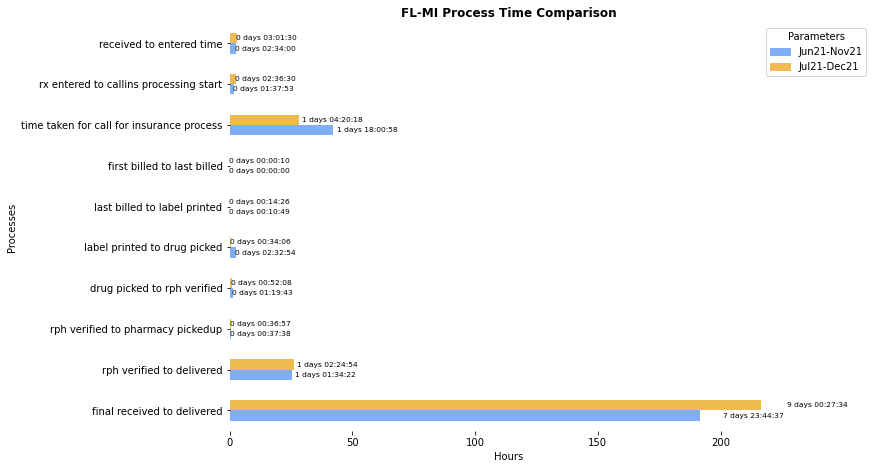

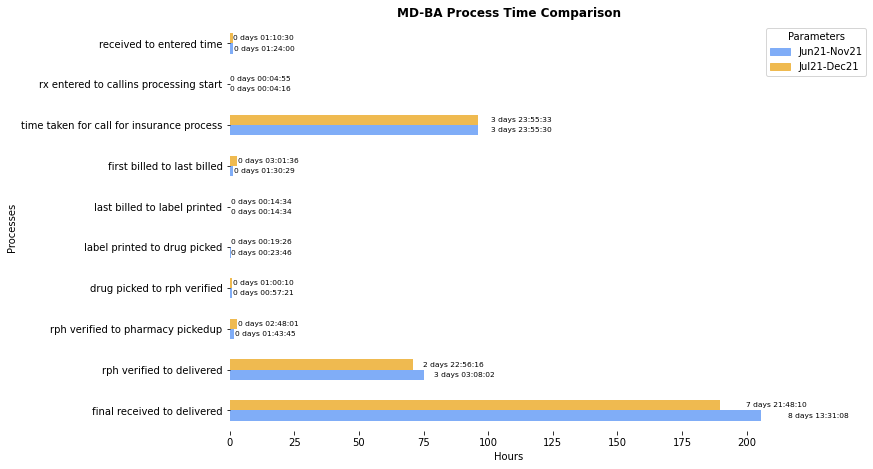

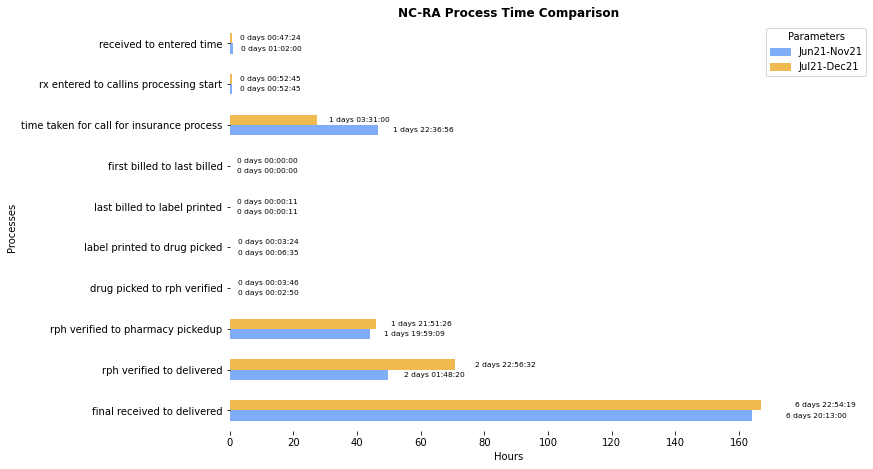

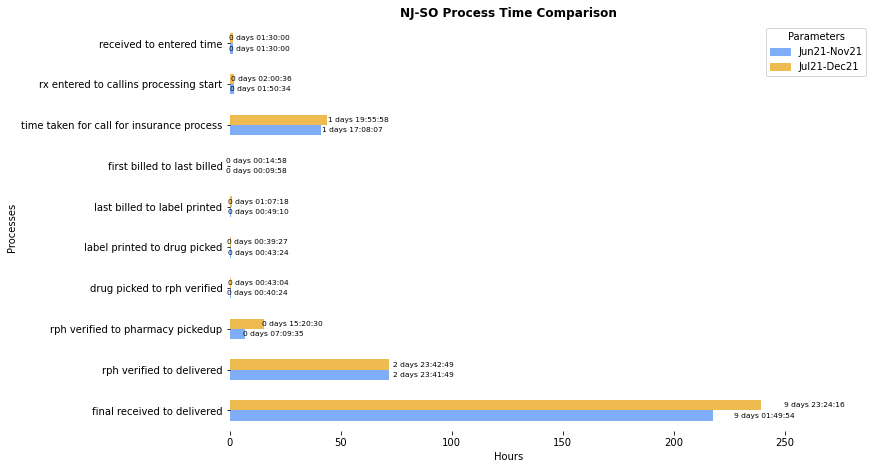

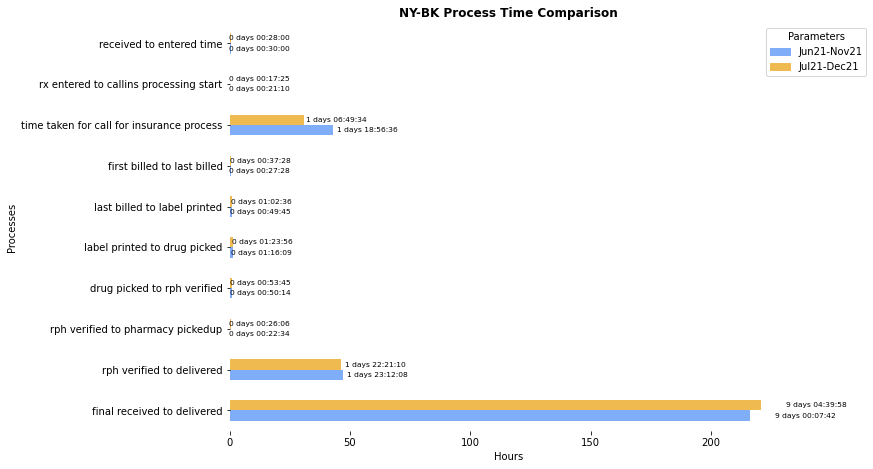

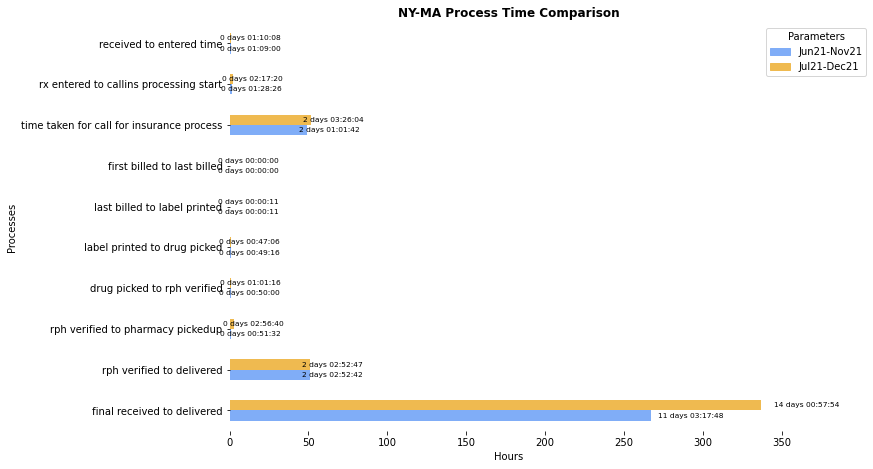

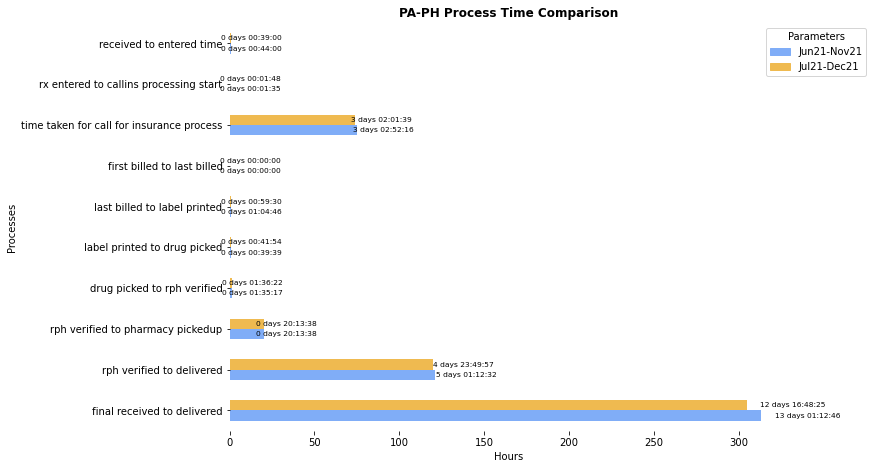

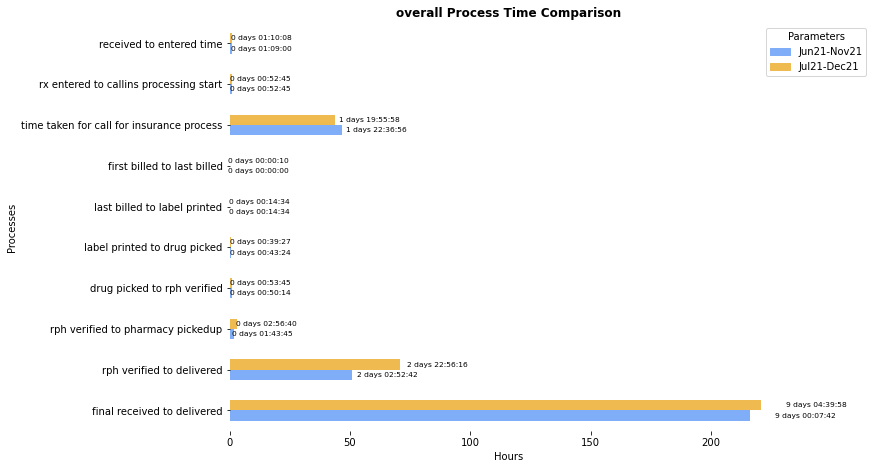

In [130]:
### Scenario - 4 Location wise bar plots comparison
for l in pharmacy_loc_list:
    try:
        s4_output_df_median_period_1_loc = s4_output_df_median_period_1[s4_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s4_output_df_median_period_1_loc['time_period'] = [period_1]

        ###
        s4_output_df_median_period_2_loc = s4_output_df_median_period_2[s4_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s4_output_df_median_period_2_loc['time_period'] = [period_2]

        ###
        
        ###
        scenario_4_loc = s4_output_df_median_period_1_loc.append([s4_output_df_median_period_2_loc], ignore_index = True)
        scenario_4_loc
        ###
        scenario_4_loc_final = scenario_4_loc.copy()

        ###
        # scenario_4_loc_final['time_period'] = ['Dec20_May21', 'Jan21_Jun21', 'Jun21']

        ###
        scenario_4_loc_final.columns.tolist()
        ###
        scenario_4_loc_final = scenario_4_loc_final[['time_period','pharmacy_loc',
        'median_time_received_to_entered_time_count','median_time_received_to_entered_time','median_time_received_to_entered_time_hr',
        'median_time_rx_entered_to_callins_processing_start_count','median_time_rx_entered_to_callins_processing_start', 'median_time_rx_entered_to_callins_processing_start_hr',
        'median_time_time_taken_for_call_for_insurance_process_count','median_time_time_taken_for_call_for_insurance_process', 'median_time_time_taken_for_call_for_insurance_process_hr',
        'median_time_first_billed_to_last_billed_count','median_time_first_billed_to_last_billed', 'median_time_first_billed_to_last_billed_hr',
        'median_time_last_billed_to_label_printed_count','median_time_last_billed_to_label_printed', 'median_time_last_billed_to_label_printed_hr',
        'median_time_label_printed_to_drug_picked_count','median_time_label_printed_to_drug_picked', 'median_time_label_printed_to_drug_picked_hr',
        'median_time_drug_picked_to_rph_verified_count','median_time_drug_picked_to_rph_verified', 'median_time_drug_picked_to_rph_verified_hr',
        'median_time_rph_verified_to_pharmacy_pickedup_count','median_time_rph_verified_to_pharmacy_pickedup', 'median_time_rph_verified_to_pharmacy_pickedup_hr',
        'median_time_rph_verified_to_delivered_count','median_time_rph_verified_to_delivered', 'median_time_rph_verified_to_delivered_hr',
        'median_time_final_received_to_delivered_count','median_time_final_received_to_delivered', 'median_time_final_received_to_delivered_hr']]
        scenario_4_loc_final
        ###
        scenario_4_loc_final_df = scenario_4_loc_final.copy()
        ###
        scenario_4_loc_final_df_plot = scenario_4_loc_final[['time_period',
        'median_time_final_received_to_delivered',
        'median_time_rph_verified_to_delivered',
        'median_time_rph_verified_to_pharmacy_pickedup',                                                            
        'median_time_drug_picked_to_rph_verified',                                                            
        'median_time_label_printed_to_drug_picked',
        'median_time_last_billed_to_label_printed',                                                            
        'median_time_first_billed_to_last_billed',
        'median_time_time_taken_for_call_for_insurance_process',                                                            
        'median_time_rx_entered_to_callins_processing_start',                                                            
        'median_time_received_to_entered_time']]

        scenario_4_loc_final_df_plot.set_index('time_period', inplace = True)
        scenario_4_loc_final_df_plot

        ###
        my_string  = scenario_4_loc_final_df_plot[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_4_loc_final_df_plot.columns = new_column_names
        ###
        scenario_4_loc_final_df_plot = scenario_4_loc_final_df_plot.T
        scenario_4_loc_final_df_plot.replace(pd.NaT, pd.Timedelta(0), inplace = True)
        
        for i in scenario_4_loc_final_df_plot.columns:
            scenario_4_loc_final_df_plot[i] = scenario_4_loc_final_df_plot[i].dt.round('s')
        
        scenario_4_loc_final_df_plot
        ###
        data_hour = scenario_4_loc_final_df_plot.copy()
        ###
        for i in data_hour:
            data_hour[i] = round(data_hour[i].dt.total_seconds()/3600,2)

        data_hour = data_hour.fillna(0)
        data_hour
        ##
        list1 = scenario_4_loc_final_df_plot[period_2].tolist()
        list2 = scenario_4_loc_final_df_plot[period_1].tolist()
        list_final = list2 + list1
        list_final
        ##
        def autolabel3(rects):
            for rect,g in zip(rects,list_final):
                width = rect.get_width()
                plt.text(1.05*rect.get_width()+12, rect.get_y()+0.5*rect.get_height(),
                         f'{str(g)}',
                         ha='center', va='center',fontsize=7.5)
        ###
        ax = data_hour.plot(kind='barh',rot=360,figsize=(10,7.5),color=color_code,width=bar_width)

        rects = ax.patches

        autolabel3(rects)

        plt.title(str(l)+' Process Time Comparison',fontsize = font_size_title,fontweight=font_weight ,fontname = font_name)      
        plt.ylabel('Processes')
        plt.xlabel('Hours')

        orange_patch = mpatches.Patch(color = orange_color, label = period_2)
        blue_patch = mpatches.Patch(color = blue_color, label = period_1)
        #yellow_patch = mpatches.Patch(color = 'yellow', label = 'June21')
        legend1 = plt.legend(handles = [blue_patch, orange_patch],title='Parameters',loc = 'upper right',bbox_to_anchor=(1.15, 1))      

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.savefig(output_distribution_sce_4+str(l)+' Scen_4_bar_overall.png', bbox_inches='tight', dpi=300,pad_inches = 0)
#         plt.show()
    except:
        pass

In [131]:
# heatmap
scenario_4_ny_bk_final_df_heatmap = scenario_4_ny_bk_final.copy()
scenario_4_ny_bk_final_df_heatmap.replace(pd.NaT, pd.Timedelta(0), inplace = True)
scenario_4_ny_bk_final_df_heatmap = scenario_4_ny_bk_final_df_heatmap[['time_period', 
'median_time_received_to_entered_time',
'median_time_rx_entered_to_callins_processing_start',
'median_time_time_taken_for_call_for_insurance_process',
'median_time_first_billed_to_last_billed',
'median_time_last_billed_to_label_printed',
'median_time_label_printed_to_drug_picked',
'median_time_drug_picked_to_rph_verified',
'median_time_rph_verified_to_pharmacy_pickedup',
'median_time_rph_verified_to_delivered',
'median_time_final_received_to_delivered']]
scenario_4_ny_bk_final_df_heatmap.set_index('time_period', inplace = True)

my_string  = scenario_4_ny_bk_final_df_heatmap[1:].columns.str[12:]
new_column_names = []
for i in my_string:
    nn = i.replace("_", " ")
    new_column_names.append(nn)

scenario_4_ny_bk_final_df_heatmap.columns = new_column_names

scenario_4_ny_bk_final_df_heatmap = scenario_4_ny_bk_final_df_heatmap.T

for i in scenario_4_ny_bk_final_df_heatmap.columns:
    scenario_4_ny_bk_final_df_heatmap[i] = scenario_4_ny_bk_final_df_heatmap[i].dt.round('s')


scenario_4_ny_bk_final_df_heatmap


time_period,Jun21-Nov21,Jul21-Dec21
received to entered time,0 days 00:30:00,0 days 00:28:00
rx entered to callins processing start,0 days 00:21:10,0 days 00:17:25
time taken for call for insurance process,1 days 18:56:36,1 days 06:49:34
first billed to last billed,0 days 00:27:28,0 days 00:37:28
last billed to label printed,0 days 00:49:45,0 days 01:02:36
label printed to drug picked,0 days 01:16:09,0 days 01:23:56
drug picked to rph verified,0 days 00:50:14,0 days 00:53:45
rph verified to pharmacy pickedup,0 days 00:22:34,0 days 00:26:06
rph verified to delivered,1 days 23:12:08,1 days 22:21:10
final received to delivered,9 days 00:07:42,9 days 04:39:58


In [132]:
scenario_4_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_4_ny_bk_final_df_heatmap[[period_1,period_2]].max(axis=1)
scenario_4_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_4_ny_bk_final_df_heatmap[[period_1, period_2]].min(axis=1)
scenario_4_ny_bk_final_df_heatmap['abs Change w.r.t last period'] = scenario_4_ny_bk_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_4_ny_bk_final_df_heatmap['min_'+period_1+'_'+period_2]

scenario_4_ny_bk_final_df_heatmap['% Change w.r.t last period'] = round((scenario_4_ny_bk_final_df_heatmap[period_2] - scenario_4_ny_bk_final_df_heatmap[period_1])/scenario_4_ny_bk_final_df_heatmap[period_1]*100,2)


scenario_4_ny_bk_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)
scenario_4_ny_bk_final_df_heatmap


time_period,Jun21-Nov21,Jul21-Dec21,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:30:00,0 days 00:28:00,0 days 00:02:00,-6.67
rx entered to callins processing start,0 days 00:21:10,0 days 00:17:25,0 days 00:03:45,-17.72
time taken for call for insurance process,1 days 18:56:36,1 days 06:49:34,0 days 12:07:02,-28.22
first billed to last billed,0 days 00:27:28,0 days 00:37:28,0 days 00:10:00,36.41
last billed to label printed,0 days 00:49:45,0 days 01:02:36,0 days 00:12:51,25.83
label printed to drug picked,0 days 01:16:09,0 days 01:23:56,0 days 00:07:47,10.22
drug picked to rph verified,0 days 00:50:14,0 days 00:53:45,0 days 00:03:31,7.00
rph verified to pharmacy pickedup,0 days 00:22:34,0 days 00:26:06,0 days 00:03:32,15.66
rph verified to delivered,1 days 23:12:08,1 days 22:21:10,0 days 00:50:58,-1.80
final received to delivered,9 days 00:07:42,9 days 04:39:58,0 days 04:32:16,2.10


In [133]:
scenario_4_ny_bk_final_df_heatmap = scenario_4_ny_bk_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]

subset_value = (['% Change w.r.t last period'])
df_style4 = scenario_4_ny_bk_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
# format({'total_amt_usd_pct_diff': "{:.2%}"})
# dfi.export(df_style4, output_image_path+'scen_4_abs_per_change_comparison.png')
df_style4

time_period,abs Change w.r.t last period,% Change w.r.t last period
received to entered time,0 days 00:02:00,-6.67
rx entered to callins processing start,0 days 00:03:45,-17.72
time taken for call for insurance process,0 days 12:07:02,-28.22
first billed to last billed,0 days 00:10:00,36.41
last billed to label printed,0 days 00:12:51,25.83
label printed to drug picked,0 days 00:07:47,10.22
drug picked to rph verified,0 days 00:03:31,7.00
rph verified to pharmacy pickedup,0 days 00:03:32,15.66
rph verified to delivered,0 days 00:50:58,-1.80
final received to delivered,0 days 04:32:16,2.10


# Scenario - 4 Location wise heatmap

In [134]:

###  Scenario - 4 Location wise heatmap
for l in pharmacy_loc_list:
    try:
        s4_output_df_median_period_1_loc = s4_output_df_median_period_1[s4_output_df_median_period_1['pharmacy_loc'] == l]#.reset_index()
        s4_output_df_median_period_1_loc['time_period'] = [period_1]

        ###
        s4_output_df_median_period_2_loc = s4_output_df_median_period_2[s4_output_df_median_period_2['pharmacy_loc'] == l]#.reset_index()
        s4_output_df_median_period_2_loc['time_period'] = [period_2]

        ###
        
        ###
        scenario_4_loc = s4_output_df_median_period_1_loc.append([s4_output_df_median_period_2_loc], ignore_index = True)
        scenario_4_loc

        scenario_4_loc_final = scenario_4_loc.copy()

        ###
#         scenario_4_loc_final['time_period'] = ['Dec20_May21', 'Jan21_Jun21', 'Jun21']
#         scenario_4_loc_final

        # heatmap
        scenario_4_loc_final_df_heatmap = scenario_4_loc_final.copy()
        scenario_4_loc_final_df_heatmap.replace(pd.NaT, pd.Timedelta(0), inplace = True)
        scenario_4_loc_final_df_heatmap = scenario_4_loc_final_df_heatmap[['time_period', 
        'median_time_received_to_entered_time',
        'median_time_rx_entered_to_callins_processing_start',
        'median_time_time_taken_for_call_for_insurance_process',
        'median_time_first_billed_to_last_billed',
        'median_time_last_billed_to_label_printed',
        'median_time_label_printed_to_drug_picked',
        'median_time_drug_picked_to_rph_verified',
        'median_time_rph_verified_to_pharmacy_pickedup',
        'median_time_rph_verified_to_delivered',
        'median_time_final_received_to_delivered']]
        scenario_4_loc_final_df_heatmap.set_index('time_period', inplace = True)

        my_string  = scenario_4_loc_final_df_heatmap[1:].columns.str[12:]
        new_column_names = []
        for i in my_string:
            nn = i.replace("_", " ")
            new_column_names.append(nn)

        scenario_4_loc_final_df_heatmap.columns = new_column_names

        scenario_4_loc_final_df_heatmap = scenario_4_loc_final_df_heatmap.T
        
        for i in scenario_4_loc_final_df_heatmap.columns:
            scenario_4_loc_final_df_heatmap[i] = scenario_4_loc_final_df_heatmap[i].dt.round('s')

        ###
        scenario_4_loc_final_df_heatmap['max_'+period_1+'_'+period_2] = scenario_4_loc_final_df_heatmap[[period_1,period_2]].max(axis=1)
        scenario_4_loc_final_df_heatmap['min_'+period_1+'_'+period_2] = scenario_4_loc_final_df_heatmap[[period_1, period_2]].min(axis=1)
        scenario_4_loc_final_df_heatmap['abs Change w.r.t last period'] = scenario_4_loc_final_df_heatmap['max_'+period_1+'_'+period_2] - scenario_4_loc_final_df_heatmap['min_'+period_1+'_'+period_2]
        scenario_4_loc_final_df_heatmap['% Change w.r.t last period'] = round((scenario_4_loc_final_df_heatmap[period_2] - scenario_4_loc_final_df_heatmap[period_1])/scenario_4_loc_final_df_heatmap[period_1]*100,2)

#         scenario_4_loc_final_df_heatmap['max_Jan21_Jun21'] = scenario_4_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].max(axis=1)
#         scenario_4_loc_final_df_heatmap['min_Jan21_Jun21'] = scenario_4_loc_final_df_heatmap[['Jan21_Jun21', 'Jun21']].min(axis=1)
#         scenario_4_loc_final_df_heatmap['abs Change w.r.t last months'] = scenario_4_loc_final_df_heatmap['max_Jan21_Jun21'] - scenario_4_loc_final_df_heatmap['min_Jan21_Jun21']
#         scenario_4_loc_final_df_heatmap['% Change w.r.t last month'] = round((scenario_4_loc_final_df_heatmap['Jun21'] - scenario_4_loc_final_df_heatmap['Jan21_Jun21'])/scenario_4_loc_final_df_heatmap['Jan21_Jun21']*100,2)
        scenario_4_loc_final_df_heatmap.drop(columns = ['max_'+period_1+'_'+period_2, 'min_'+period_1+'_'+period_2], inplace = True)

        # ###
        scenario_4_loc_final_df_heatmap = scenario_4_loc_final_df_heatmap[['abs Change w.r.t last period', '% Change w.r.t last period']]
        scenario_4_loc_final_df_heatmap
        ###
#         subset_value = (['% Change w.r.t last period'])
#         df_style = scenario_4_loc_final_df_heatmap.style.set_properties(**{'text-align': 'center','border-color':'white','border-width':'thin','border-style':'solid'}).background_gradient(cmap='RdYlGn_r',axis=0, subset = subset_value).format('{:.2f}', subset=subset_value)
        
        ###
#         dfi.export(df_style, output_distribution_sce_4+str(l)+' scen_4_abs_per_change_comparison.png')
#         df_style

        style_df = scenario_4_loc_final_df_heatmap.style.set_properties(**body_design).format(format_arrow_text, subset=['% Change w.r.t last period']).set_table_styles([{
        'selector': 'th', 'props': [('border', '1px black solid !important')]}]).set_caption('Processing Time Comparison for period' +period_1 +'to' + period_2 + '('+str(l) +')')
        style_df.set_table_styles([border_design])
        html_4= style_df.render()
        hti = Html2Image(output_path=output_distribution_sce_4)
        hti.screenshot(html_str=html_4, save_as=str(l)+' scen_4_abs_per_change_comparison_overall.png',size=(500, 500))
    except:
        pass